"""
Author: Priyanshi Sharma
Date: September 20, 2021
Description: This script uses machine learning algorithms to predict the occurrence of polycystic ovary syndrome (PCOS) using electronic health records.
"""

# Problem Statement

Polycystic ovary syndrome (PCOS) is a common hormonal disorder that affects women of reproductive age. PCOS can lead to a range of health issues, including infertility, diabetes, and cardiovascular problems. Early detection and management of PCOS are crucial for improving the overall health and quality of life of affected individuals.

The problem this project aims to address is the accurate and efficient identification of PCOS in patients using their electronic health records. Manually reviewing and analyzing large datasets of patient information can be a time-consuming and error-prone process. Therefore, there is a need for a reliable and automated system that can accurately predict the presence of PCOS based on the available medical data.

## Objective

The primary objective of this project is to develop a machine learning-based system that can accurately predict the occurrence of PCOS in patients using their electronic health records. The system should be able to:

1. Preprocess and clean the input data, handling missing values, removing duplicates, and preparing the data for analysis.

2. Explore and analyze the dataset to identify relevant features and patterns that are predictive of PCOS.

3. Train and evaluate various machine learning models, such as "Random Forest" "SVC" "KNN""Logistic Regression"Naive Bayes"Decision Tree "AdaBoost" "Gradient Boosting""SVM (Linear)""SVM (RBF)" "SVM (Polynomial)""Neural Network "Gaussian Process" "QDA""Extra Trees" "Bagging" to determine the most accurate and robust model for PCOS prediction.


# Data Dictionary

1. **Patient Information:**
   - Patient ID: Unique identifier for the patient
   - Name: Full name of the patient
   - Age: Age of the patient in years
   - Gender: Gender of the patient (Male/Female)
   - Height: Height of the patient in cm
   - Weight: Weight of the patient in kg

2. **Medical History:**
   - Diabetes (Yes/No): Indicates if the patient has diabetes (1 for Yes, 0 for No)
   - Hypertension (Yes/No): Indicates if the patient has hypertension (1 for Yes, 0 for No)
   - Heart Disease (Yes/No): Indicates if the patient has heart disease (1 for Yes, 0 for No)
   - PCOS (Yes/No): Indicates if the patient has Polycystic Ovary Syndrome (1 for Yes, 0 for No)

3. **Blood Tests:**
   - Blood Group:
     - A+ = 11
     - A- = 12
     - B+ = 13
     - B- = 14
     - O+ = 15
     - O- = 16
     - AB+ = 17
     - AB- = 18
   - RBS (mg/dL): Random glucose test result

4. **Blood Pressure:**
   - Systolic BP (mmHg): Systolic blood pressure reading
   - Diastolic BP (mmHg): Diastolic blood pressure reading

5. **Beta-HCG:**
   - Case I (mIU/mL): Beta-HCG level for Case I
   - Case II (mIU/mL): Beta-HCG level for Case II (repeat previous if only one exists)

6. **Additional Information:**
   - Any additional information related to the patient's medical history or conditions should be kept here separately.



# Data Preprocessing

In [155]:
# importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, LassoCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import pearsonr, spearmanr
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier

# Importing Dataset

In [2]:
#load the dataset into a pandas DataFrame
data = pd.read_excel('C:/Users/Hp/Downloads/archive/PCOS_data_without_infertility.xlsx', sheet_name ='Full_new')
df= pd.read_csv('PCOS_infertility.csv')

# Dataset Exploration and Preliminary Analysis

In [3]:
# Display the first 10 rows of the dataset to inspect the data
data.head(10)

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   
5       6                 6           0          36         74.1        165.0   
6       7                 7           0          34         64.0        156.0   
7       8                 8           0          33         58.5        159.0   
8       9                 9           0          32         40.0        158.0   
9      10                10           0          36         52.0        150.0   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.300000           15                78                22  ...   
1  24.921163           15                74                20  ...   
2  25.270891           11                72                18  ...   
3  29.674945           13                72                20  ...   
4  20.060954           11                72                18  ...   
5  27.217631           15                78                28  ...   
6  26.298488           11                72                18  ...   
7  23.139907           13                72                20  ...   
8  16.023073           11                72                18  ...   
9  23.111111           15                80                20  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110   
1              0.0                  0                  120   
2              1.0                  0                  120   
3              0.0                  0                  120   
4              0.0                  0                  120   
5              0.0                  0                  110   
6              0.0                  0                  120   
7              0.0                  0                  120   
8              0.0                  0                  120   
9              0.0                  0                  110   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   
5                    70                 9                 6   
6                    80                 6                 6   
7                    80                 7                 6   
8                    80                 5                 7   
9                    80                 1                 1   

   Avg. F size (L) (mm) Avg. F size (R) (mm)  Endometrium (mm)  Unnamed: 44  
0                  18.0                 18.0               8.5          NaN  
1                  15.0                 14.0               3.7          NaN  
2                  18.0                 20.0              10.0          NaN  
3                  15.0                 14.0               7.5          NaN  
4                  16.0                 14.0               7.0          NaN  
5                  16.0                 20.0               8.0          NaN  
6                  15.0                 16.0               6.8          NaN  
7                  15.0                 18.0               7.1          NaN  
8                  17.0                 17.0               4.2          NaN  
9                  14.0                 17.0               2.5          NaN  

[10 rows x 45 columns]

# Data Cleaning and Missing Value Treatment

In [4]:
# Check for missing values in the dataset using the 'isnull()' method of pandas
# and count the number of missing values in each column using the 'sum()' method
print(data.isnull().sum())

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

# Dealing with missing data

In [5]:
# Drop rows with missing values in specific columns ('Marraige Status (Yrs)' and 'Fast food (Y/N)')
data_cleaned = data.dropna(subset=['Marraige Status (Yrs)', 'Fast food (Y/N)'])
# Drop columns 'Sl. No', 'Patient File No.', and 'Unnamed: 44'
columns_to_drop = ['Sl. No', 'Patient File No.', 'Unnamed: 44']
data_cleaned.drop(columns=columns_to_drop)

PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)         BMI  Blood Group  \
0             0          28         44.6      152.000  19.300000           15   
1             0          36         65.0      161.500  24.921163           15   
2             1          33         68.8      165.000  25.270891           11   
3             0          37         65.0      148.000  29.674945           13   
4             0          25         52.0      161.000  20.060954           11   
..          ...         ...          ...          ...        ...          ...   
536           0          35         50.0      164.592  18.500000           17   
537           0          30         63.2      158.000  25.300000           15   
538           0          36         54.0      152.000  23.400000           13   
539           0          27         50.0      150.000  22.200000           15   
540           1          23         82.0      165.000  30.100000           13   

     Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  ...  \
0                  78                22     10.48           2  ...   
1                  74                20     11.70           2  ...   
2                  72                18     11.80           2  ...   
3                  72                20     12.00           2  ...   
4                  72                18     10.00           2  ...   
..                ...               ...       ...         ...  ...   
536                72                16     11.00           2  ...   
537                72                18     10.80           2  ...   
538                74                20     10.80           2  ...   
539                74                20     12.00           4  ...   
540                80                20     10.20           4  ...   

     Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0               0              1.0                  0                  110   
1               0              0.0                  0                  120   
2               1              1.0                  0                  120   
3               0              0.0                  0                  120   
4               0              0.0                  0                  120   
..            ...              ...                ...                  ...   
536             0              0.0                  0                  110   
537             0              0.0                  0                  110   
538             0              0.0                  0                  110   
539             1              0.0                  0                  110   
540             1              1.0                  0                  120   

     BP _Diastolic (mmHg) Follicle No. (L)  Follicle No. (R)  \
0                      80                3                 3   
1                      70                3                 5   
2                      80               13                15   
3                      70                2                 2   
4                      80                3                 4   
..                    ...              ...               ...   
536                    70                1                 0   
537                    70                9                 7   
538                    80                1                 0   
539                    70                7                 6   
540                    70                9                10   

     Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                    18.0                  18.0               8.5  
1                    15.0                  14.0               3.7  
2                    18.0                  20.0              10.0  
3                    15.0                  14.0               7.5  
4                    16.0                  14.0               7.0  
..                    ...                   ...               ...  
536      

In [6]:
# Drop specified columns from the DataFrame 'data_cleaned' and store the result in 'new_data_cleaned'
# Replace 'columns_to_drop' with a list of column names you want to drop from 'data_cleaned'
new_data_cleaned = data_cleaned.drop(columns=columns_to_drop)
# Print the first few rows of the cleaned DataFrame to inspect the changes
print(new_data_cleaned.head())

   PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)         BMI  Blood Group  \
0           0          28         44.6        152.0  19.300000           15   
1           0          36         65.0        161.5  24.921163           15   
2           1          33         68.8        165.0  25.270891           11   
3           0          37         65.0        148.0  29.674945           13   
4           0          25         52.0        161.0  20.060954           11   

   Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  ...  \
0                78                22     10.48           2  ...   
1                74                20     11.70           2  ...   
2                72                18     11.80           2  ...   
3                72                20     12.00           2  ...   
4                72                18     10.00           2  ...   

   Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0             0              1.0        

# Variable Transformation and Data Type Corrections

In [175]:
# Replace values in the "Cycle(R/I)" column where the value is 5 with 4
new_data_cleaned["Cycle(R/I)"].replace({5: 4}, inplace=True)
# Replace values in the "Cycle(R/I)" column where the value is 2 with 0 and 4 with 1
new_data_cleaned["Cycle(R/I)"].replace({2: 0, 4: 1}, inplace=True)
# Replace the value "1.99." in the "II beta-HCG(mIU/mL)" column with 1.99
new_data_cleaned["II    beta-HCG(mIU/mL)"].replace({"1.99.": 1.99}, inplace=True)
# Convert the "II beta-HCG(mIU/mL)" column to float type after replacing the values
new_data_cleaned["II    beta-HCG(mIU/mL)"] = new_data_cleaned["II    beta-HCG(mIU/mL)"].astype(float)

In [33]:
# Drop rows from the DataFrame where the value in the "AMH(ng/mL)" column is "a"
new_data_cleaned.drop(new_data_cleaned.loc[new_data_cleaned["AMH(ng/mL)"]== "a"].index, inplace=True);

In [34]:
# Print the DataFrame after dropping rows with "a" in the "AMH(ng/mL)" column
new_data_cleaned[new_data_cleaned["AMH(ng/mL)"]== "a"]

Empty DataFrame
Columns: [PCOS (Y/N),  Age (yrs), Weight (Kg), Height(Cm) , BMI, Blood Group, Pulse rate(bpm) , RR (breaths/min), Hb(g/dl), Cycle(R/I), Cycle length(days), Marraige Status (Yrs), Pregnant(Y/N), No. of aborptions,   I   beta-HCG(mIU/mL), II    beta-HCG(mIU/mL), FSH(mIU/mL), LH(mIU/mL), FSH/LH, Hip(inch), Waist(inch), Waist:Hip Ratio, TSH (mIU/L), AMH(ng/mL), PRL(ng/mL), Vit D3 (ng/mL), PRG(ng/mL), RBS(mg/dl), Weight gain(Y/N), hair growth(Y/N), Skin darkening (Y/N), Hair loss(Y/N), Pimples(Y/N), Fast food (Y/N), Reg.Exercise(Y/N), BP _Systolic (mmHg), BP _Diastolic (mmHg), Follicle No. (L), Follicle No. (R), Avg. F size (L) (mm), Avg. F size (R) (mm), Endometrium (mm)]
Index: []

[0 rows x 42 columns]

In [37]:
# Convert the "AMH(ng/mL)" column in the DataFrame 'new_data_cleaned' to float type
new_data_cleaned["AMH(ng/mL)"] = new_data_cleaned["AMH(ng/mL)"].astype(float)

In [38]:
new_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              538 non-null    int64  
 1    Age (yrs)              538 non-null    int64  
 2   Weight (Kg)             538 non-null    float64
 3   Height(Cm)              538 non-null    float64
 4   BMI                     538 non-null    float64
 5   Blood Group             538 non-null    int64  
 6   Pulse rate(bpm)         538 non-null    int64  
 7   RR (breaths/min)        538 non-null    int64  
 8   Hb(g/dl)                538 non-null    float64
 9   Cycle(R/I)              538 non-null    int64  
 10  Cycle length(days)      538 non-null    int64  
 11  Marraige Status (Yrs)   538 non-null    float64
 12  Pregnant(Y/N)           538 non-null    int64  
 13  No. of aborptions       538 non-null    int64  
 14    I   beta-HCG(mIU/mL)  538 non-null    float64

PCOS (Y/N)
0    362
1    176
Name: count, dtype: int64


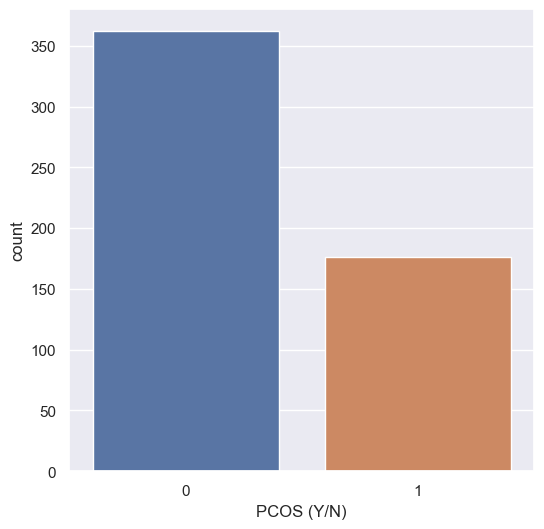

In [51]:
# Print the count of values in the "PCOS (Y/N)" column of the DataFrame 'new_data_cleaned'
print(new_data_cleaned['PCOS (Y/N)'].value_counts())
plt.figure(figsize=(6, 6))
sns.countplot(
    x='PCOS (Y/N)',
    data=new_data_cleaned
);

Cycle length(days)
5     275
6      91
4      60
2      38
3      36
7      18
9       9
11      5
8       2
12      2
0       1
10      1
Name: count, dtype: int64


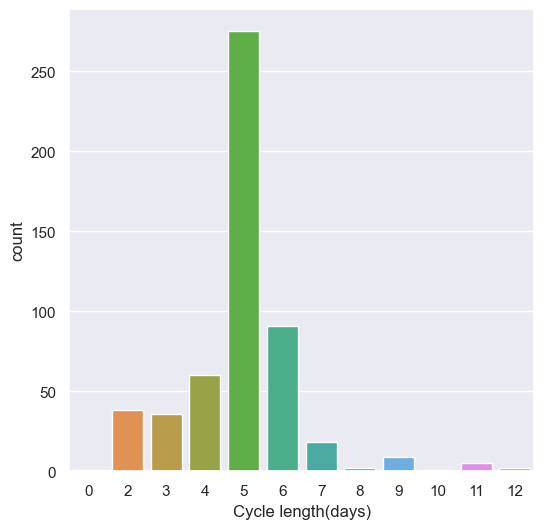

In [52]:
# Print the count of values in the "Cycle length(days)" column of the DataFrame 'new_data_cleaned'
print(new_data_cleaned['Cycle length(days)'].value_counts())
plt.figure(figsize=(6, 6))
sns.countplot(
    x='Cycle length(days)',
    data=new_data_cleaned
);

BP _Systolic (mmHg)
110    264
120    250
100     13
130      8
140      2
12       1
Name: count, dtype: int64


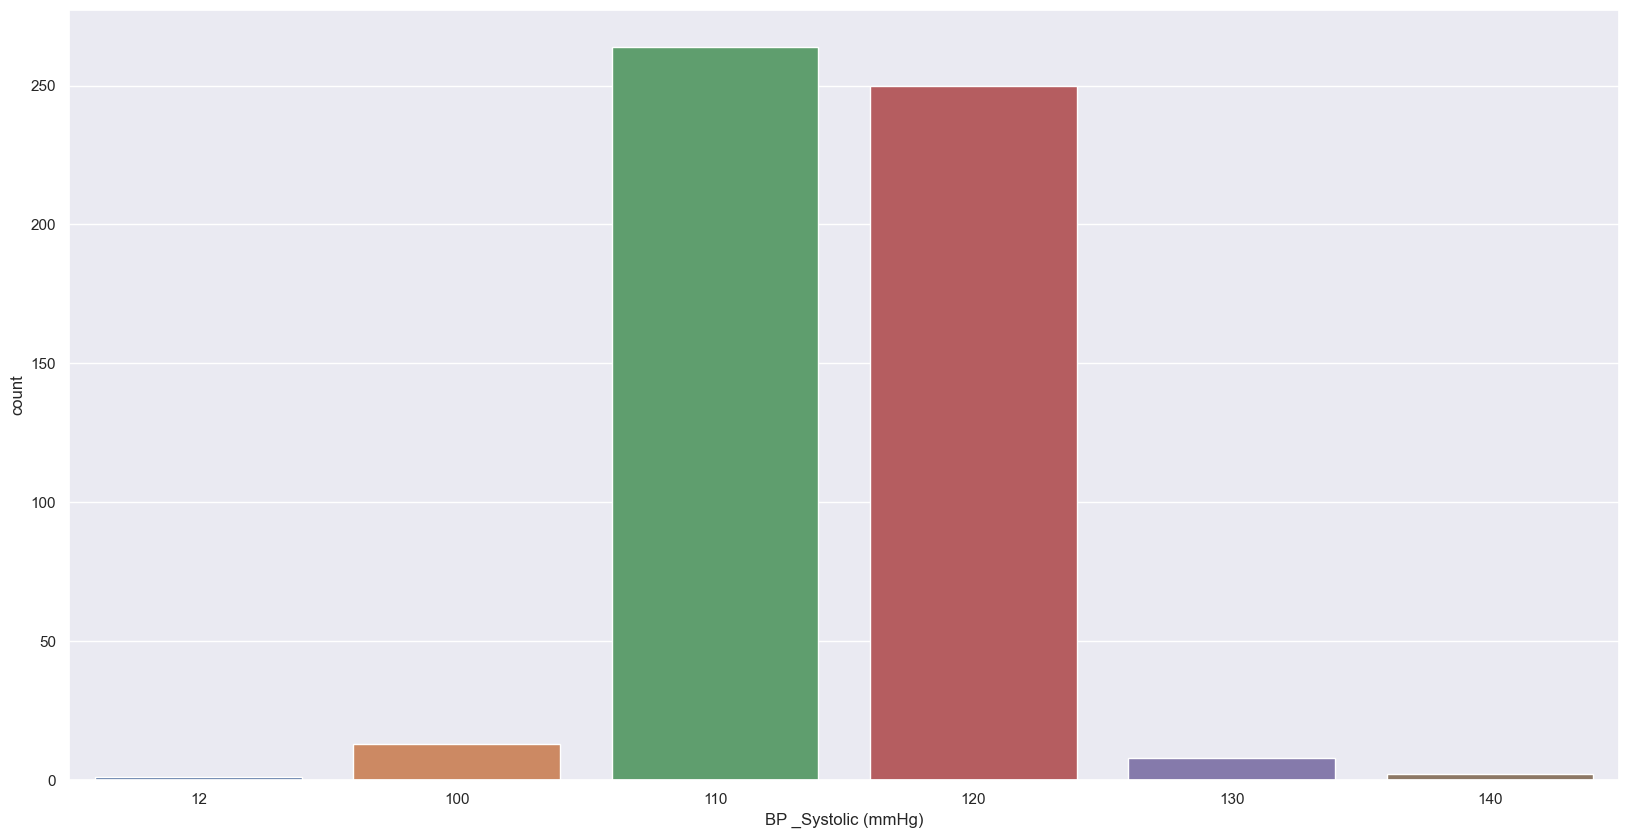

In [53]:
# Print the count of values in the "BP _Systolic (mmHg)" column of the DataFrame 'new_data_cleaned'
print(new_data_cleaned['BP _Systolic (mmHg)'].value_counts())
plt.figure(figsize=(20, 10))
sns.countplot(
    x='BP _Systolic (mmHg)',
    data=new_data_cleaned
);

In [54]:
# Replace the value 12 in the "BP _Systolic (mmHg)" column with 120
new_data_cleaned["BP _Systolic (mmHg)"].replace({12: 120}, inplace=True)
# Replace the value 8 in the "BP _Diastolic (mmHg)" column with 80
new_data_cleaned["BP _Diastolic (mmHg)"].replace({8: 80}, inplace=True)

# Save Cleaned Dataset

In [55]:
new_data_cleaned.to_csv('PCOS_clean_data_without_infertility.csv', index=False)

# Exploratory Data Analysis (EDA)

In [56]:
# Load the dataset "PCOS_clean_data_without_infertility.csv" into a pandas DataFrame and assign it to 'eda'
eda =pd.read_csv("PCOS_clean_data_without_infertility.csv")   

In [57]:
eda.shape

(538, 42)

In [58]:
#Verifying if any missing values are left
eda.columns[eda.isna().any()].tolist() #no more missing values left

[]

In [59]:
# Check for duplicates in the 'Full_new' sheet
duplicates = eda.duplicated()
# Print the number of duplicates
print('Number of duplicates:', duplicates.sum())

Number of duplicates: 0


In [60]:
eda.describe()

PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)          BMI  \
count  538.000000  538.000000   538.000000   538.000000  538.000000   
mean     0.327138   31.420074    59.644052   156.480104   24.315552   
std      0.469605    5.413801    11.051033     6.042238    4.065492   
min      0.000000   20.000000    31.000000   137.000000   12.417882   
25%      0.000000   28.000000    52.000000   152.000000   21.657937   
50%      0.000000   31.000000    59.300000   156.000000   24.229840   
75%      1.000000   35.000000    65.000000   160.000000   26.658740   
max      1.000000   48.000000   108.000000   180.000000   38.900000   

       Blood Group  Pulse rate(bpm)   RR (breaths/min)    Hb(g/dl)  \
count   538.000000        538.000000        538.000000  538.000000   
mean     13.802974         73.250929         19.236059   11.160558   
std       1.844573          4.441870          1.688509    0.868516   
min      11.000000         13.000000         16.000000    8.500000   
25%      13.000000         72.000000         18.000000   10.500000   
50%      14.000000         72.000000         18.000000   11.000000   
75%      15.000000         74.000000         20.000000   11.775000   
max      18.000000         82.000000         28.000000   14.800000   

       Cycle(R/I)  ...  Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  \
count  538.000000  ...    538.000000       538.000000         538.000000   
mean     0.276952  ...      0.490706         0.516729           0.245353   
std      0.447909  ...      0.500379         0.500185           0.430697   
min      0.000000  ...      0.000000         0.000000           0.000000   
25%      0.000000  ...      0.000000         0.000000           0.000000   
50%      0.000000  ...      0.000000         1.000000           0.000000   
75%      1.000000  ...      1.000000         1.000000           0.000000   
max      1.000000  ...      1.000000         1.000000           1.000000   

       BP _Systolic (mmHg)  BP _Diastolic (mmHg)  Follicle No. (L)  \
count           538.000000            538.000000        538.000000   
mean            114.832714             77.081784          6.120818   
std               5.922363              4.711095          4.226181   
min             100.000000             60.000000          0.000000   
25%             110.000000             70.000000          3.000000   
50%             110.000000             80.000000          5.000000   
75%             120.000000             80.000000          9.000000   
max             140.000000            100.000000         22.000000   

       Follicle No. (R)  Avg. F size (L) (mm)  Avg. F size (R) (mm)  \
count        538.000000            538.000000            538.000000   
mean           6.646840             15.014498             15.448643   
std            4.448108              3.567421              3.322812   
min            0.000000              0.000000              0.000000   
25%            3.000000             13.000000             13.000000   
50%            6.000000             15.000000             16.000000   
75%           10.000000             18.000000             18.000000   
max           20.000000             24.000000             24.000000   

       Endometrium (mm)  
count        538.000000  
mean           8.477454  
std            2.165036  
min            0.000000  
25%            7.000000  
50%            8.500000  
75%            9.800000  
max           18.000000  

[8 rows x 42 columns]

In [61]:
eda.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [17]:
columns = [ 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']

In [62]:
#Identifying numerical and categorical features in dataframe
numerical_variables = []
categorical_variables = []
for x in eda.columns:
    if len(eda[x].value_counts()) < 9:
        if x not in ["RR (breaths/min)", "Cycle(R/I)", "No. of aborptions", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)"]:
            categorical_variables.append(x)
    else:
        numerical_variables.append(x)

In [63]:
numerical_variables

[' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Pulse rate(bpm) ',
 'Hb(g/dl)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 '  I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

In [64]:
categorical_variables

['PCOS (Y/N)',
 'Blood Group',
 'Pregnant(Y/N)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)']

In [65]:
#Dealing with categorical values.
#In this database the type objects are numeric values saved as strings.
#So I am just converting it into a numeric value.
eda["AMH(ng/mL)"] = pd.to_numeric(eda["AMH(ng/mL)"], errors='coerce')
eda["II    beta-HCG(mIU/mL)"] = pd.to_numeric(eda["II    beta-HCG(mIU/mL)"], errors='coerce')

In [177]:
from cycler import cycler
# Define custom colors for hospital data
hospital_colors = ['#C24D4D', '#870000', '#C02D2D', '#DD5151', '#F5A9A9', '#F5C9C9']
# Create a cycler object with custom colors
hospital_cycler = cycler('color', hospital_colors)
# Update Matplotlib rcParams with custom settings
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=hospital_cycler)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

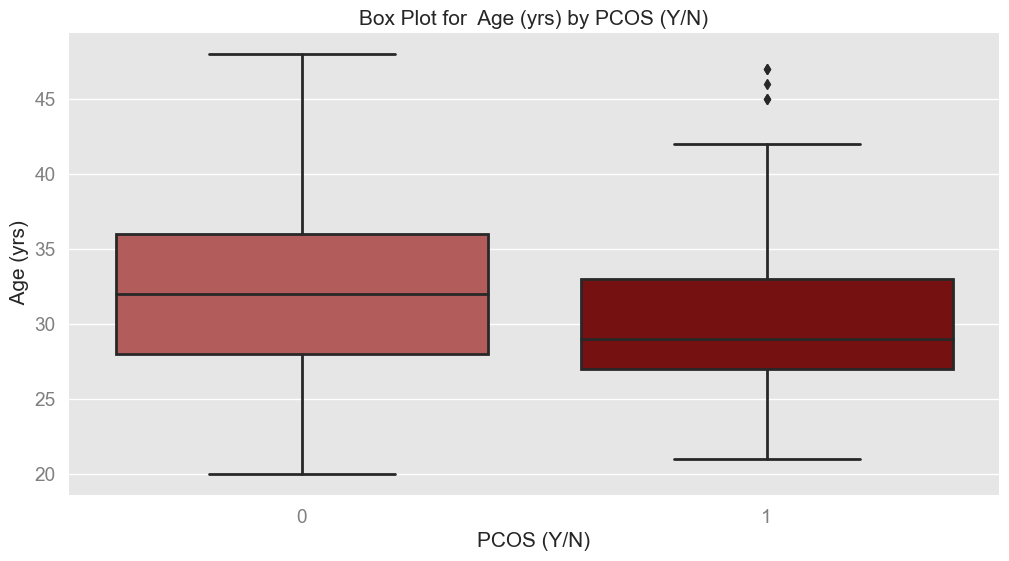

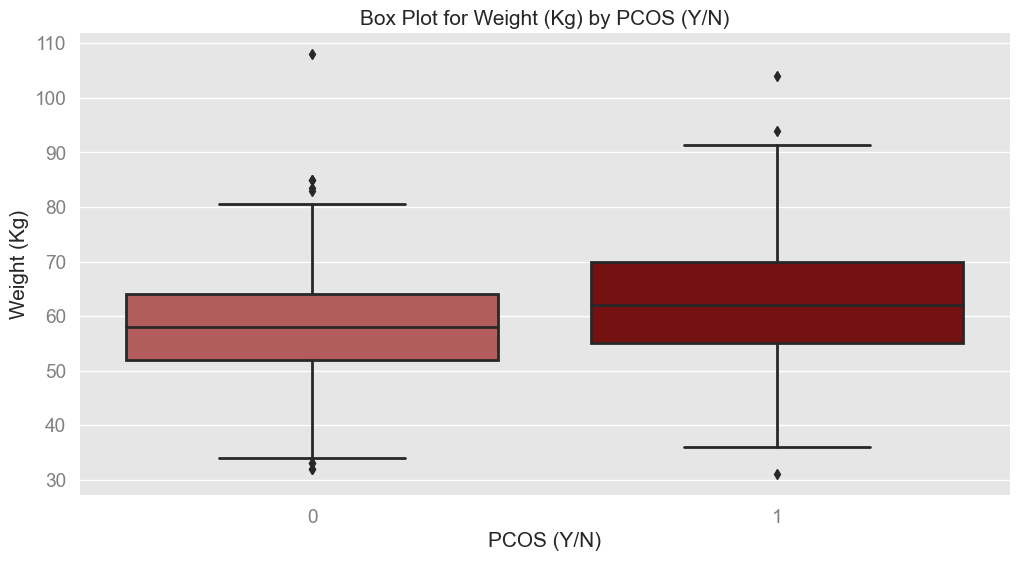

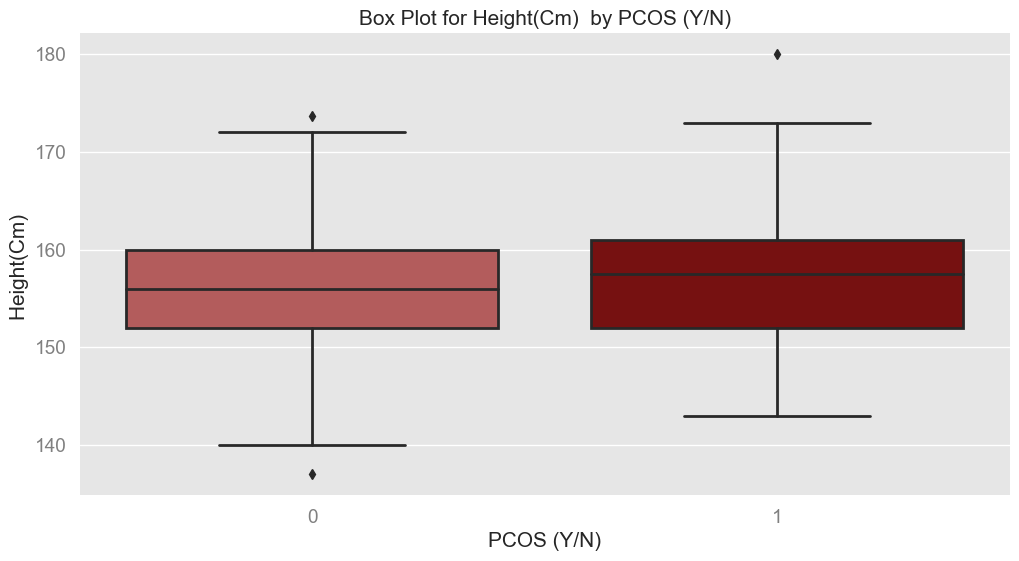

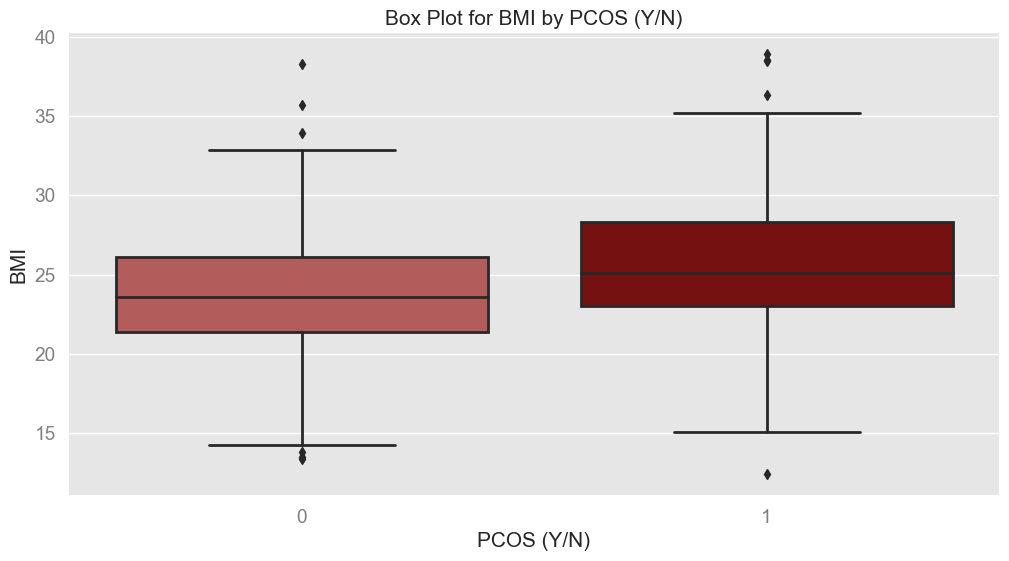

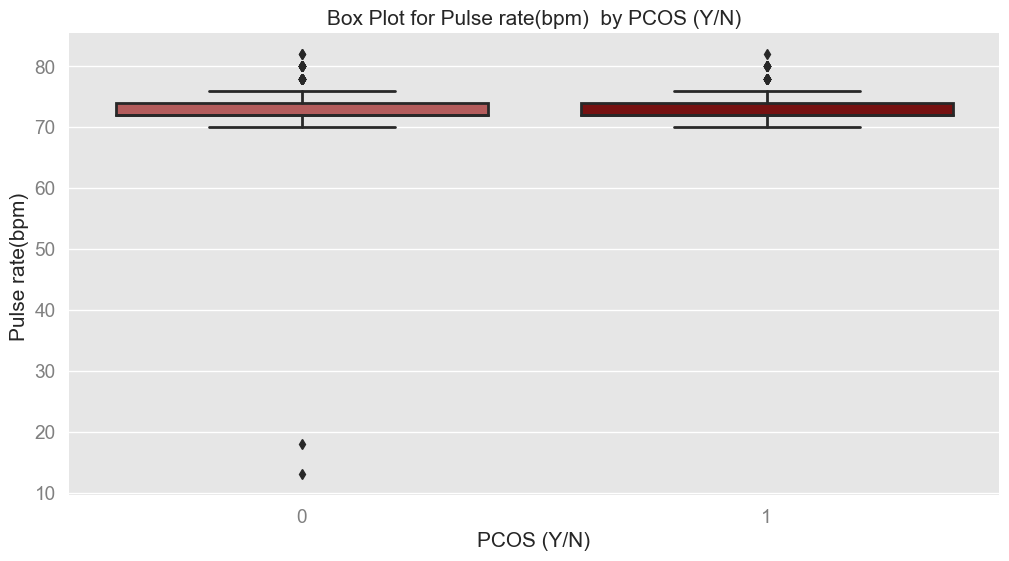

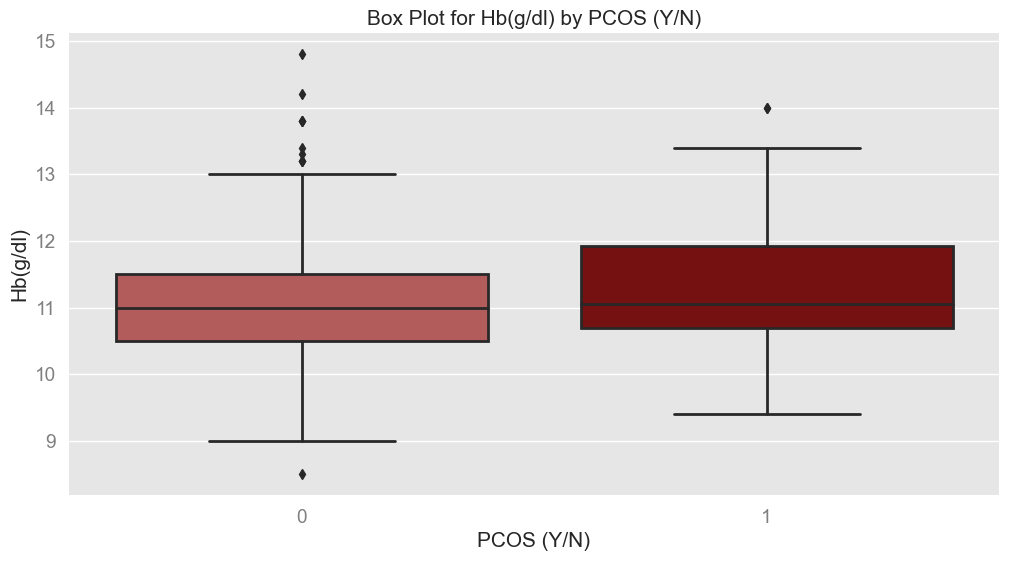

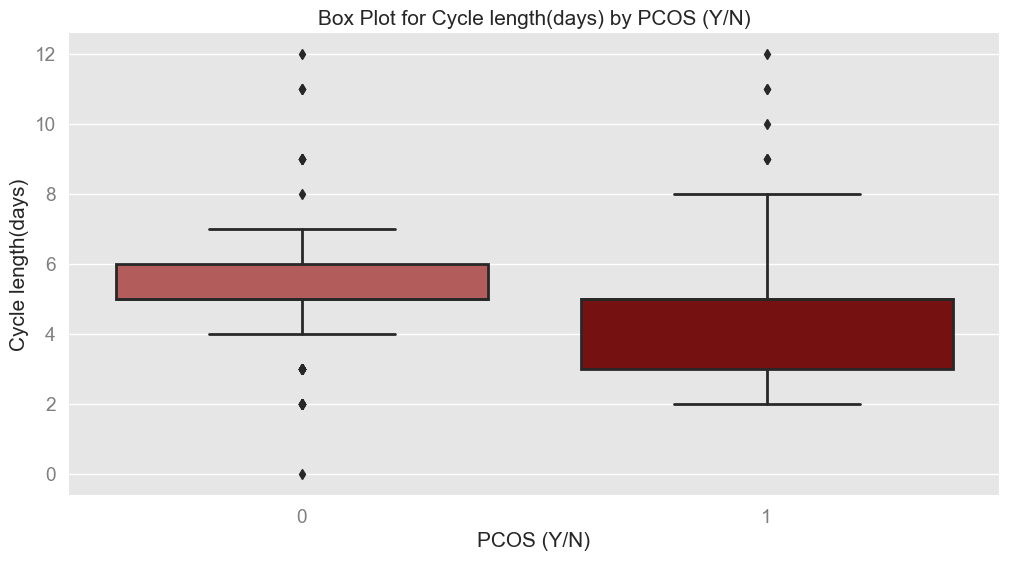

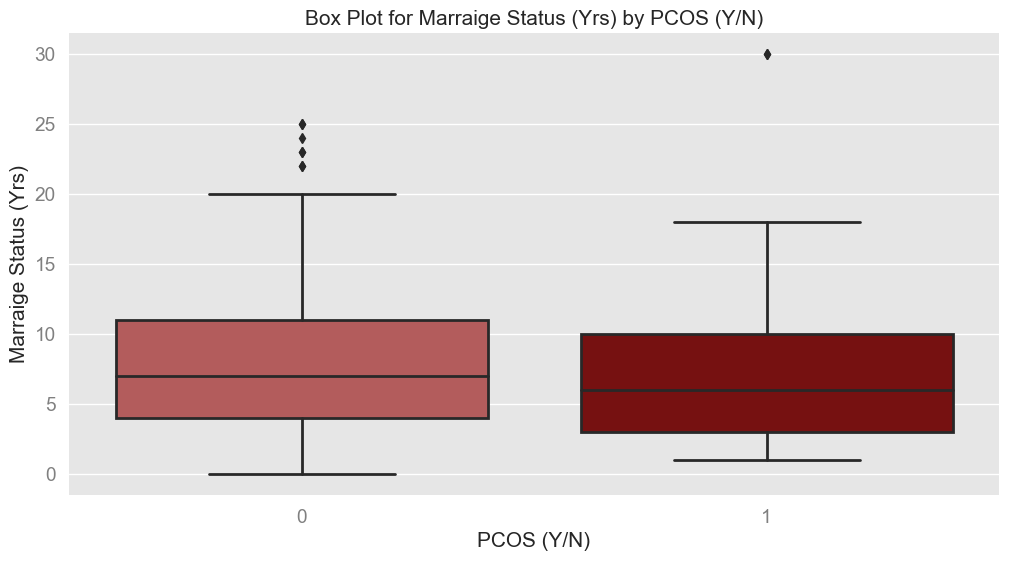

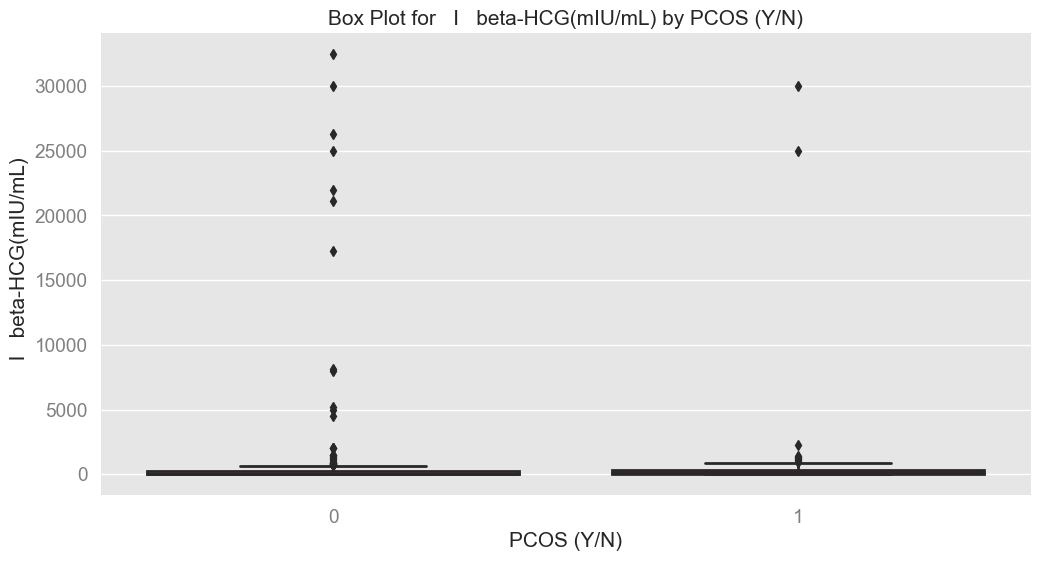

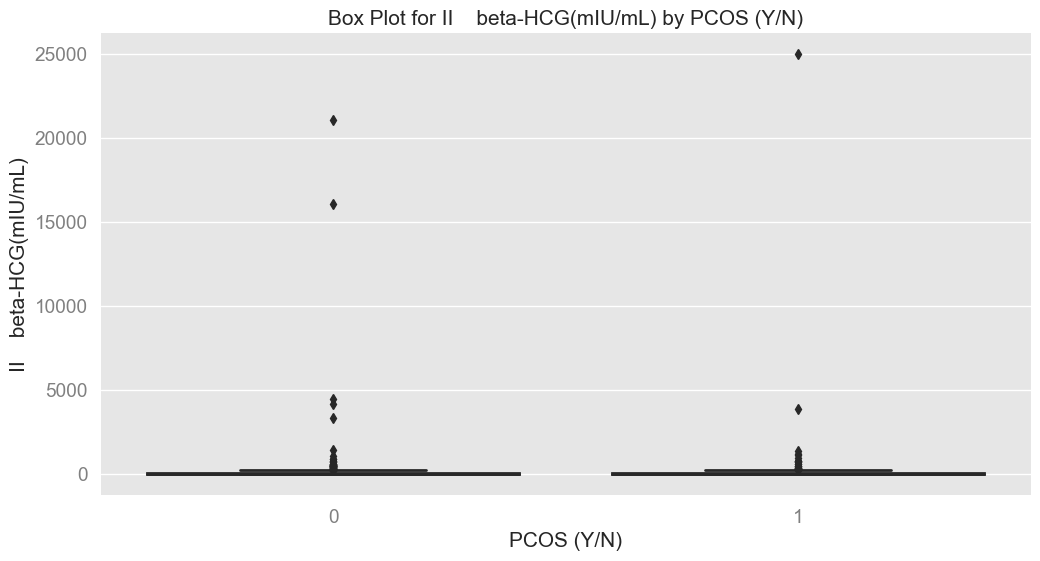

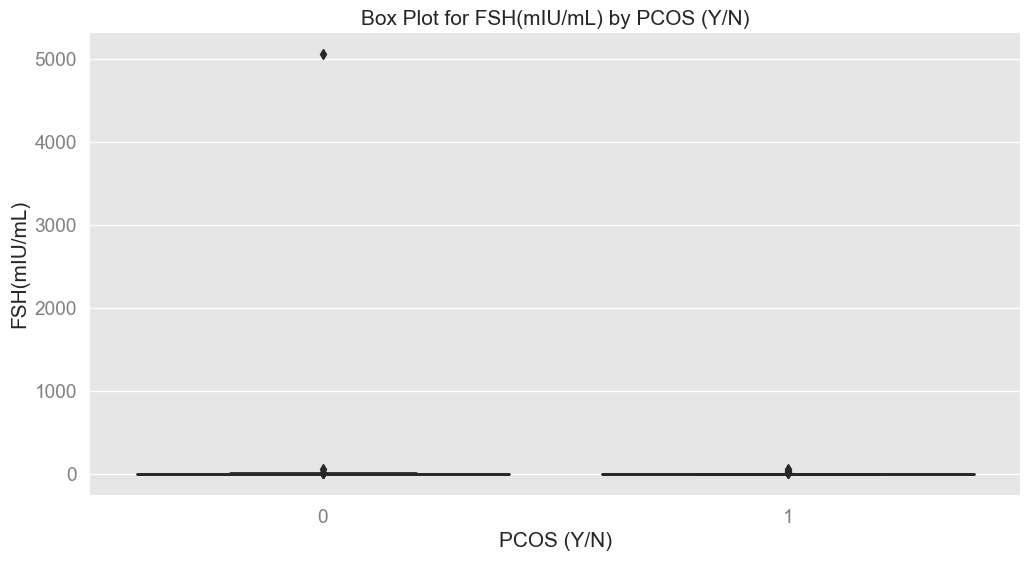

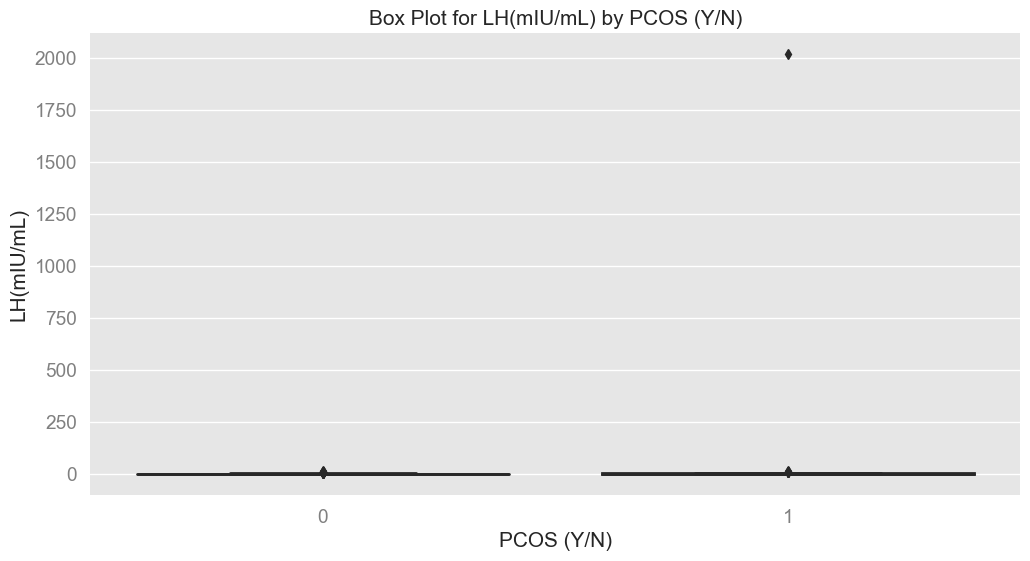

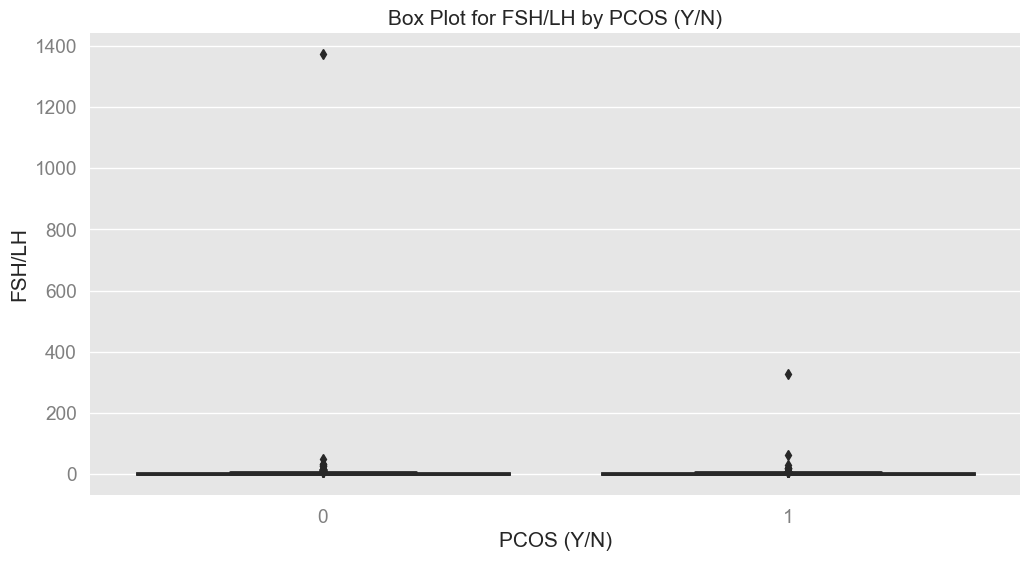

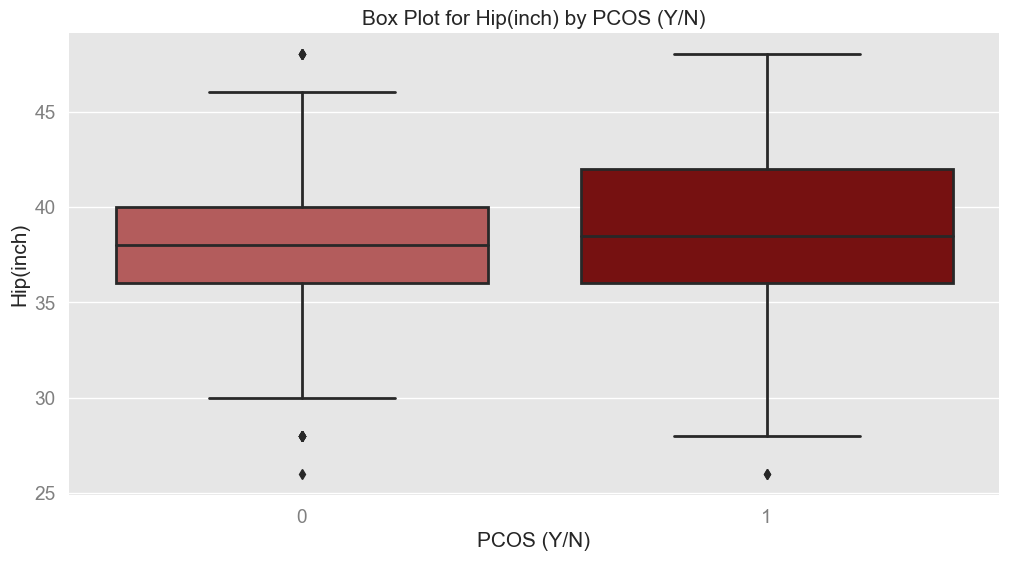

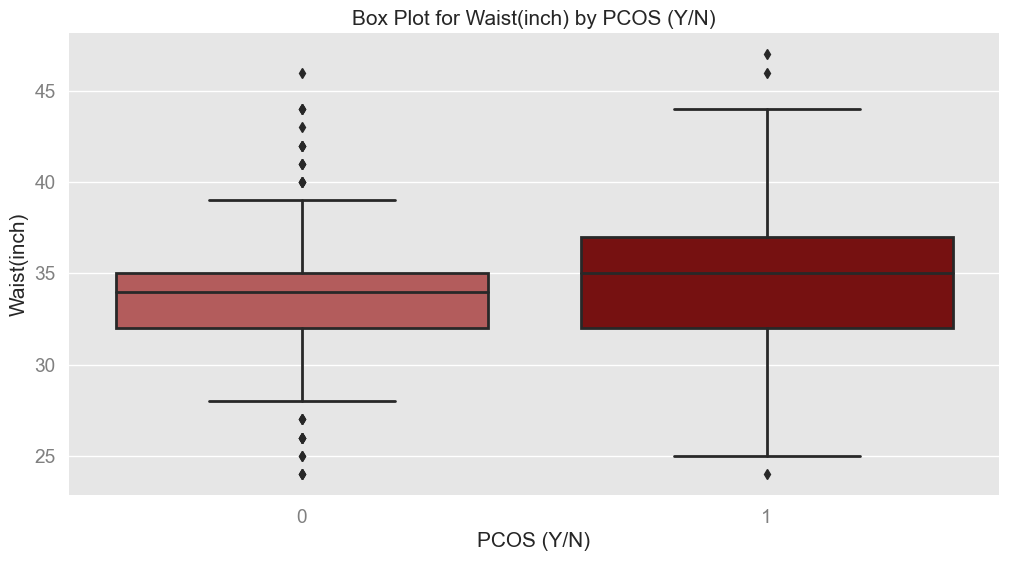

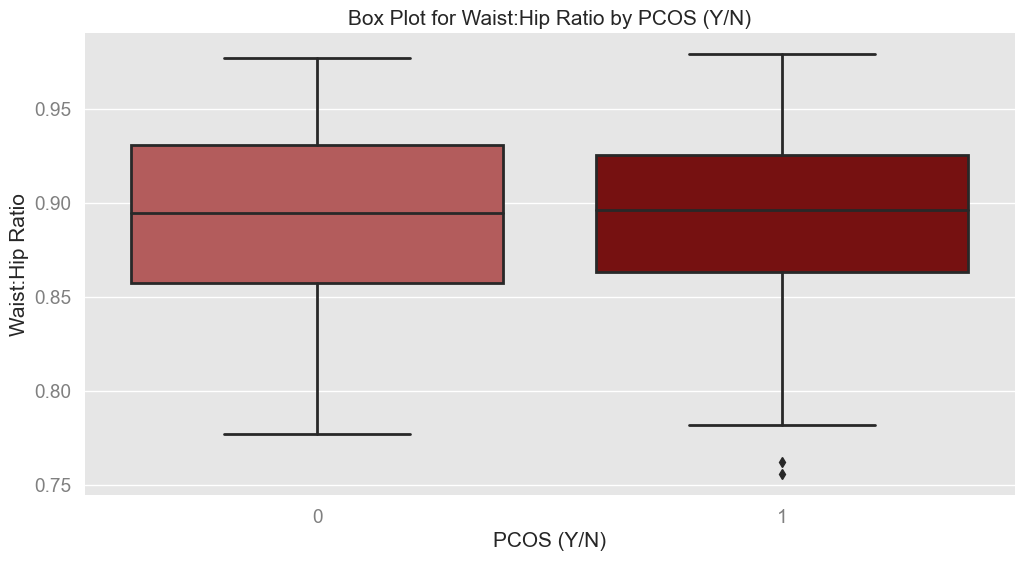

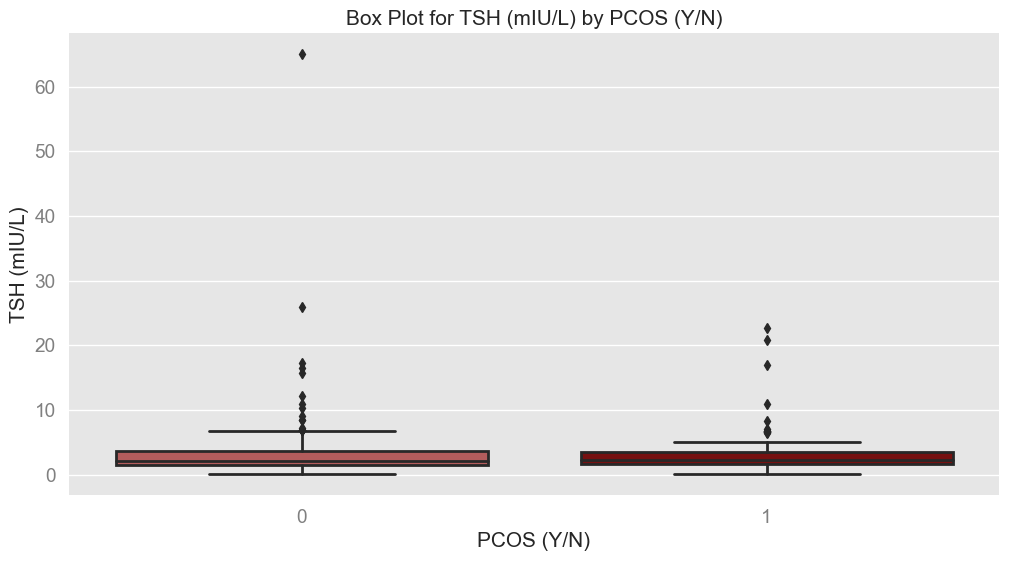

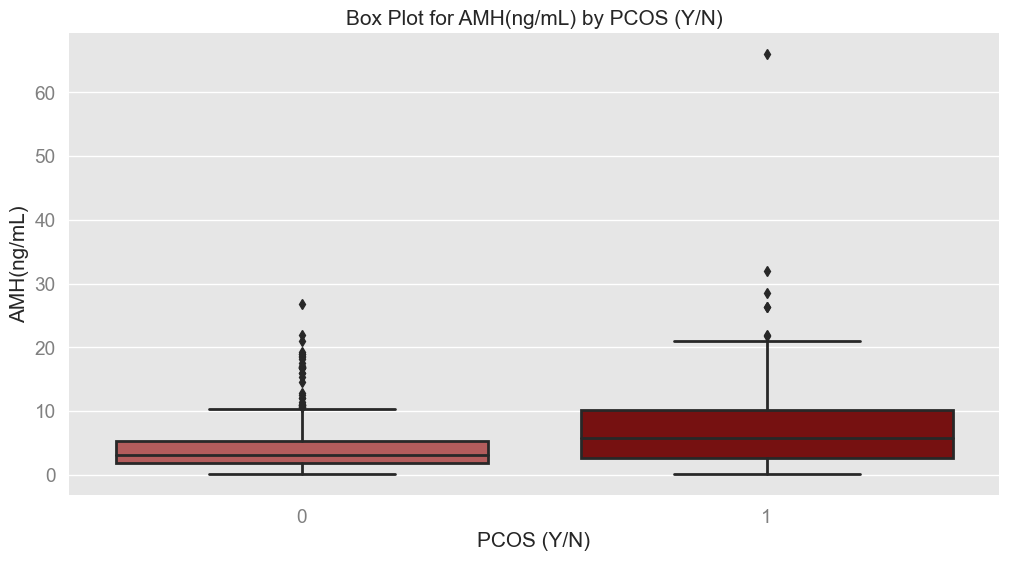

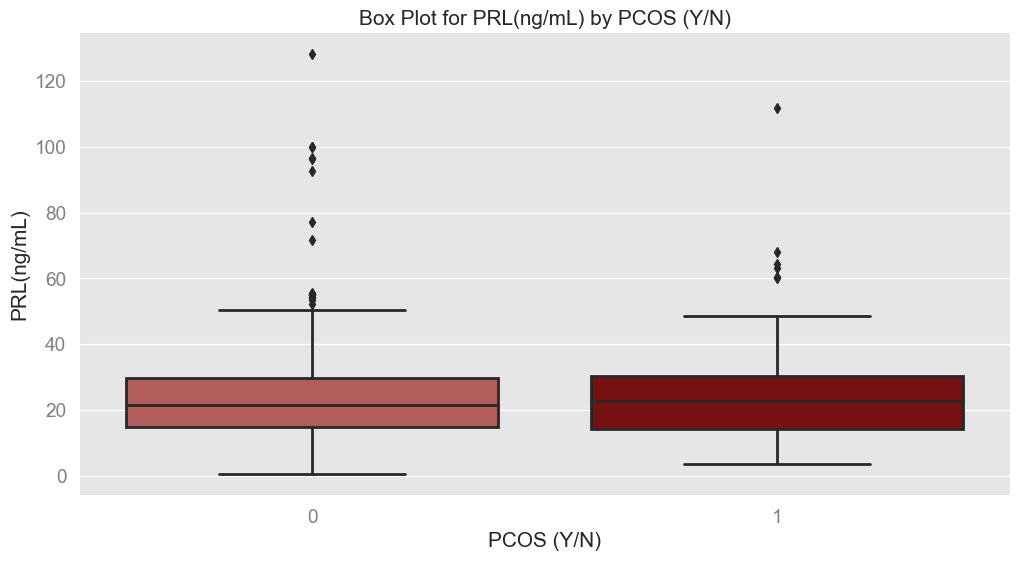

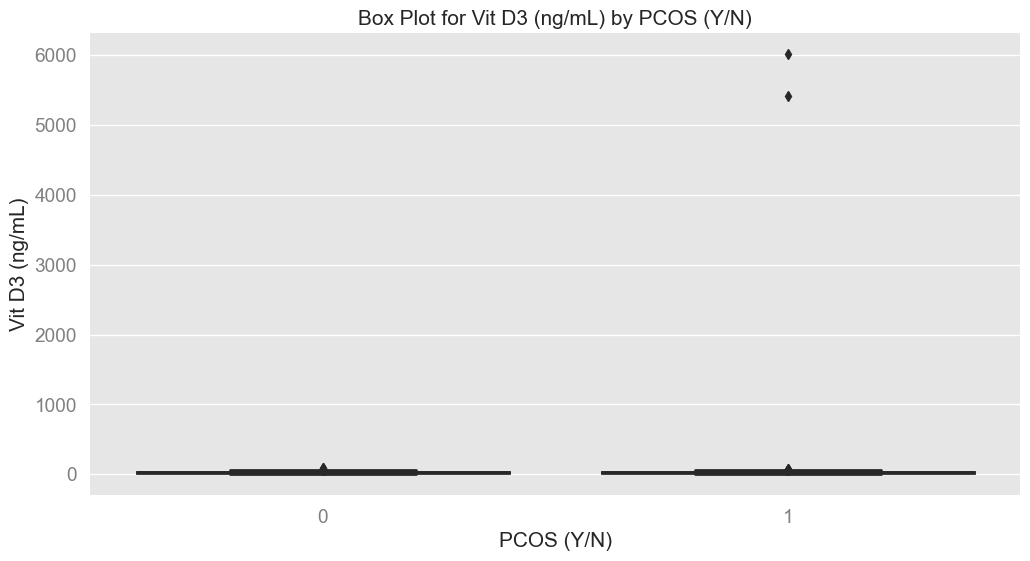

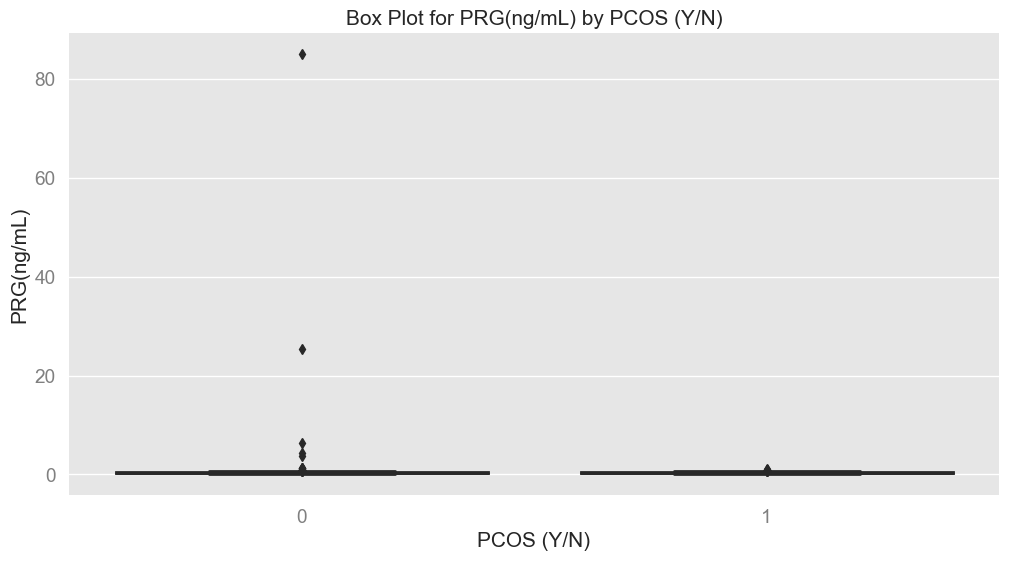

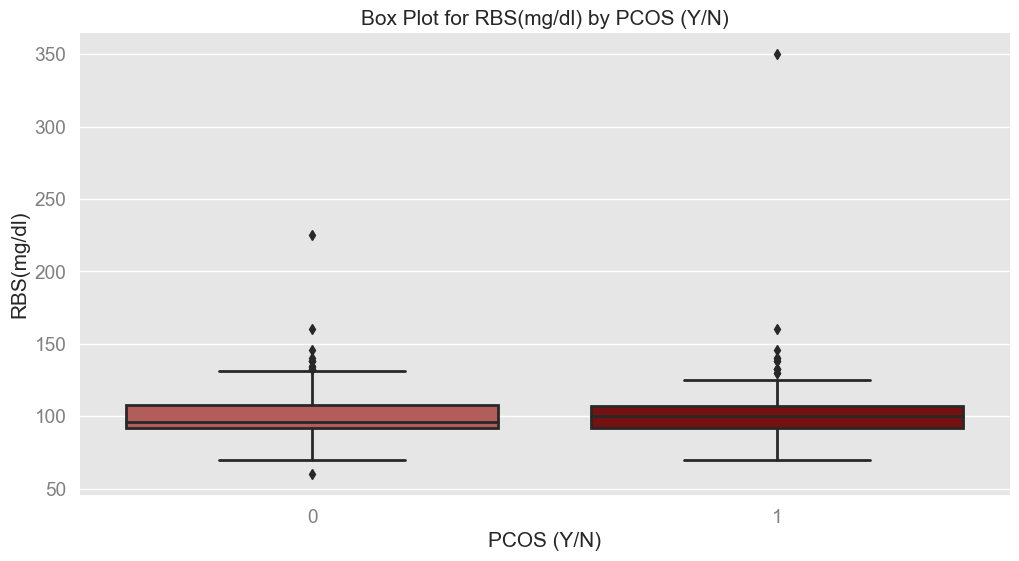

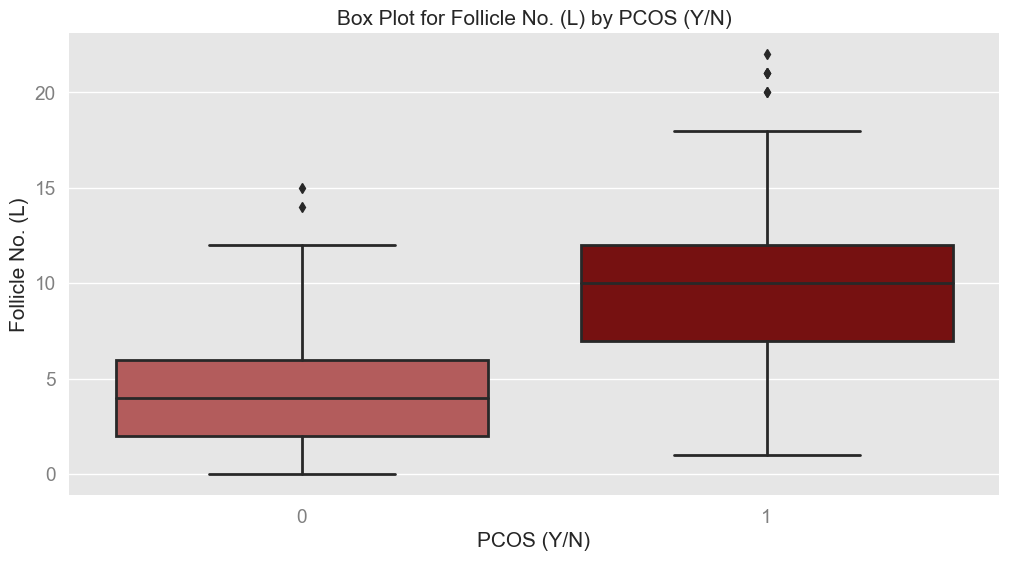

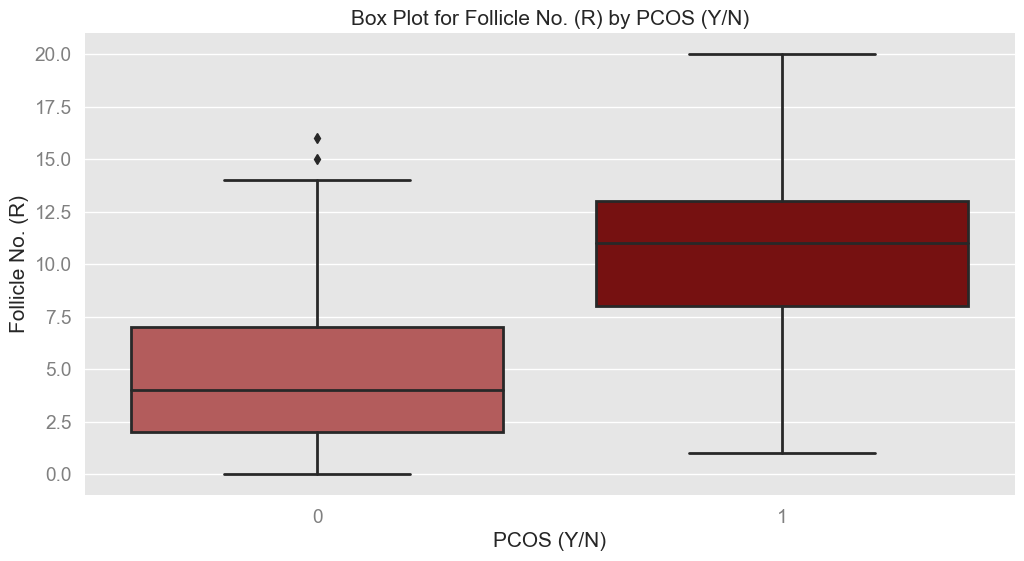

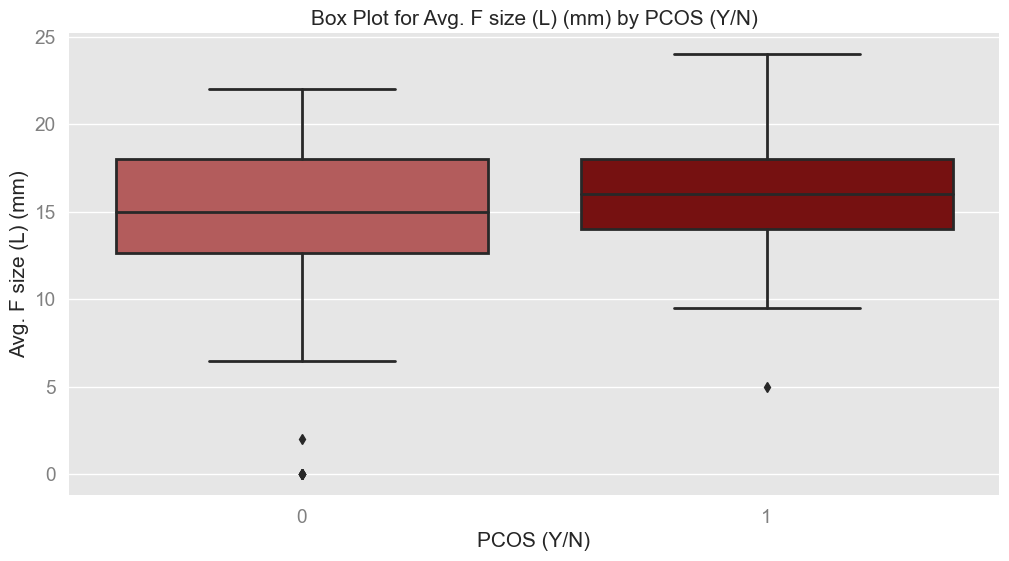

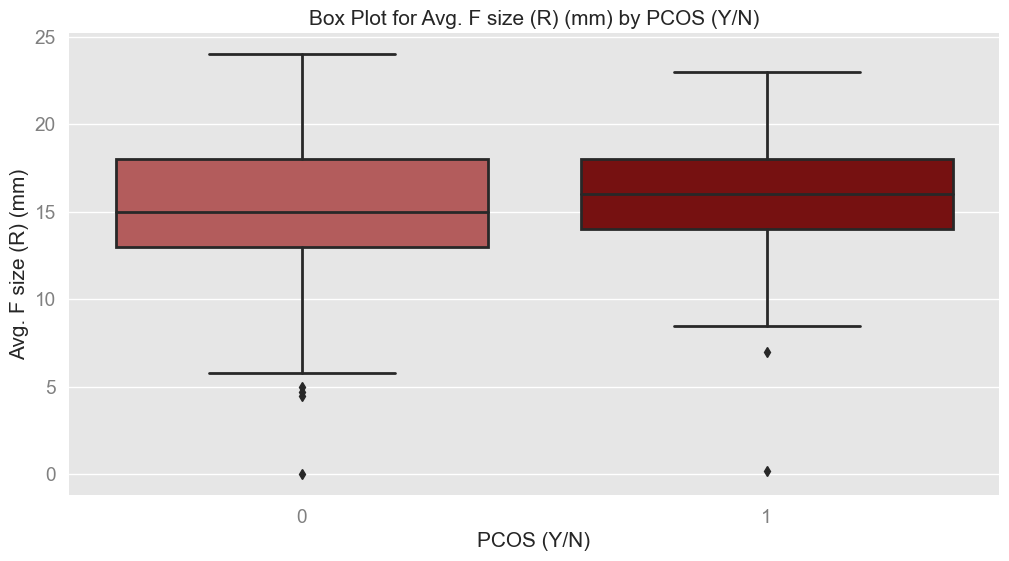

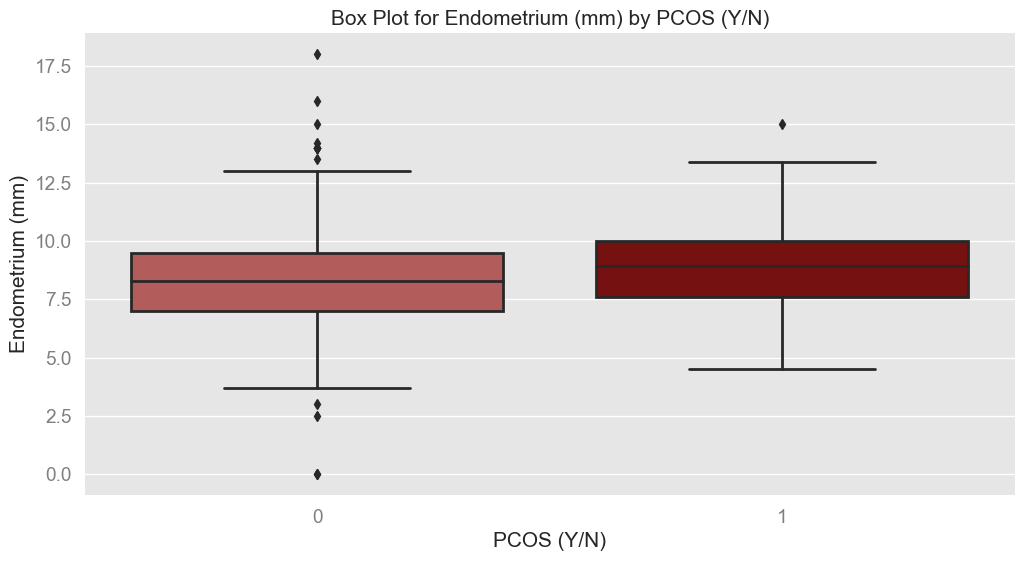

In [178]:
# Plotting Box plots for the numerical variables
for y in numerical_variables:
    sns.boxplot(y=y, x="PCOS (Y/N)", data=eda)
    plt.title(f'Box Plot for {y} by PCOS (Y/N)')
    plt.xlabel('PCOS (Y/N)')
    plt.ylabel(y)
    plt.show()

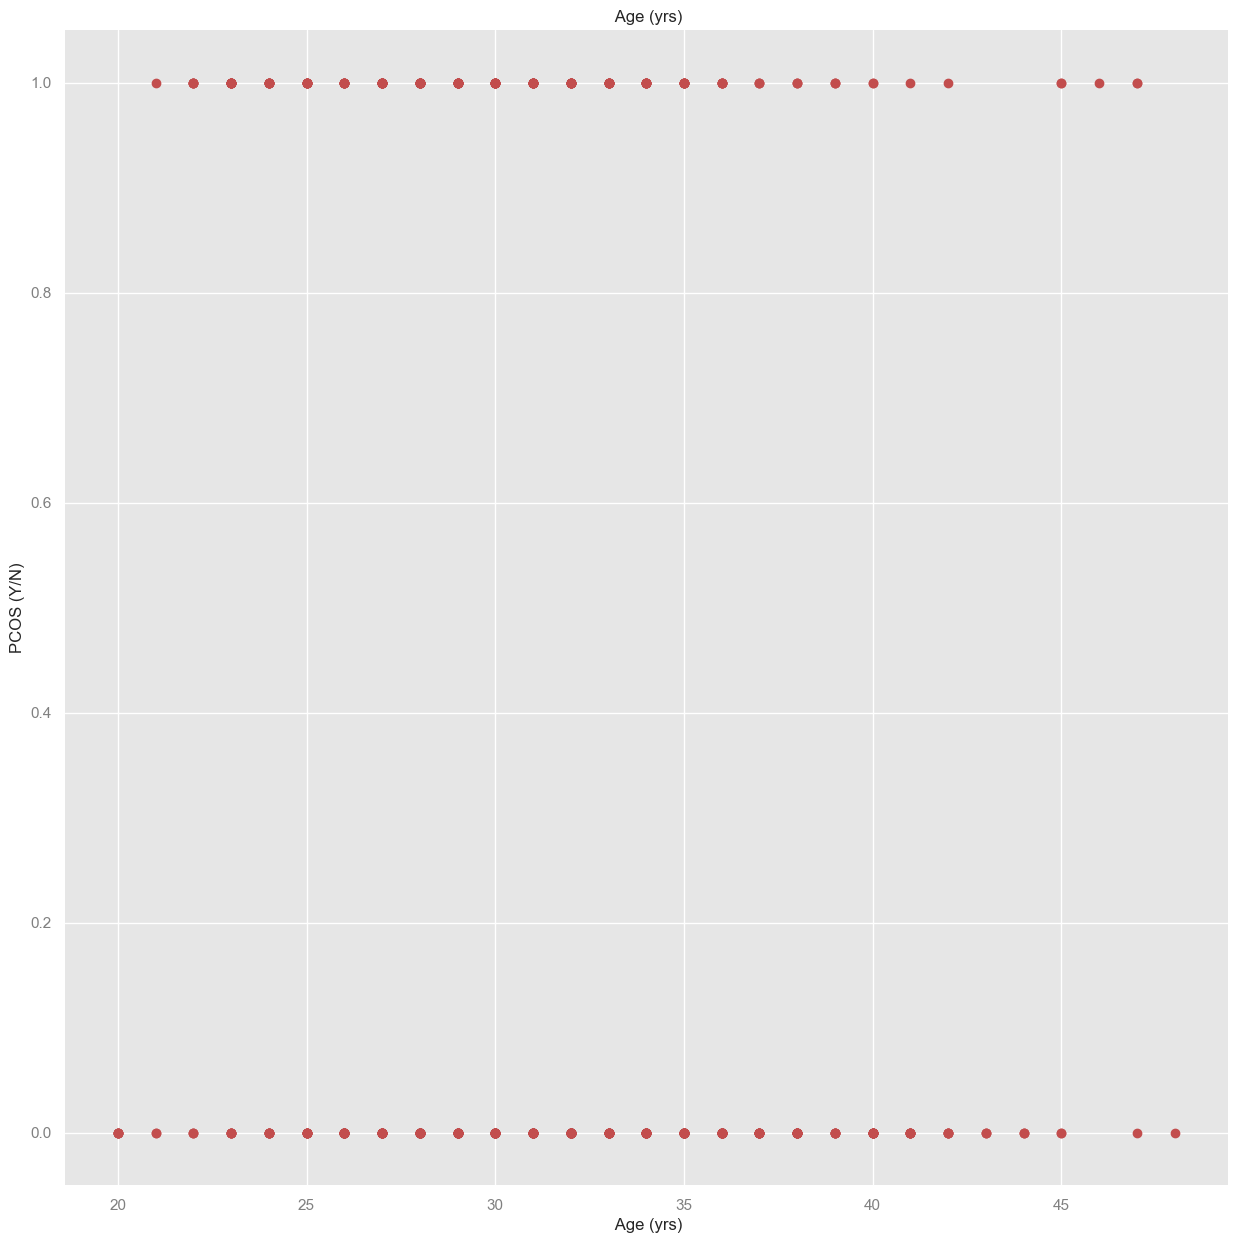

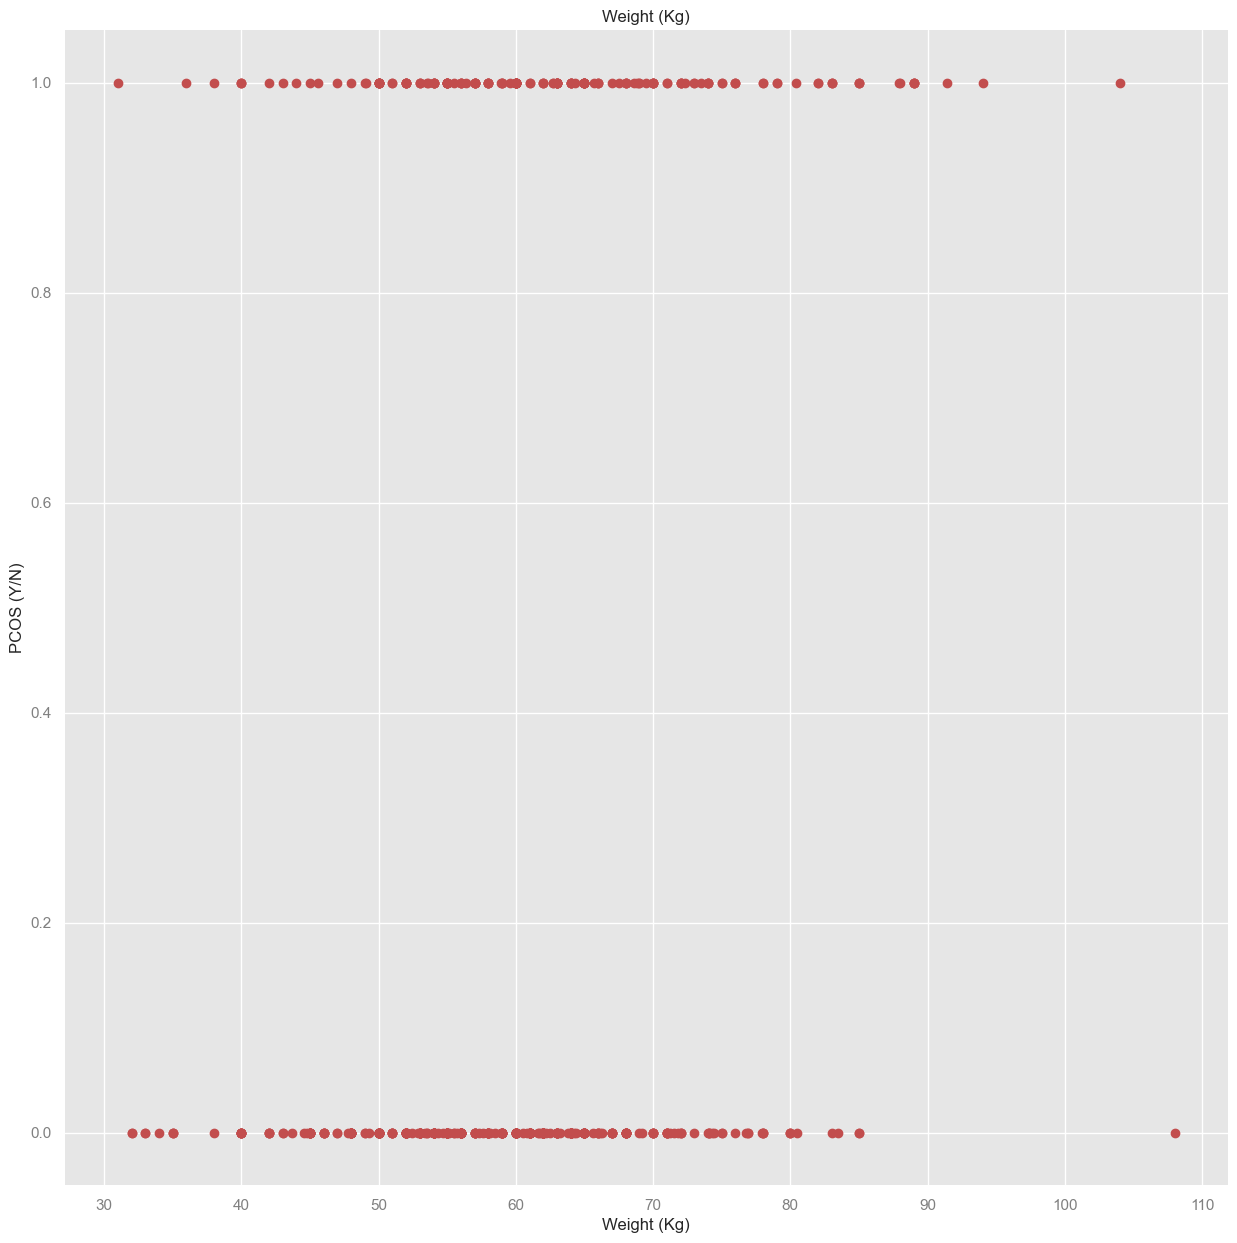

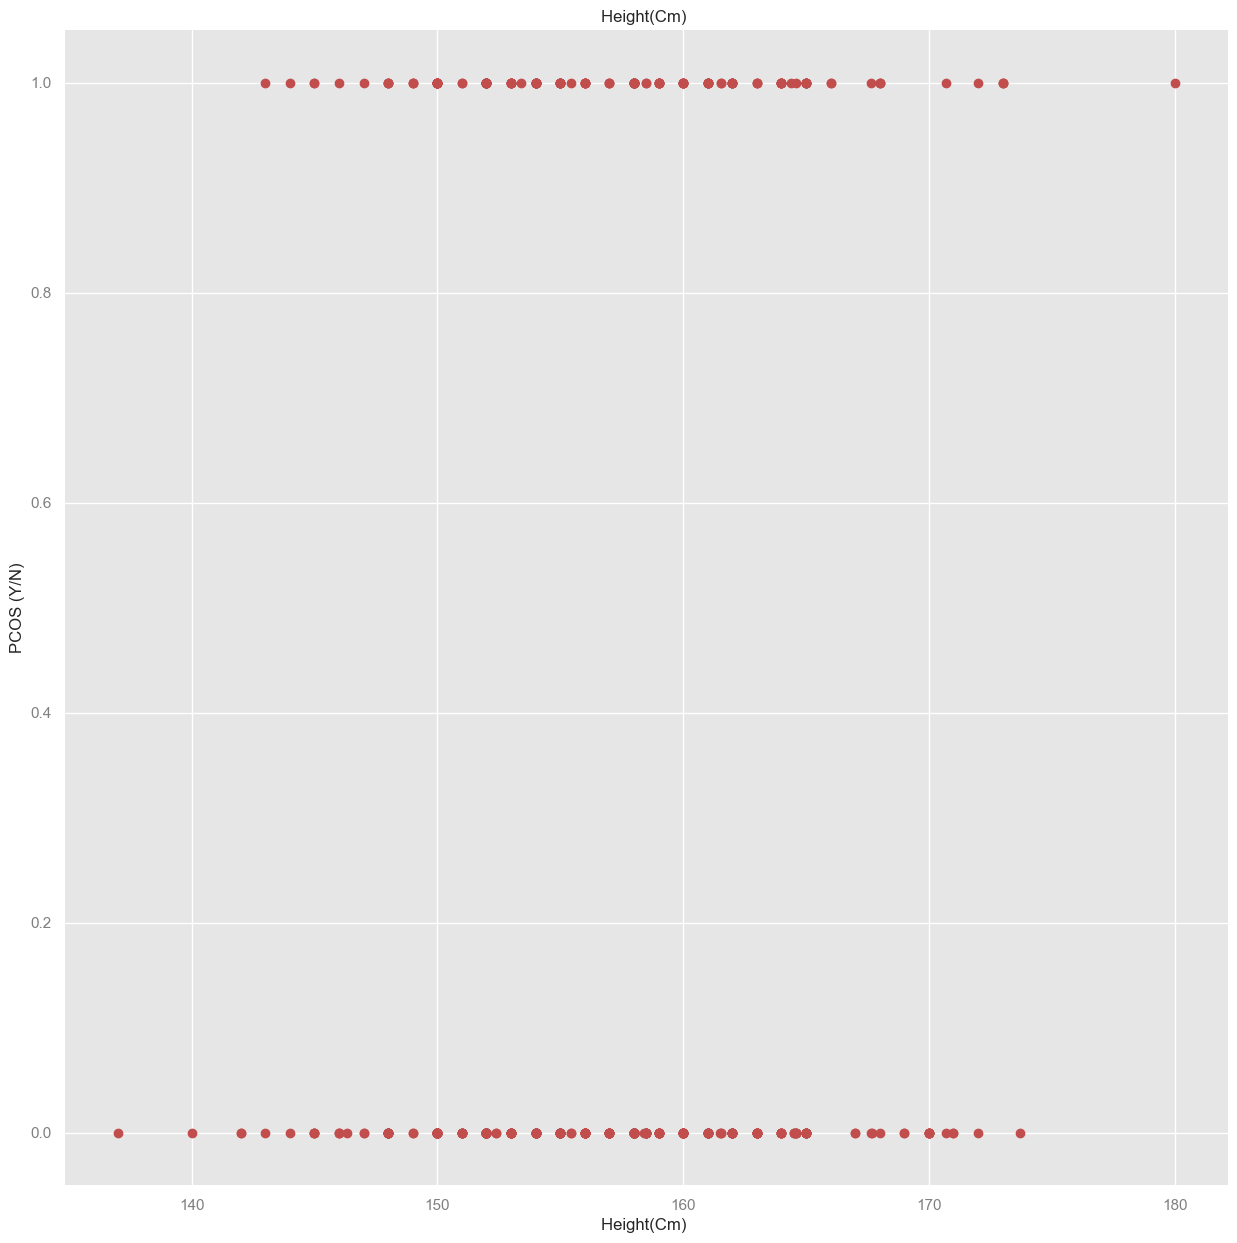

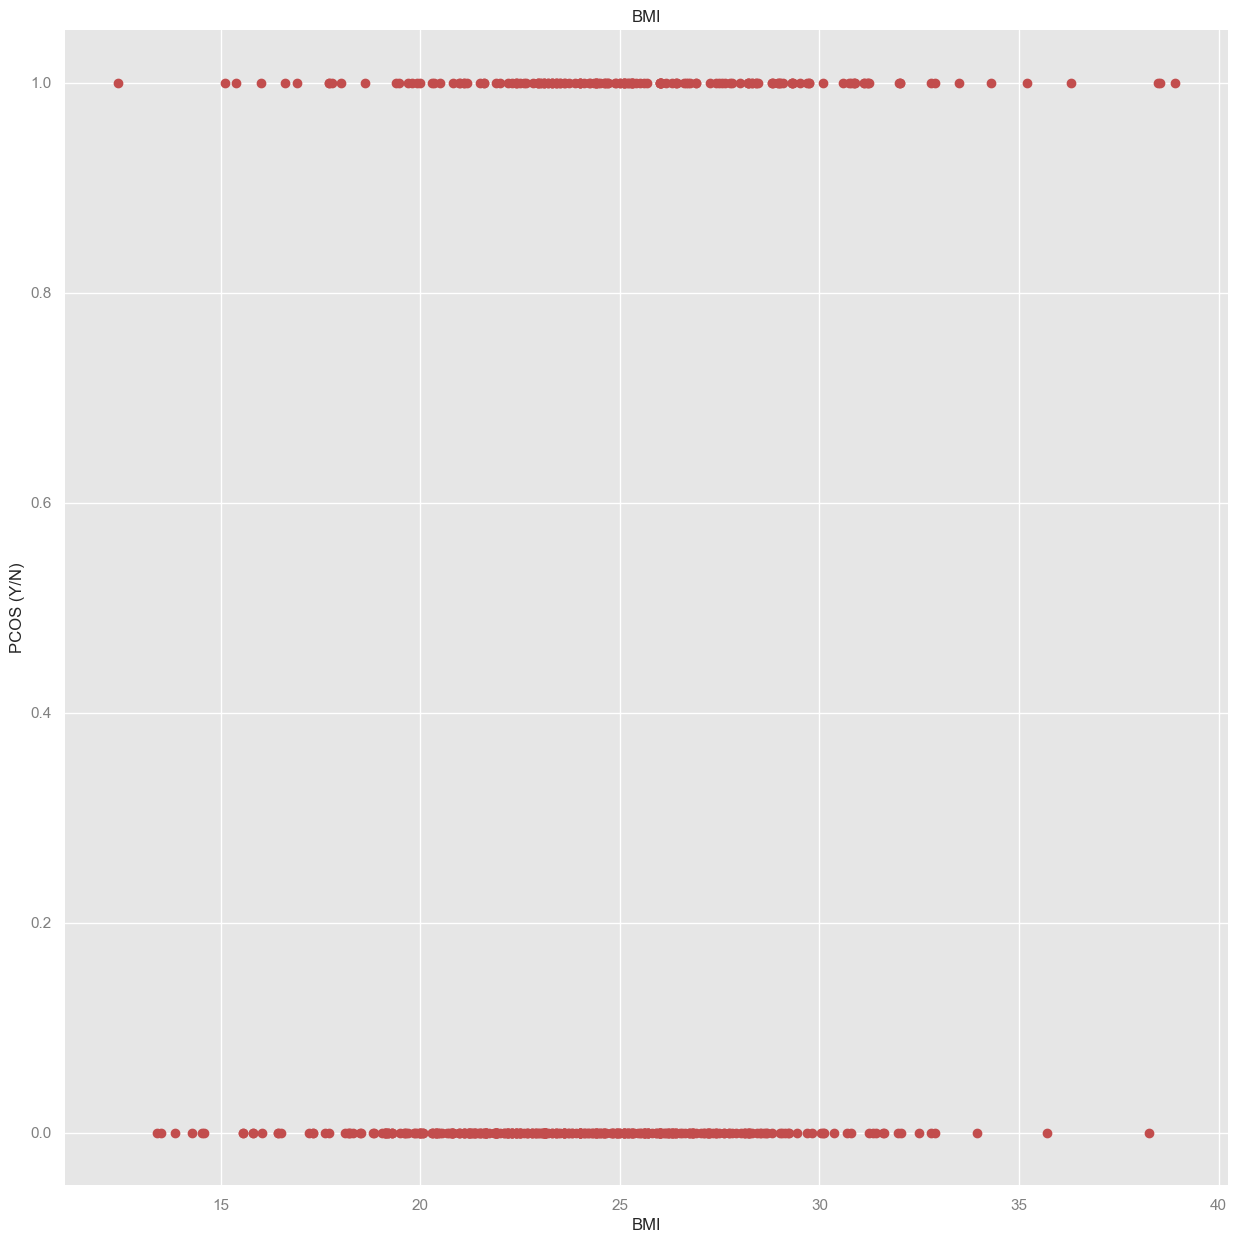

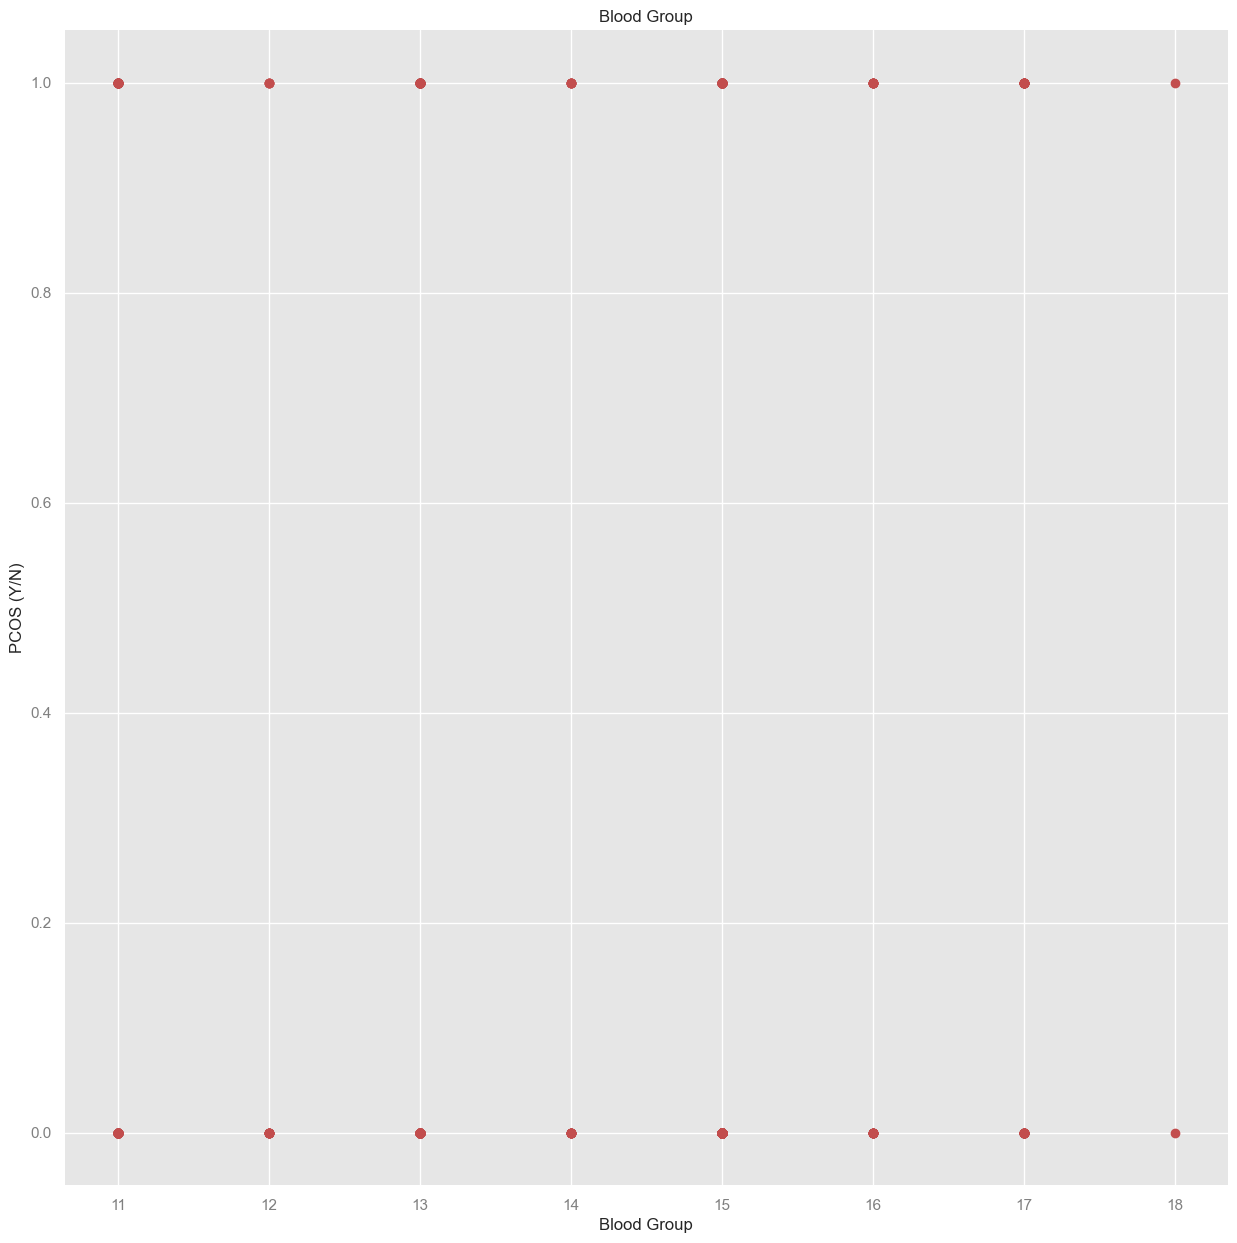

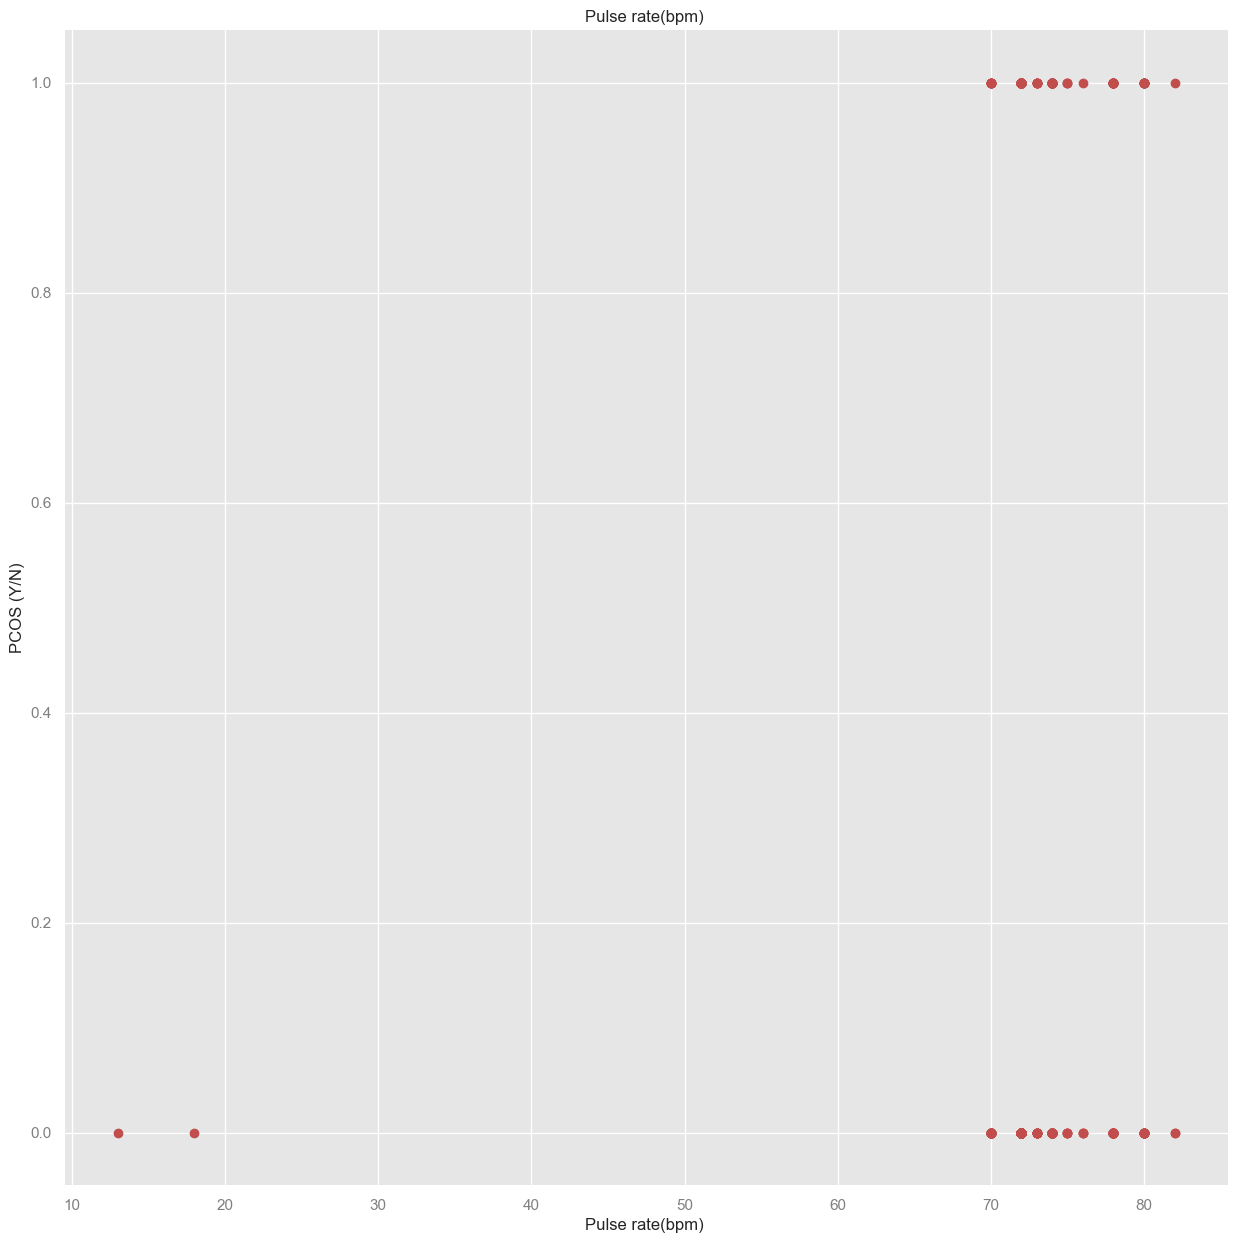

In [69]:
# Iterate over columns to plot scatter plots
columns_to_plot = [' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ']
# Iterate over columns to plot scatter plots
for col in columns_to_plot:
    plt.scatter(eda[col], eda['PCOS (Y/N)'])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PCOS (Y/N)')
    plt.show()

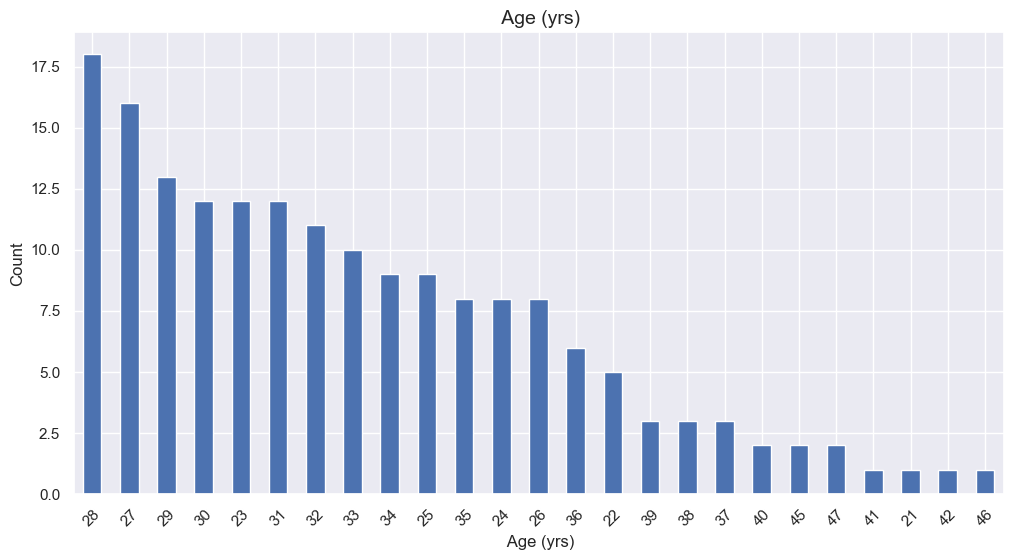

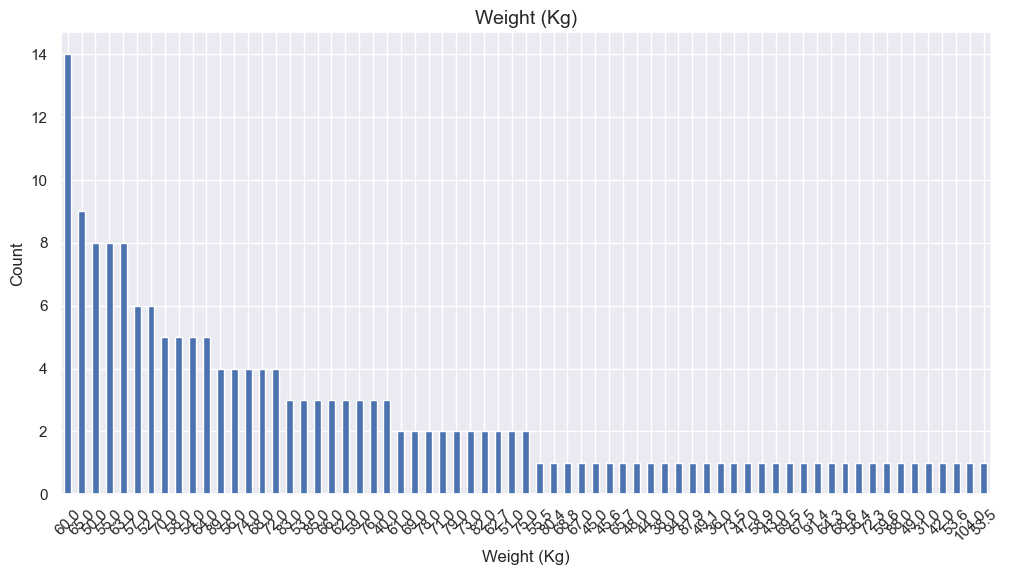

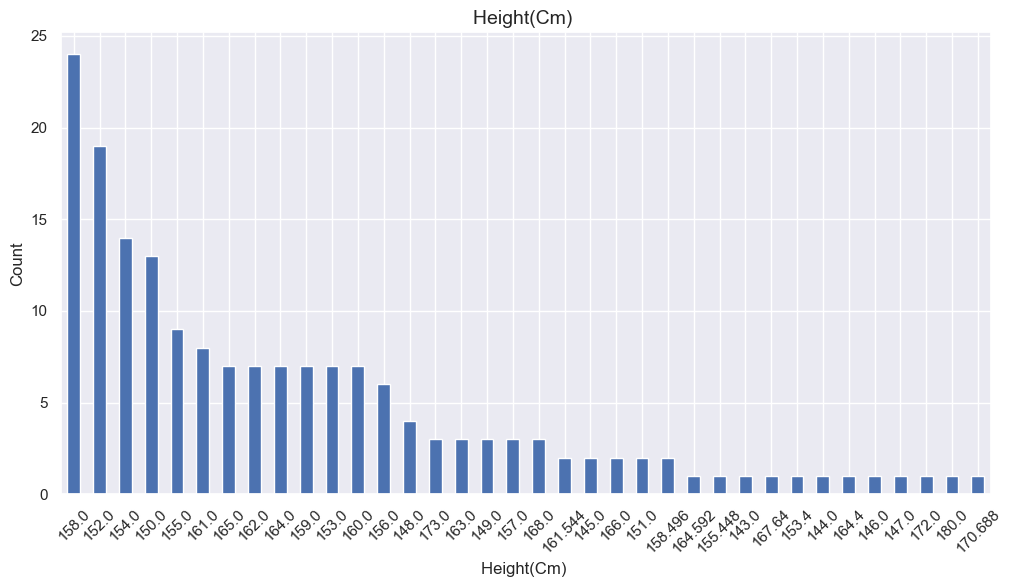

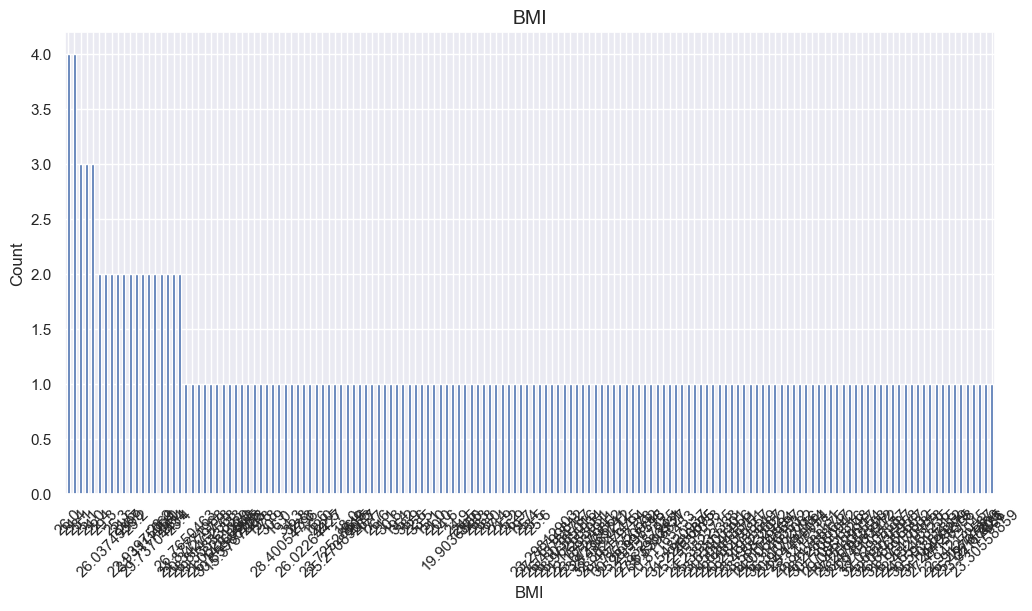

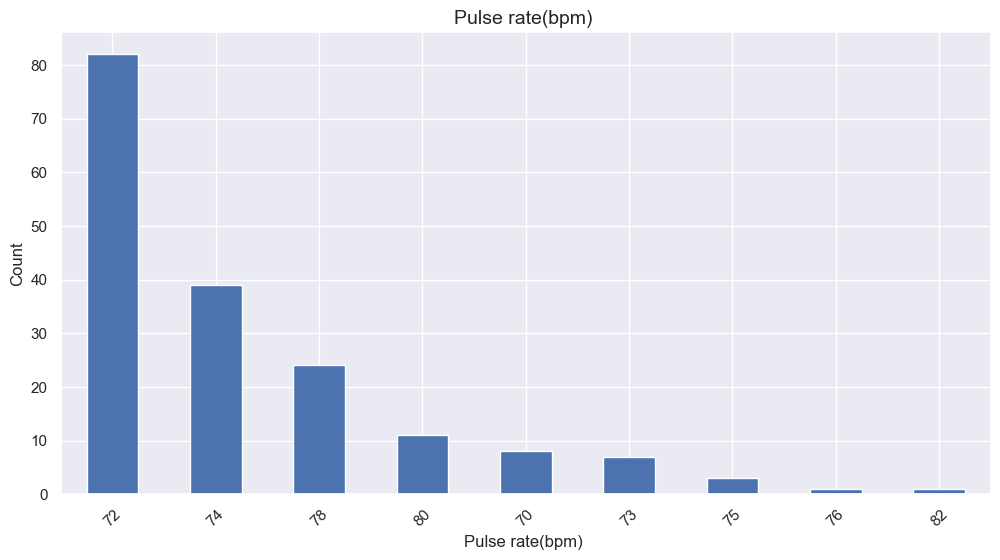

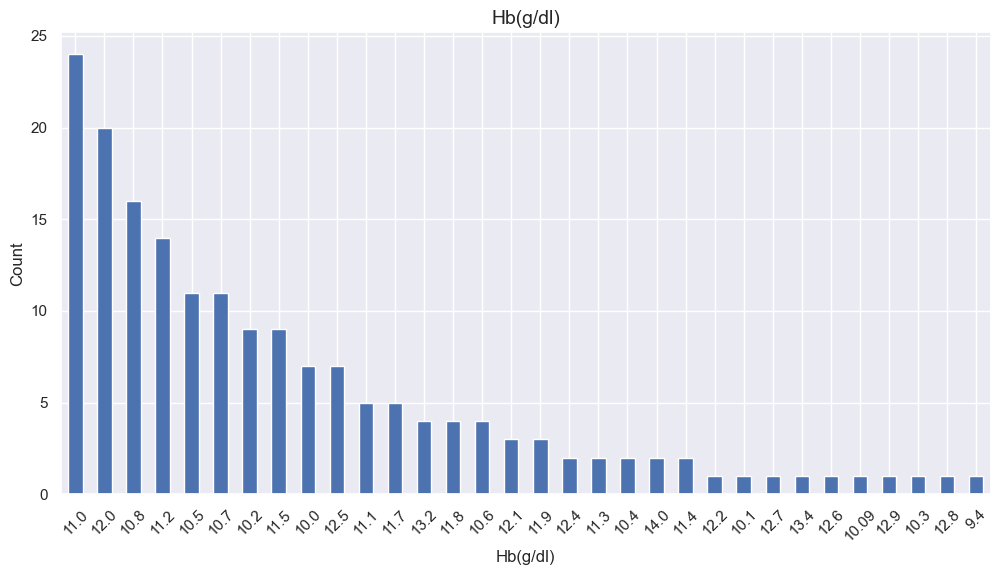

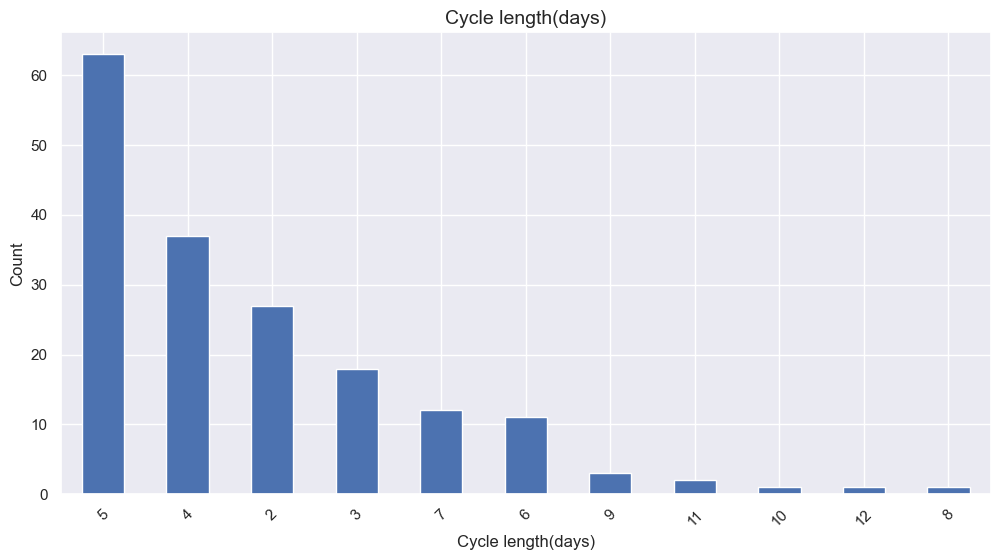

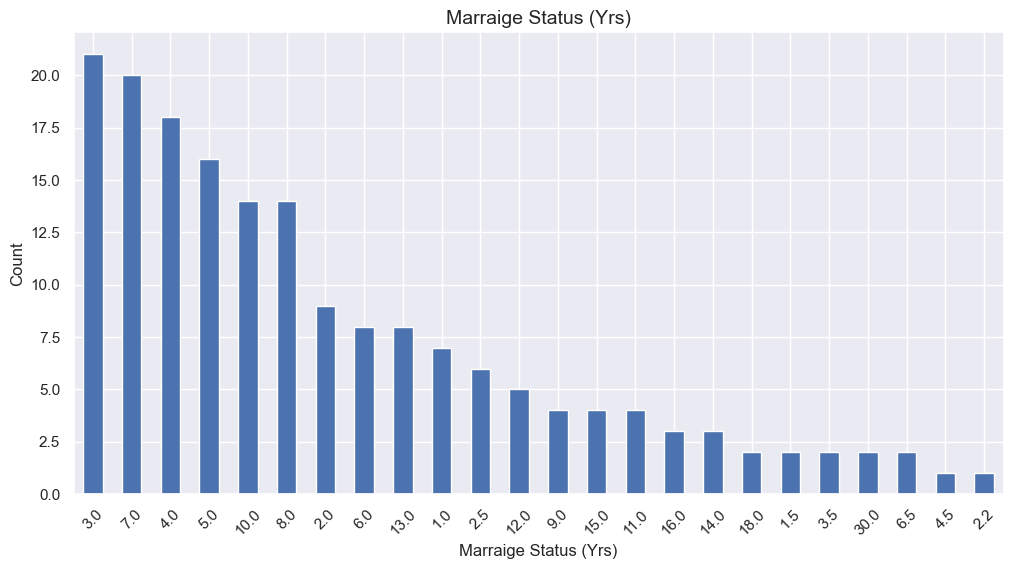

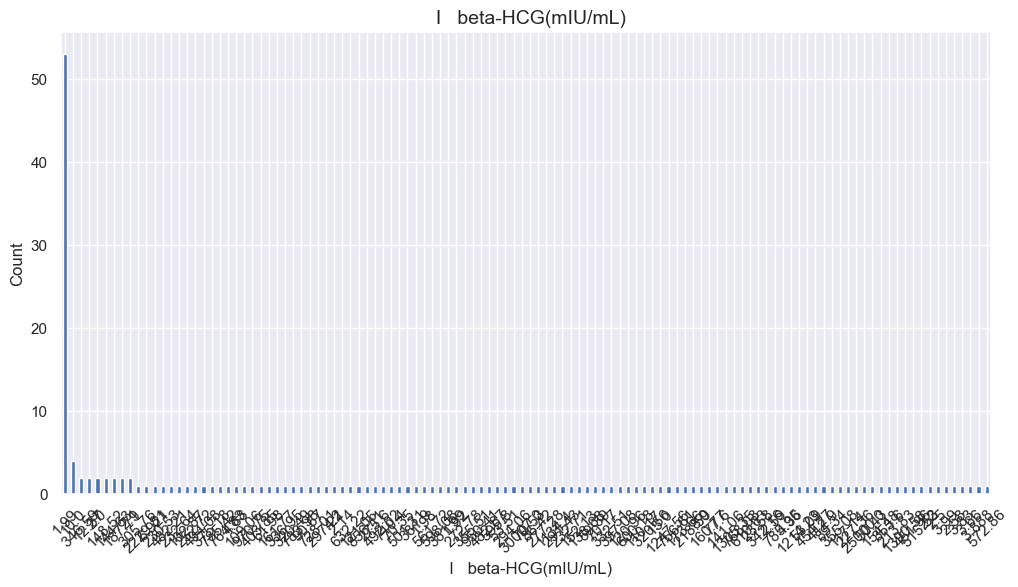

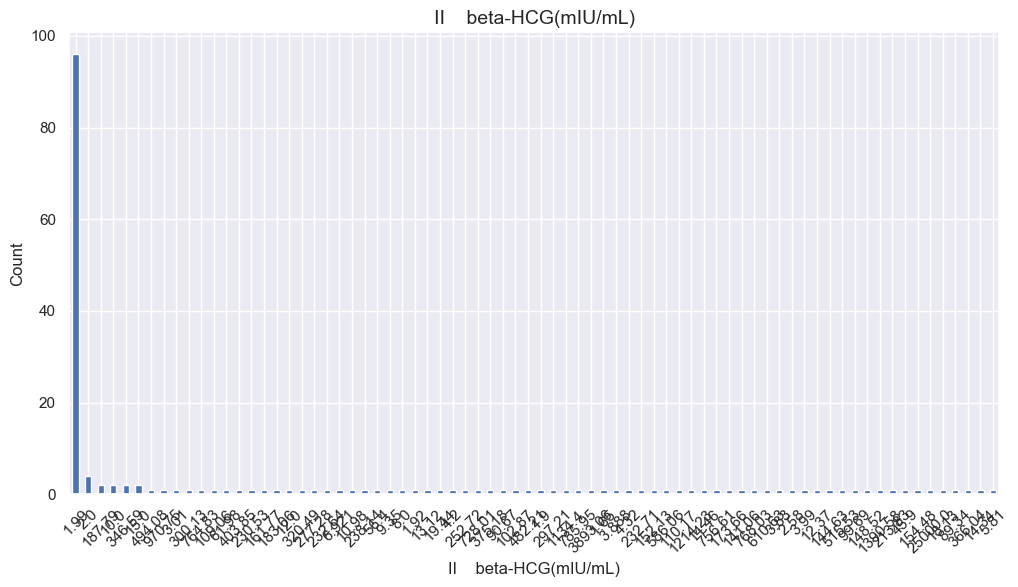

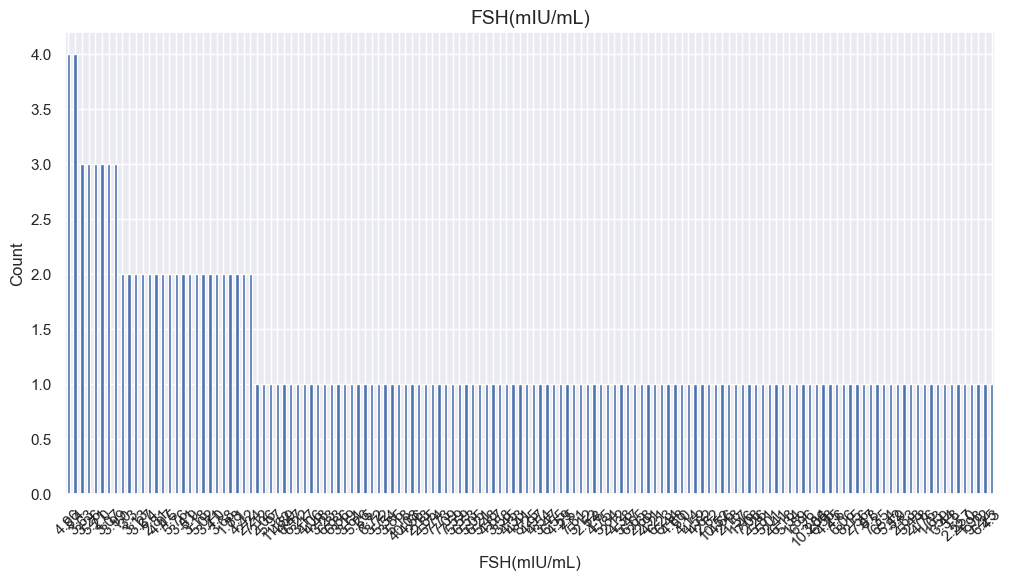

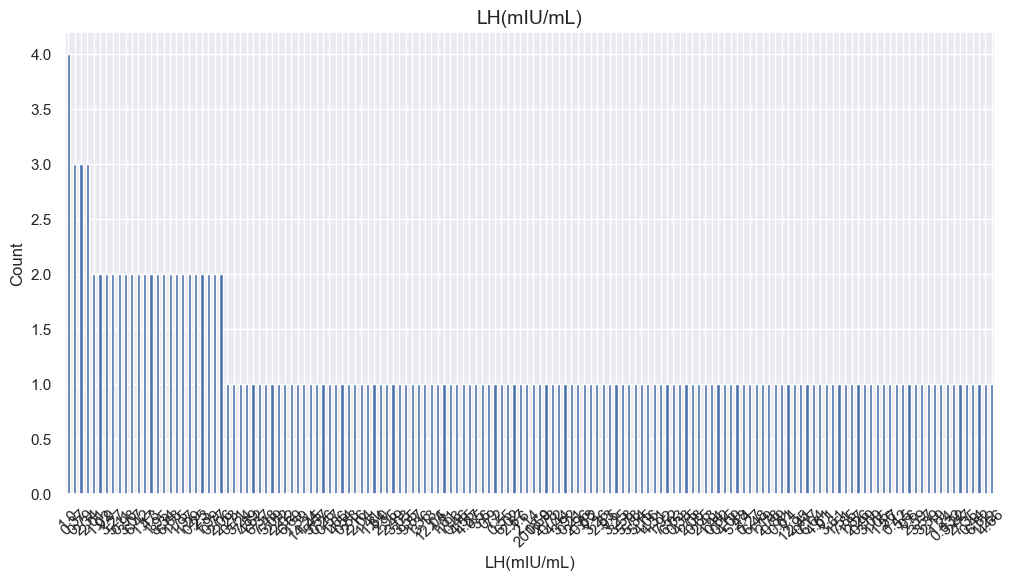

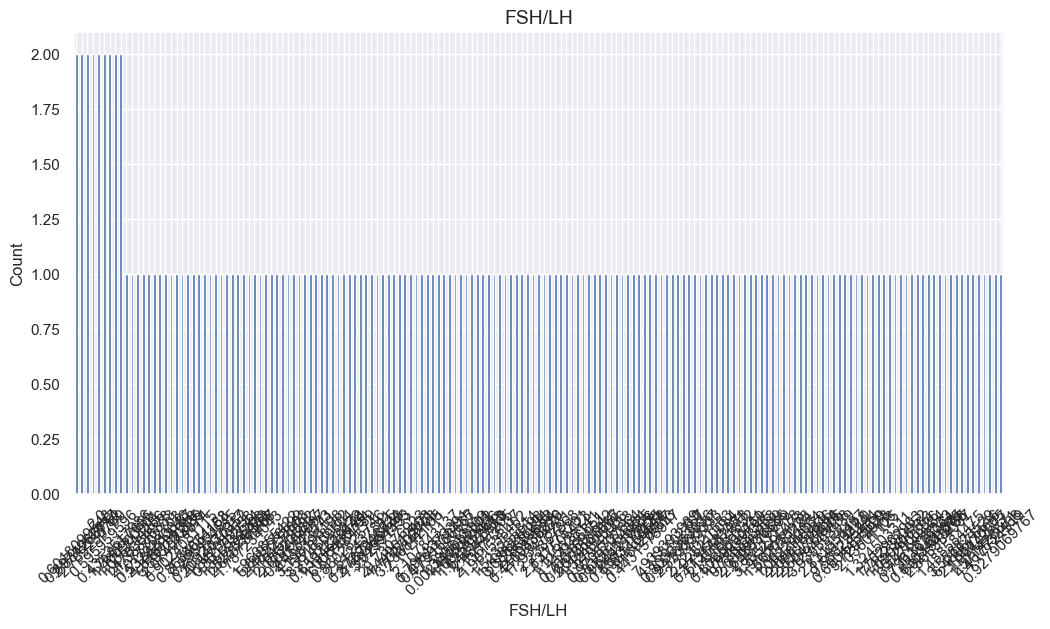

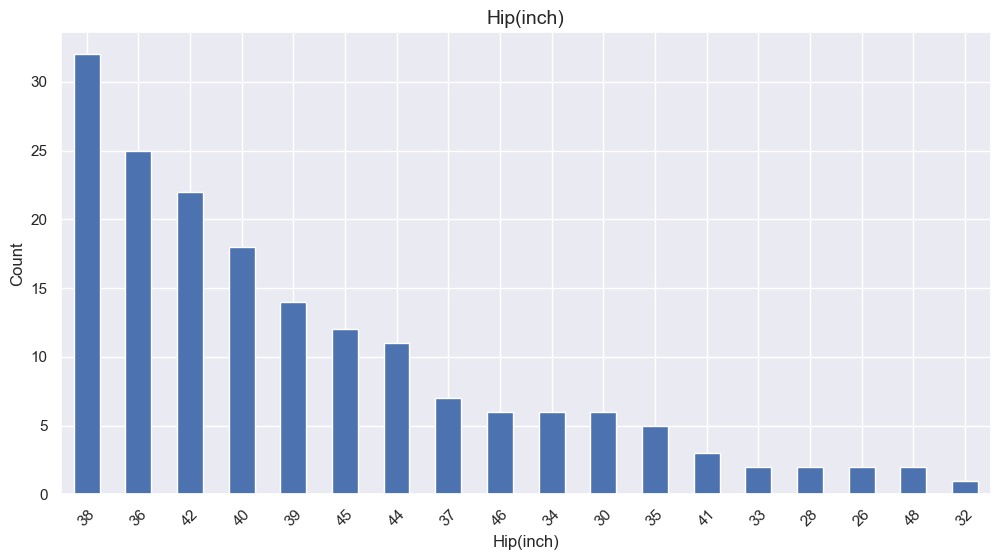

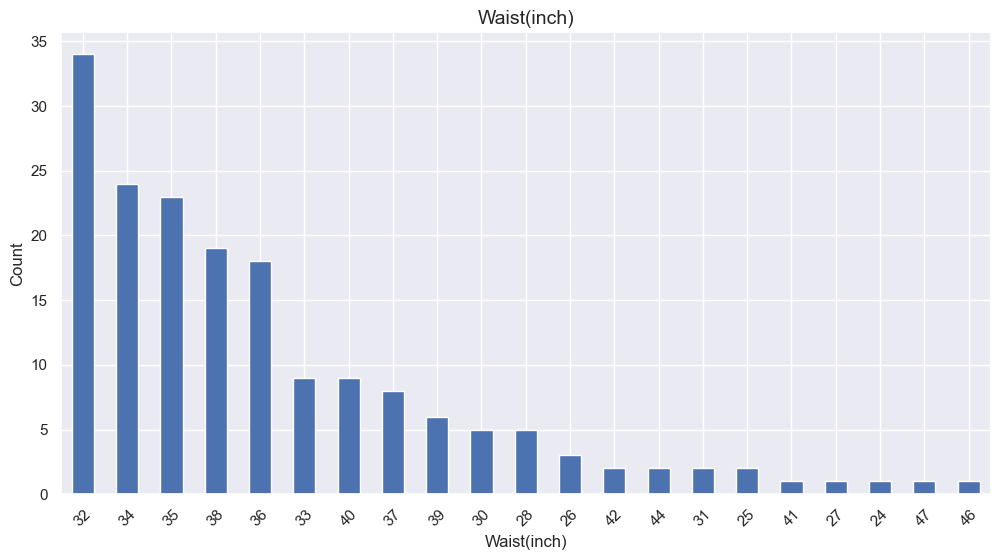

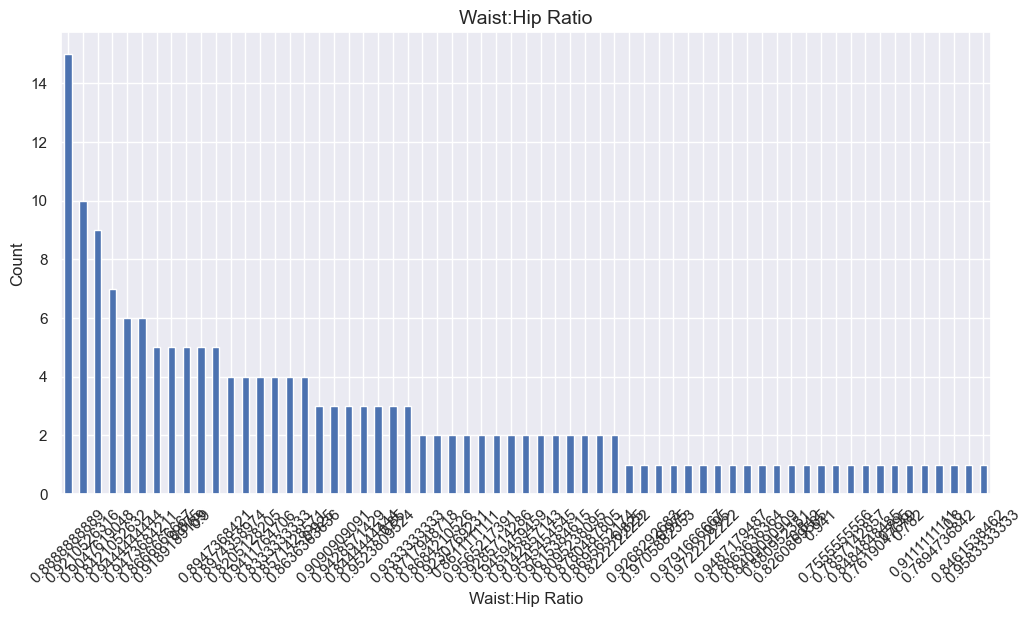

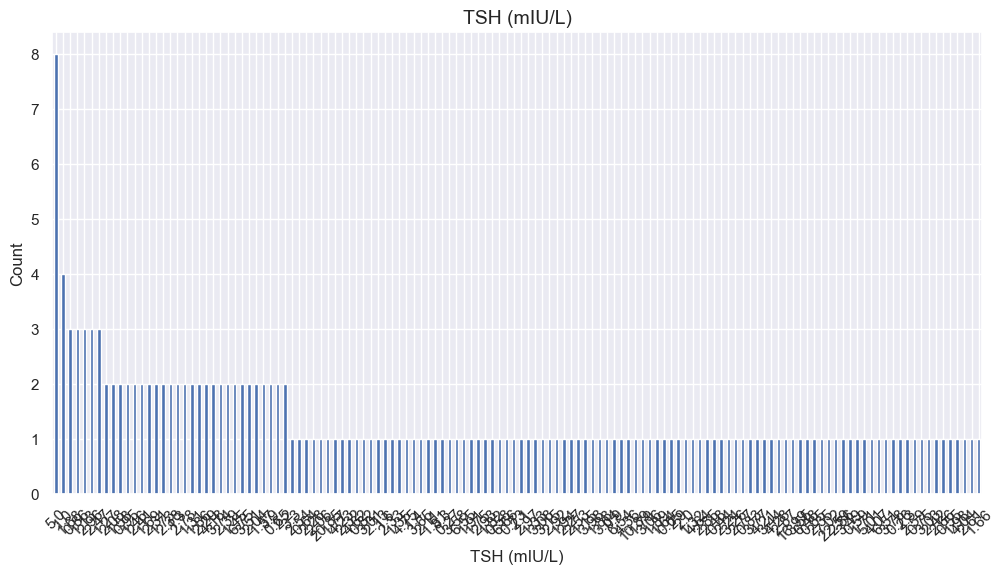

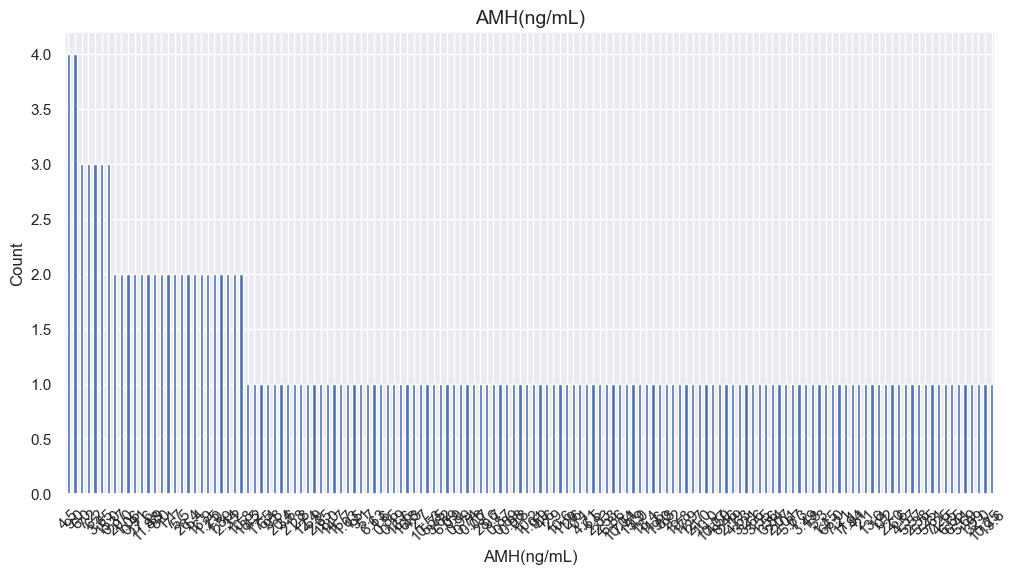

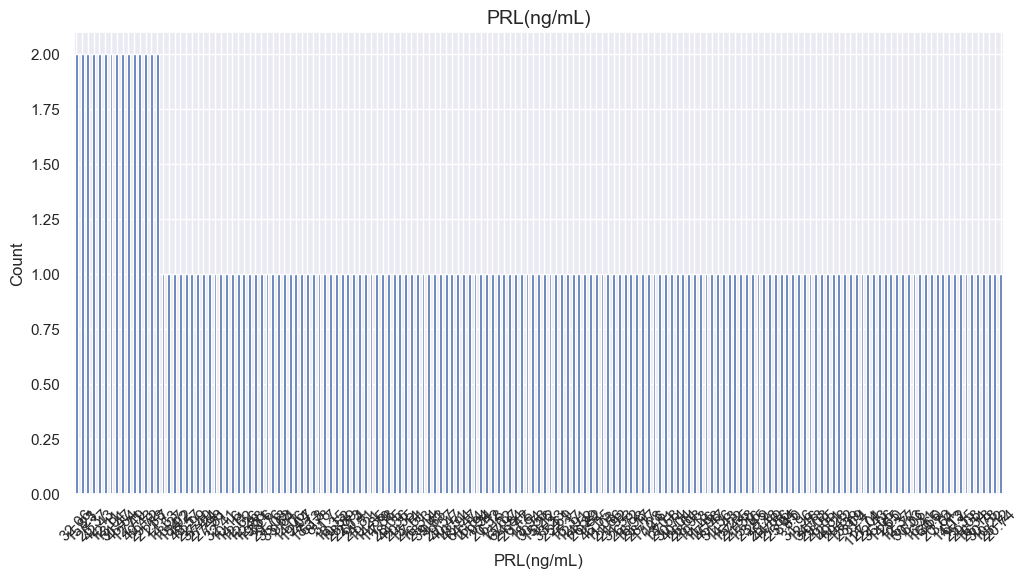

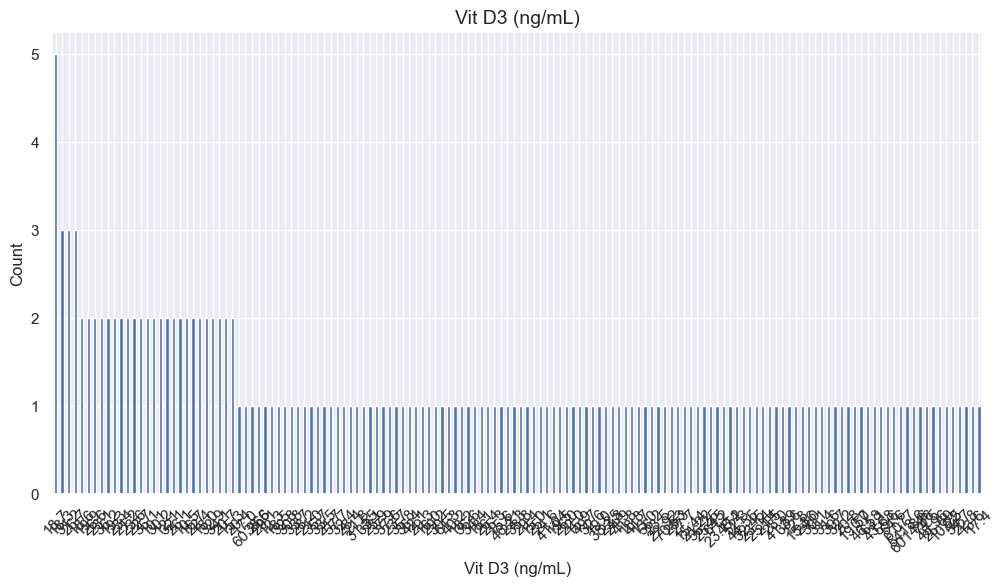

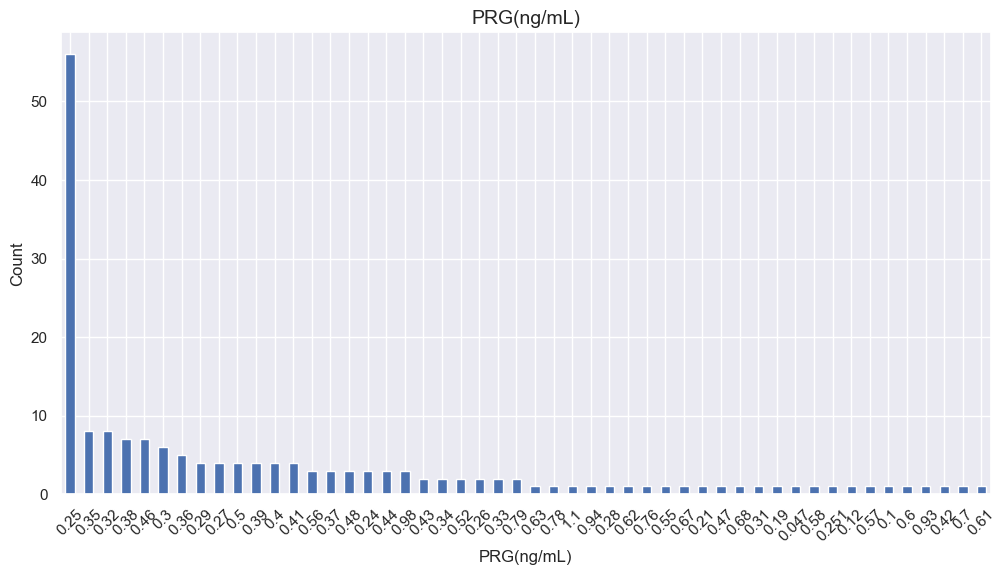

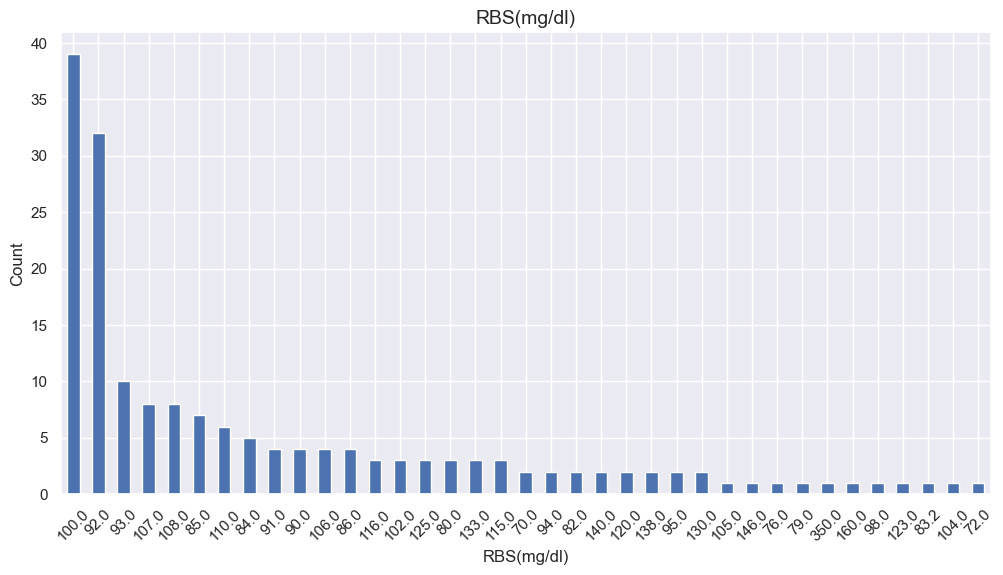

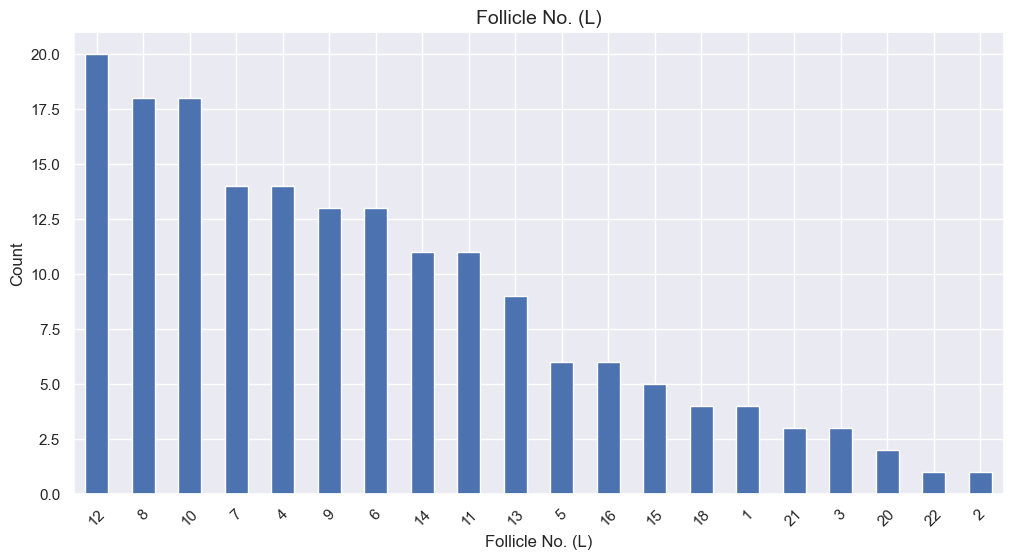

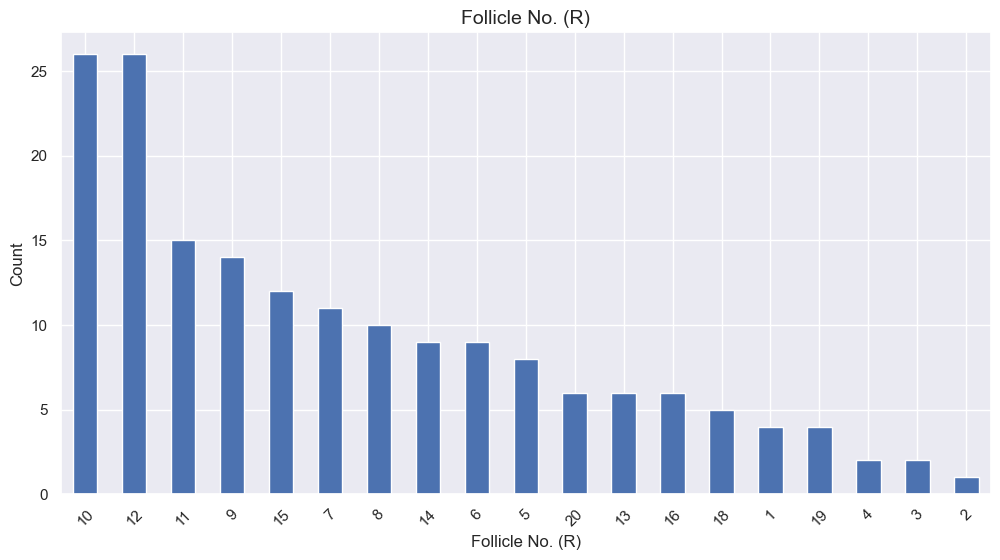

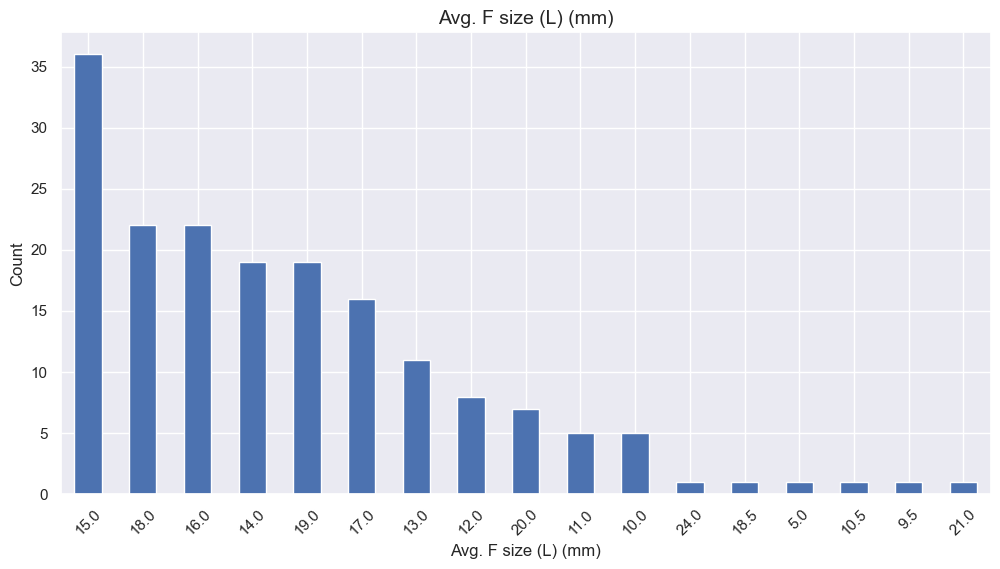

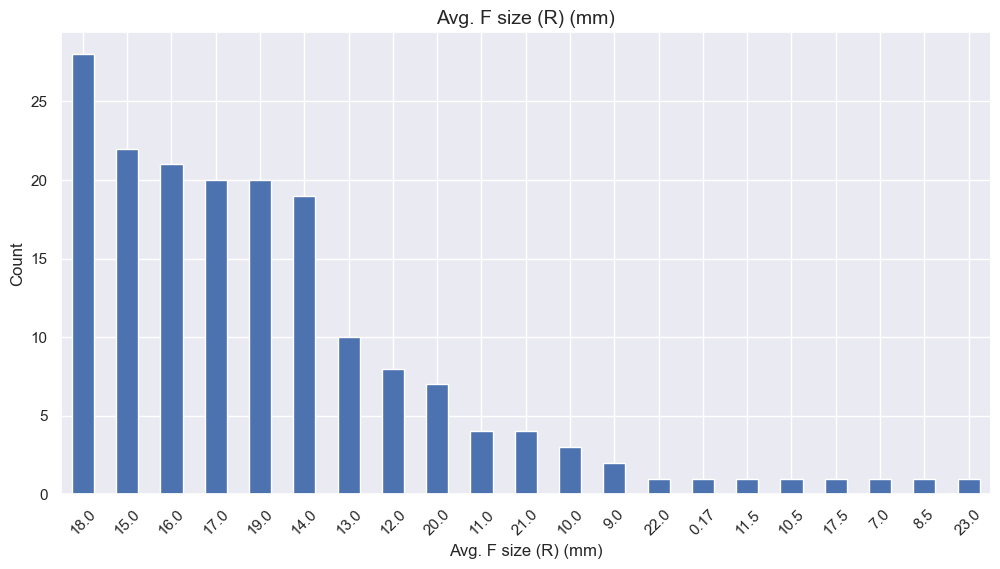

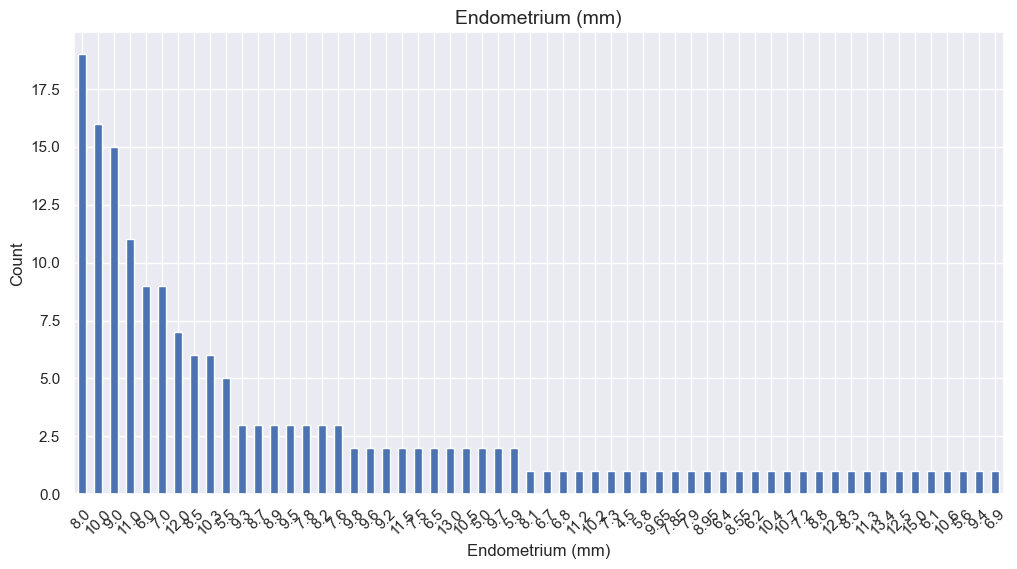

In [72]:
# List of columns to plot bar charts
columns_to_plot =[' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Pulse rate(bpm) ',
 'Hb(g/dl)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 '  I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

# Filter data for PCOS (Y/N) = 1
filtered_data = new_data_cleaned[new_data_cleaned['PCOS (Y/N)'] == 1]

# Iterate over columns to plot bar charts
for col in columns_to_plot:
    # Set the figure size using seaborn
    sns.set(rc={'figure.figsize': (12, 6)})
    
    # Plot the bar chart for the current column
    ax = filtered_data[col].value_counts().plot.bar()
    
    # Set the title of the plot to the current column name
    ax.set_title(col, fontsize=14)
    
    # Set labels for x and y axes
    ax.set_xlabel(col, fontsize=12)  # Adjust font size as needed
    ax.set_ylabel('Count', fontsize=12)  # Adjust font size as needed
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)
    
    # Display the plot
    plt.show()

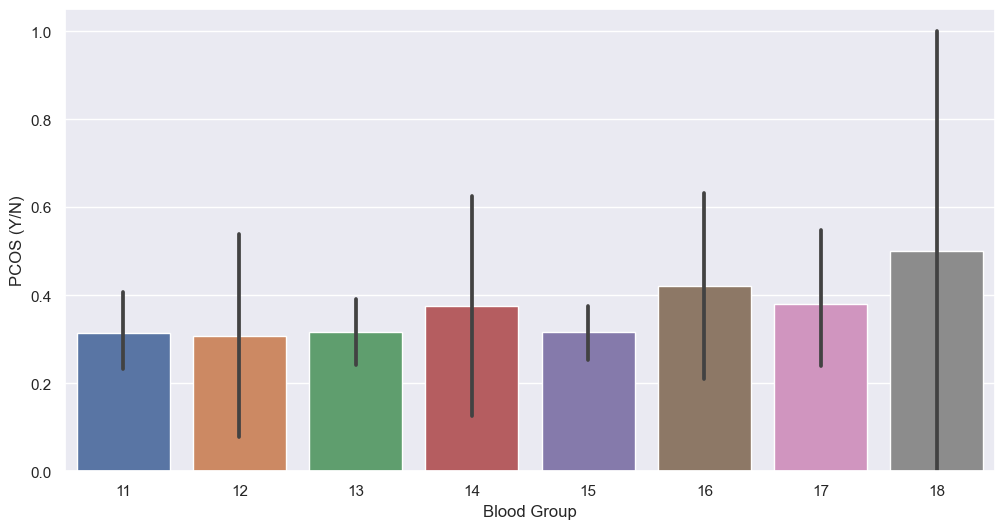

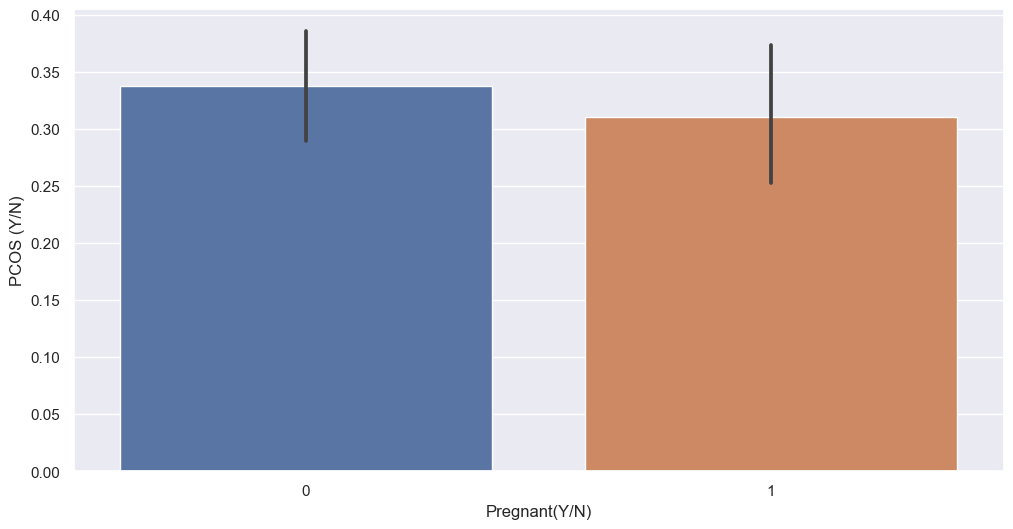

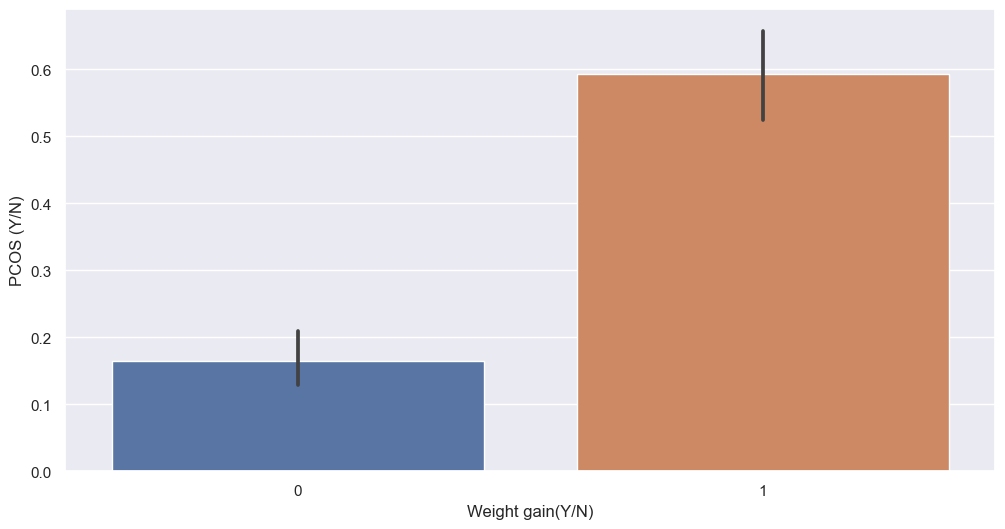

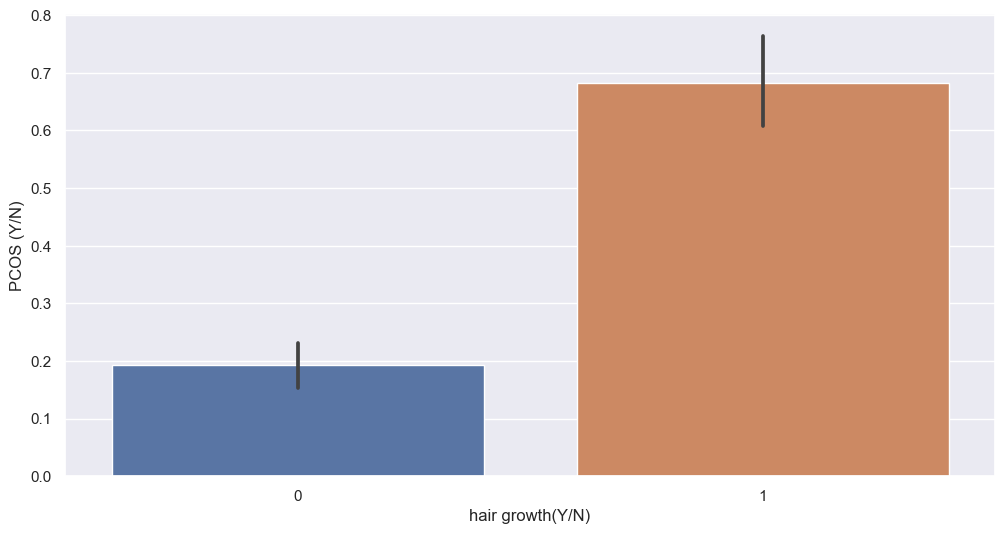

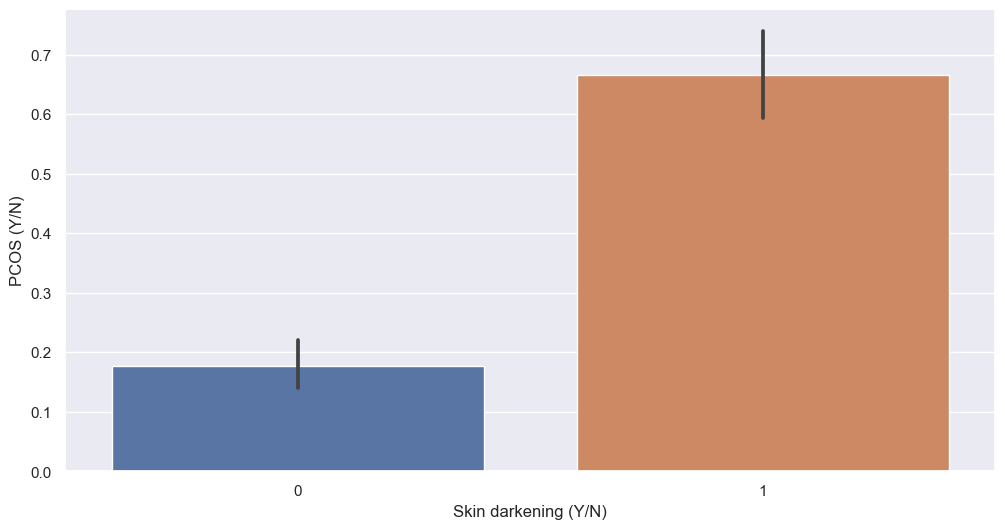

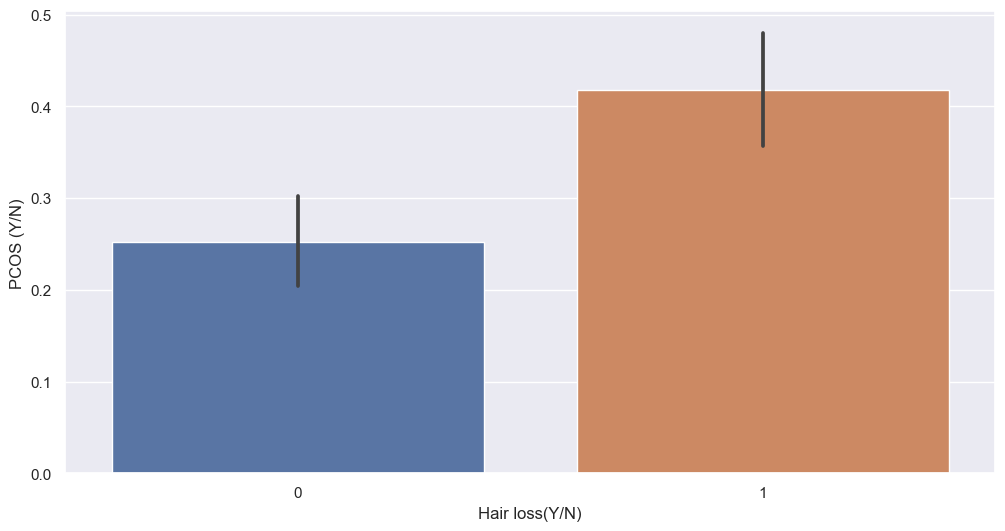

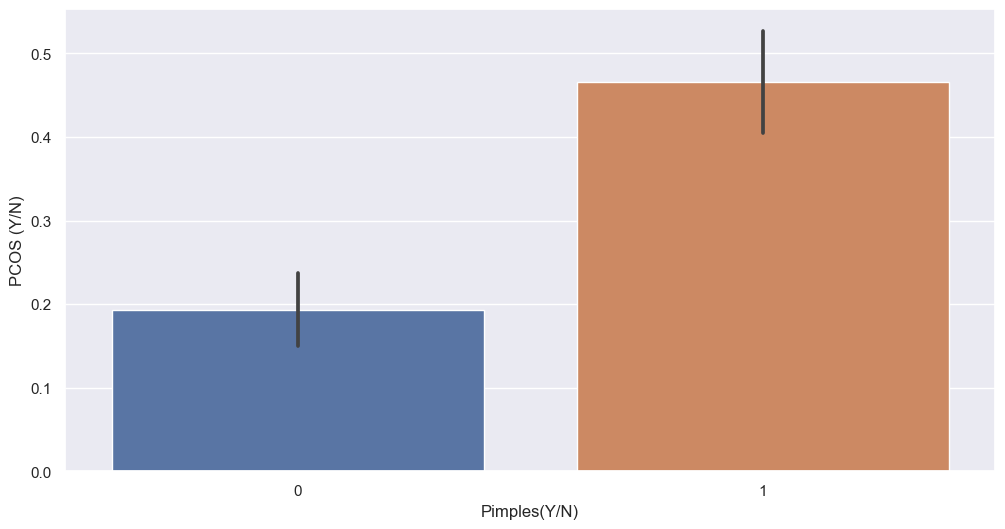

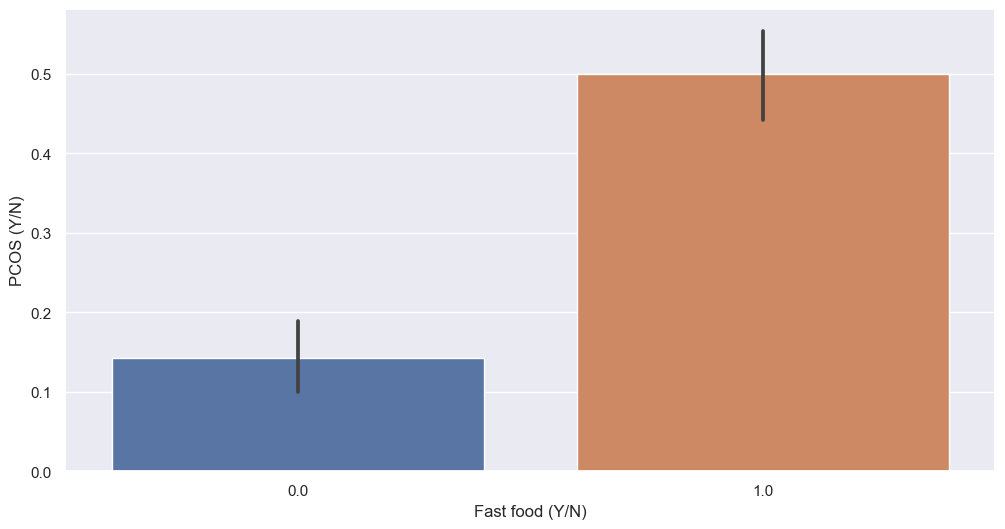

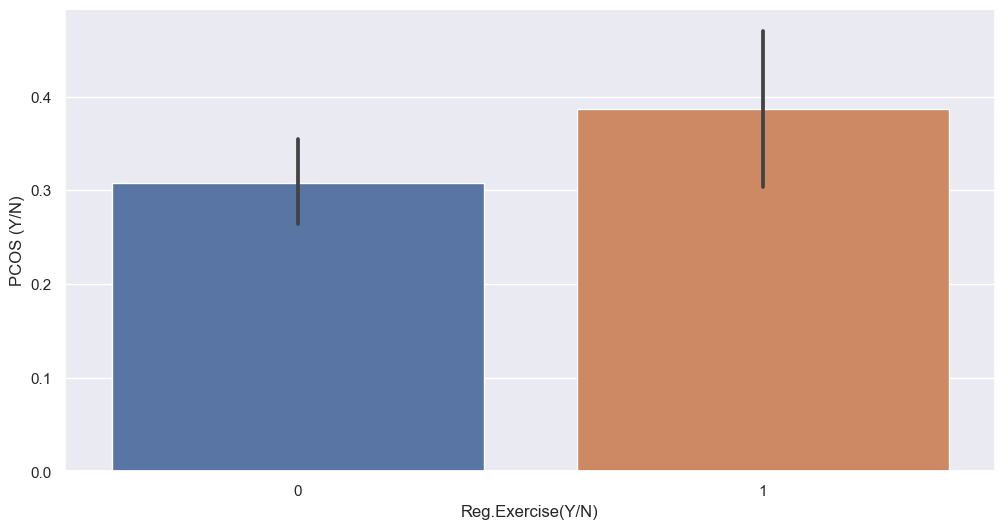

In [73]:
#Plotting barplot for categorical variables
for x in categorical_variables:
    if x != "PCOS (Y/N)":
        sns.barplot(x= x, y = "PCOS (Y/N)", data =  eda)
        plt.show()

In [74]:
# Compute the correlation matrix
corr_matrix = eda.corr()
cmap = sns.diverging_palette(240, 10, as_cmap=True)

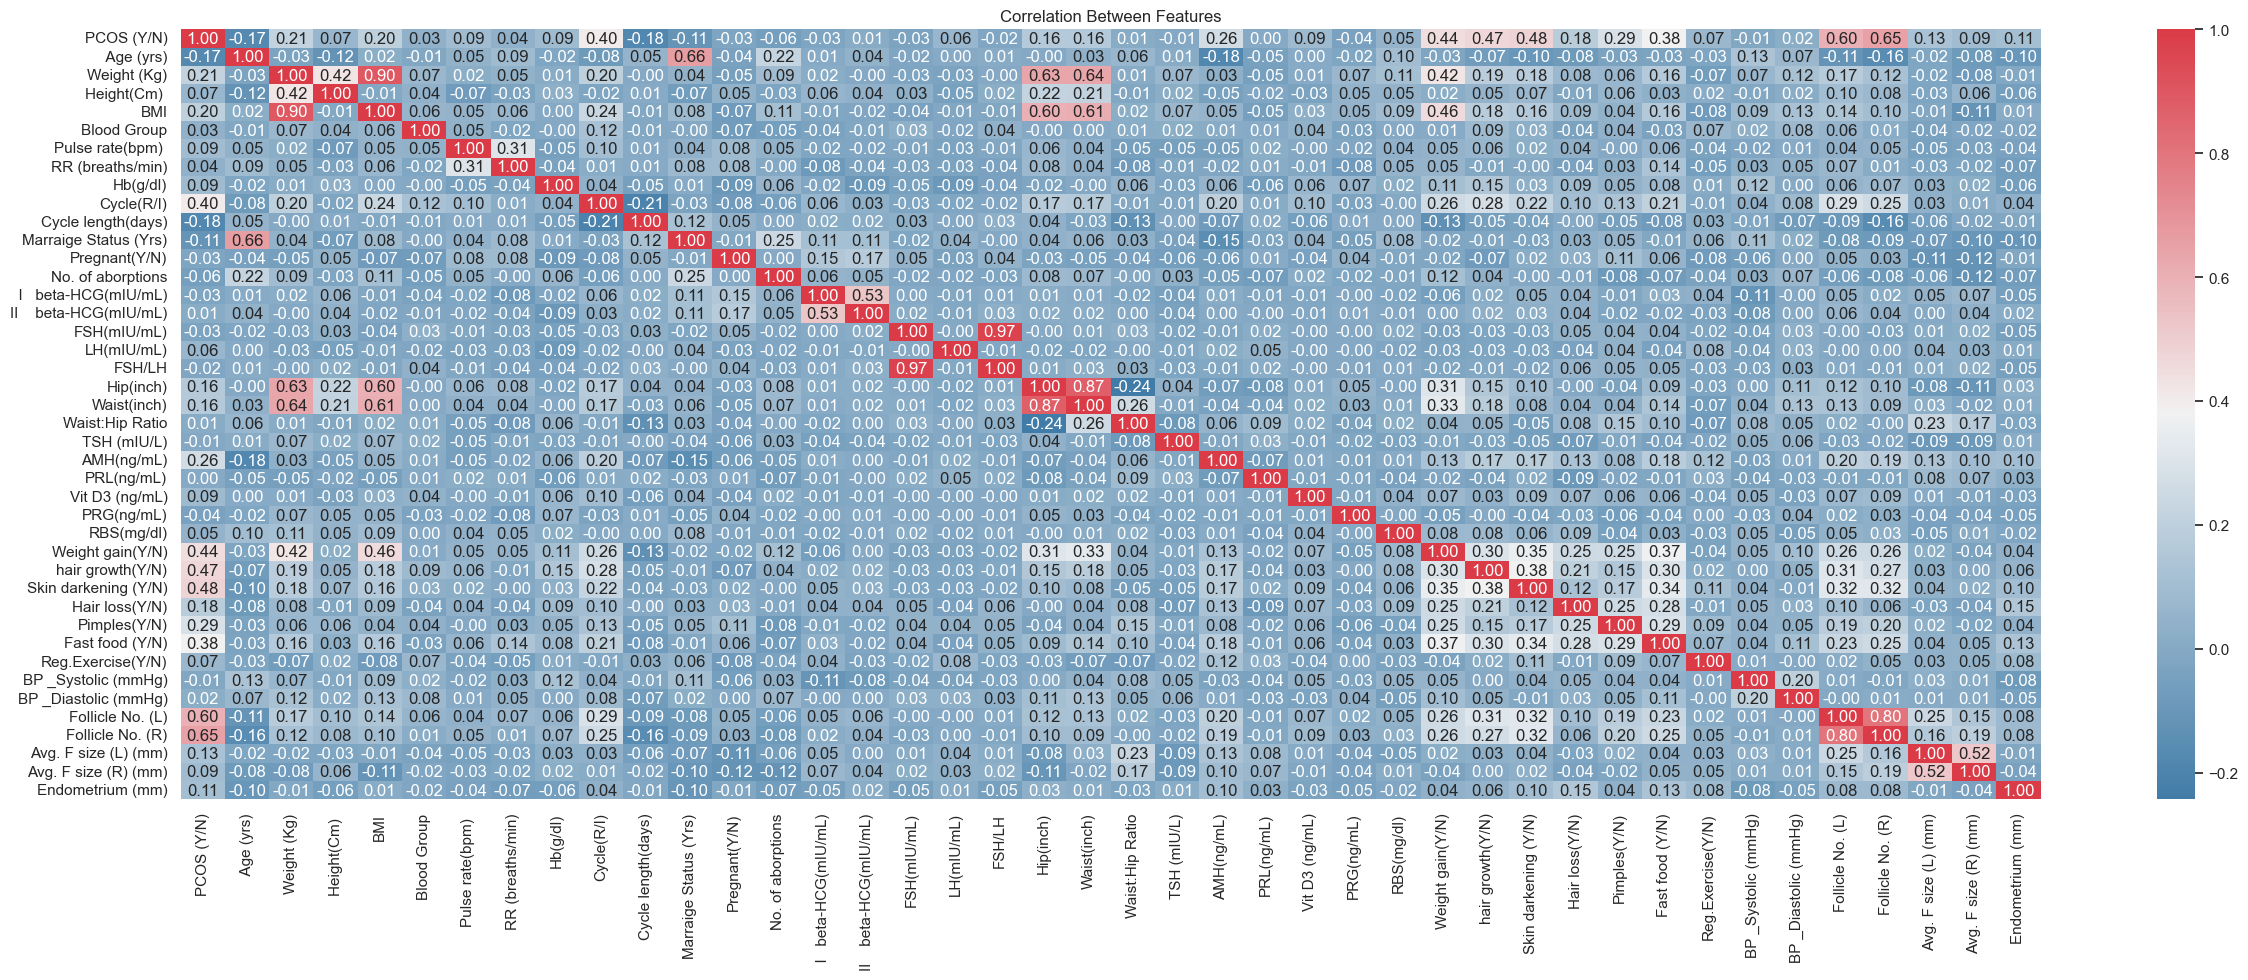

In [75]:
plt.subplots(figsize=(30,10))
# Generate a heatmap plot of the correlation matrix 'corr_matrix' using seaborn
sns.heatmap(corr_matrix,cmap=cmap, annot = True, fmt = ".2f");
plt.title("Correlation Between Features")
plt.show()

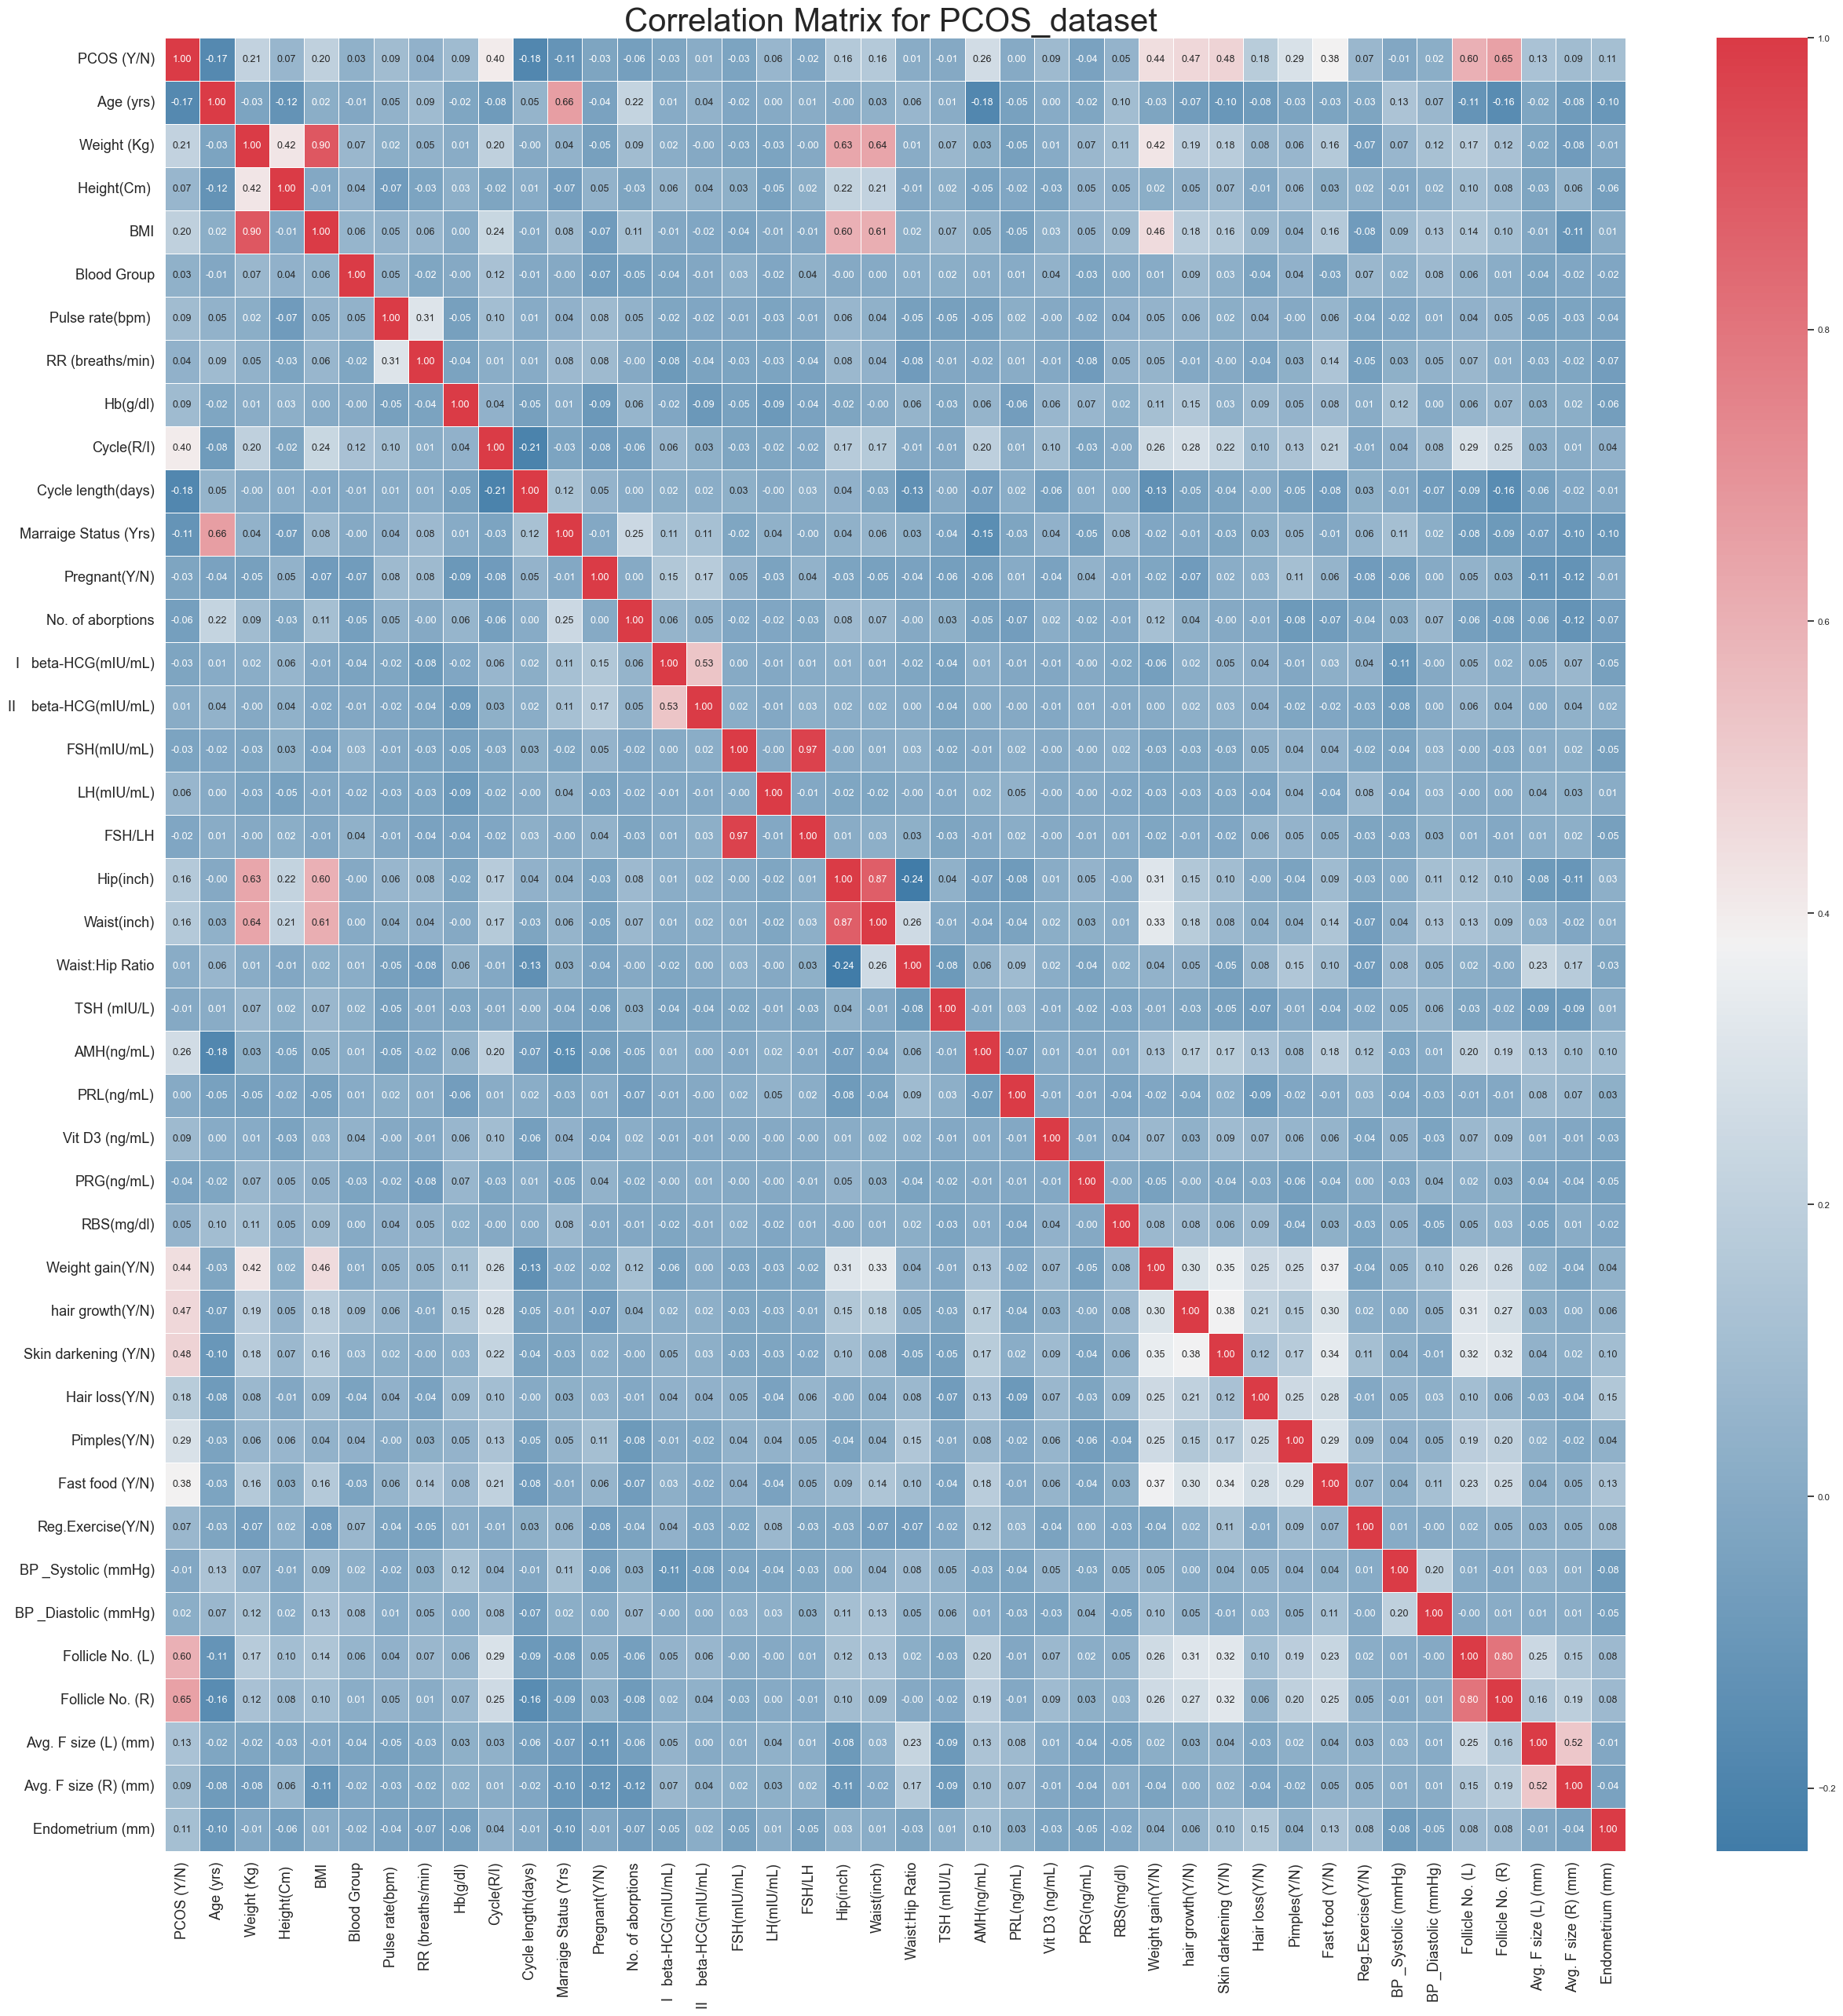

In [76]:
# Set up the plot
sns.set(font_scale=0.75)
fig, ax = plt.subplots(figsize=(30, 30))

# Create a custom colormap related to health
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Create the heatmap plot
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt='.2f', linewidths=.5, ax=ax)

# Customize the plot
ax.set_title('Correlation Matrix for PCOS_dataset ', fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=13)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=13)

# Show the plot
plt.show()

In [77]:
#How all the features correlate with the PCOS 
corr_matrix["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.650929
Follicle No. (L)          0.601208
Skin darkening (Y/N)      0.481323
hair growth(Y/N)          0.466508
Weight gain(Y/N)          0.443093
Cycle(R/I)                0.400668
Fast food (Y/N)           0.380985
Pimples(Y/N)              0.290335
AMH(ng/mL)                0.263974
Weight (Kg)               0.209969
BMI                       0.198703
Hair loss(Y/N)            0.176496
Waist(inch)               0.161922
Hip(inch)                 0.160882
Avg. F size (L) (mm)      0.129997
Endometrium (mm)          0.107639
Avg. F size (R) (mm)      0.094528
Pulse rate(bpm)           0.092699
Hb(g/dl)                  0.087809
Vit D3 (ng/mL)            0.085825
Reg.Exercise(Y/N)         0.071979
Height(Cm)                0.065465
LH(mIU/mL)                0.064074
RBS(mg/dl)                0.049452
RR (breaths/min)          0.038641
Blood Group               0.033701
BP _Diastolic (mmHg)      0.019870
II    beta-HCG(mIU/m

# Positive Correlations:
Features with positive correlations (values closer to 1) tend to increase as the likelihood of having PCOS increases:
- Follicle No. (R) and Follicle No. (L): The number of follicles in the right and left ovaries.
- Skin darkening (Y/N): Skin darkening is positively associated with PCOS.
- Hair growth (Y/N): Increased hair growth is linked to PCOS.
- Weight gain (Y/N): Weight gain is positively correlated with PCOS.
- Cycle (R/I): Cycle irregularity is associated with PCOS.
- Fast food (Y/N): Consumption of fast food shows a positive correlation with PCOS.

# Negative Correlations:
Features with negative correlations (values closer to -1) tend to decrease as the likelihood of having PCOS increases:
- Age (yrs): Older age is negatively correlated with PCOS.
- Cycle length (days): Longer cycle length is associated with a lower likelihood of PCOS.
- No. of abortions: A history of abortions is negatively correlated with PCOS.
- Marriage Status (Yrs): Longer marriage duration shows a negative correlation with PCOS.

# Weak Correlations:
Some features have weak correlations with PCOS:
- Blood Group, Pulse rate (bpm), Hb (g/dl), Vit D3 (ng/mL), etc.

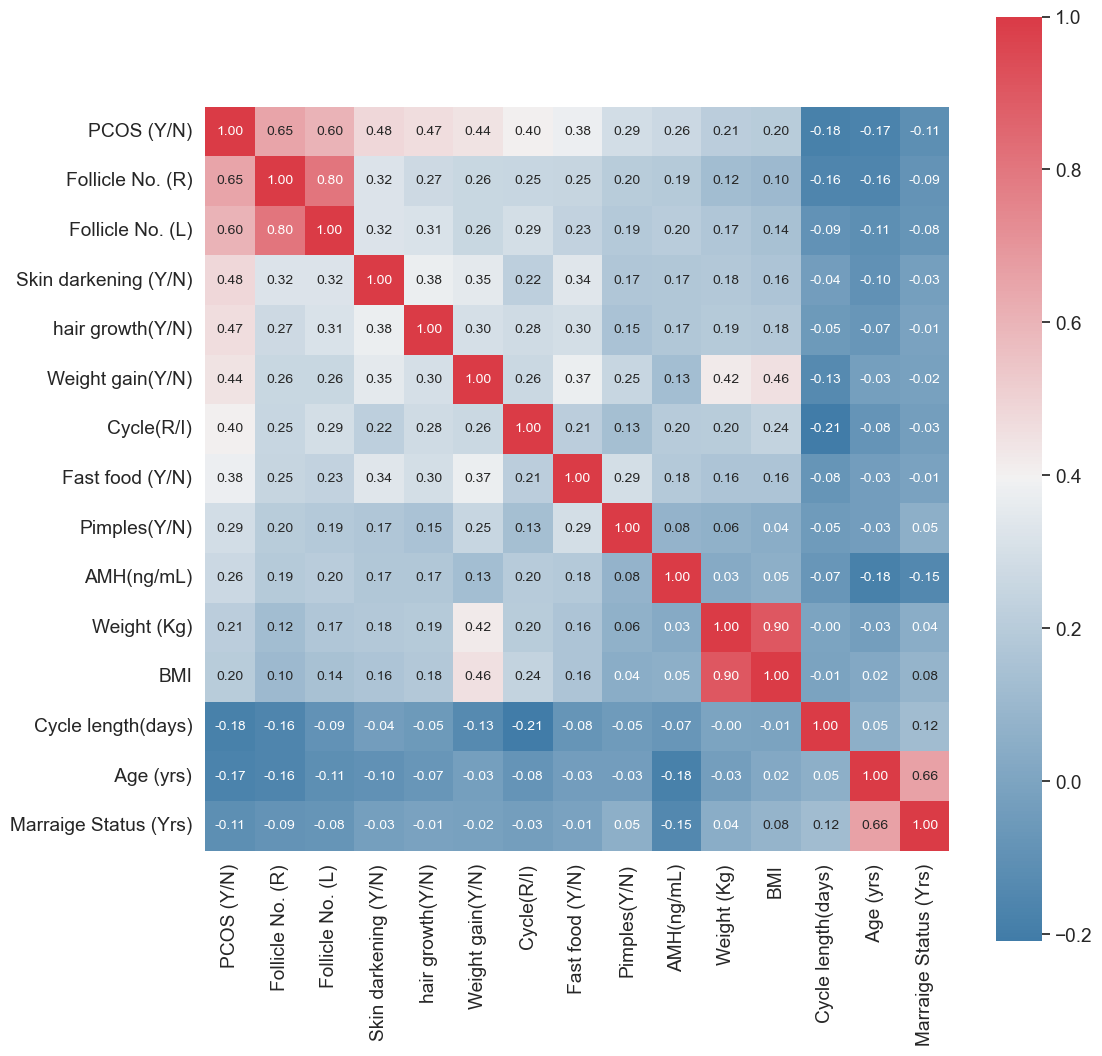

In [83]:
#Having a look at features bearing significant correlation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corr_matrix.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corr_matrix.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(eda[cols].values.T)
sns.set(font_scale=1.25)
# Create a custom colormap related to health
cmap = sns.diverging_palette(240, 10, as_cmap=True)
hm = sns.heatmap(cm, cbar=True,cmap=cmap, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Feature Selection Based on Correlation Analysis

In [78]:
corr_features=eda.corrwith(eda["PCOS (Y/N)"],method='pearson').abs().sort_values(ascending=True)
corr_features=corr_features[corr_features>0.4].index
corr_features

Index(['Cycle(R/I)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)',
       'PCOS (Y/N)'],
      dtype='object')

#### sorts them in ascending order, and then selects only those features with a correlation coefficient greater than 0.4. These selected features are stored in the corr_features index.

In [79]:
eda_f=eda[corr_features]
eda_f.head()

Cycle(R/I)  Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  \
0           0                 0                 0                     0   
1           0                 0                 0                     0   
2           0                 0                 0                     0   
3           0                 0                 0                     0   
4           0                 0                 0                     0   

   Follicle No. (L)  Follicle No. (R)  PCOS (Y/N)  
0                 3                 3           0  
1                 3                 5           0  
2                13                15           1  
3                 2                 2           0  
4                 3                 4           0

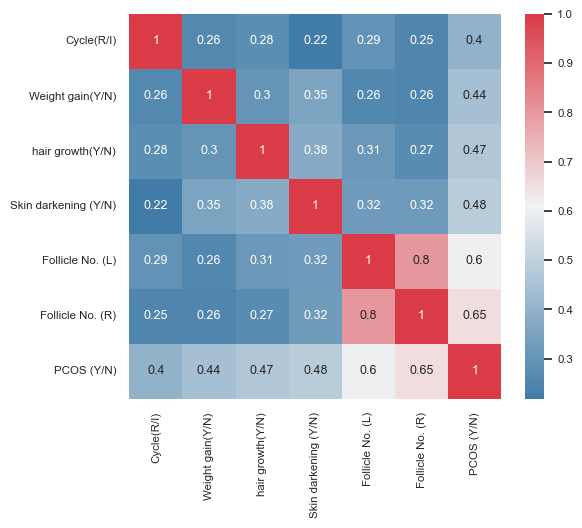

In [80]:
plt.figure(figsize=(6,5))
sns.heatmap(eda_f.corr(), cmap=cmap, annot=True)
plt.show()

In [ ]:
# Ignore all warnings
warnings.filterwarnings("ignore")

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


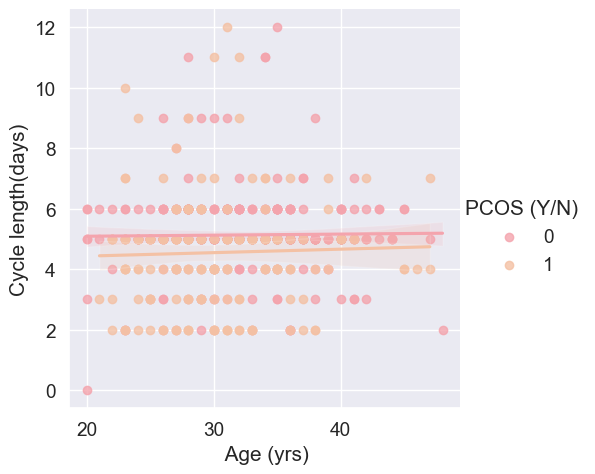

In [85]:
color = ['#F4A4AD', '#F4C1A4', '#A4C1F4', '#A4F4C9', '#C1A4F4', '#F4A4C1']
# Assuming data is your DataFrame and the column names are as specified
fig = sns.lmplot(data=eda, x=" Age (yrs)", y="Cycle length(days)", hue="PCOS (Y/N)", palette=color)
plt.show(fig)

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


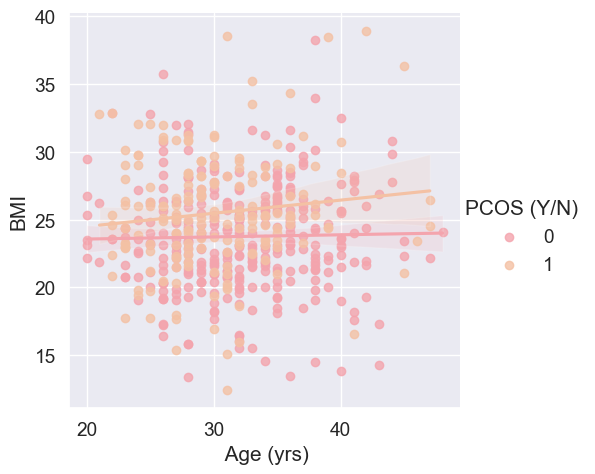

In [86]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data =eda ,x=" Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


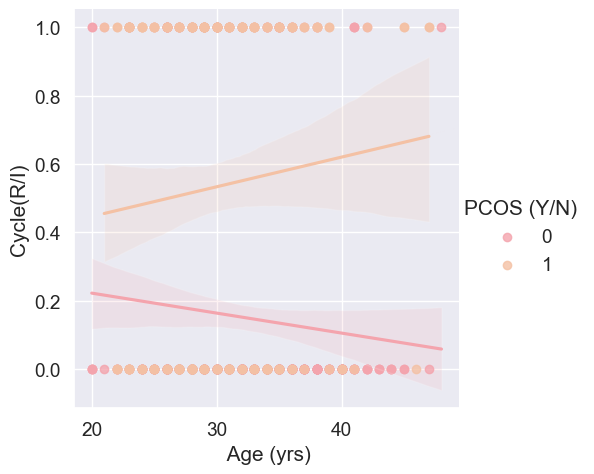

In [87]:
# cycle IR wrt age 
sns.lmplot(data =eda,x=" Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.show()

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


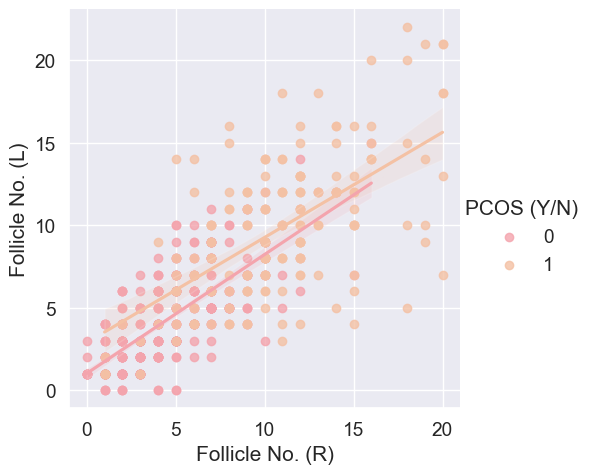

In [88]:
# Distribution of follicles in both ovaries. 
sns.lmplot(data =eda,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()

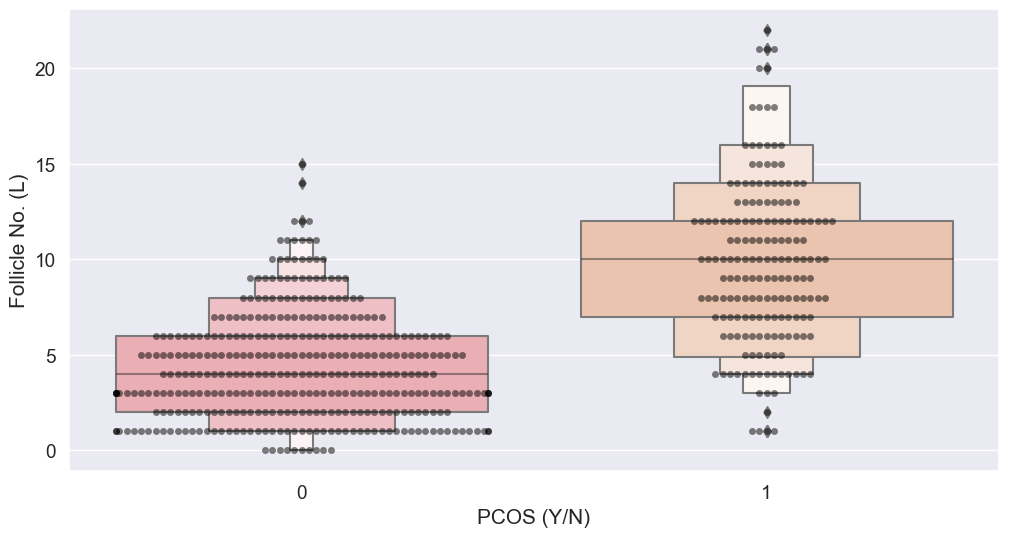

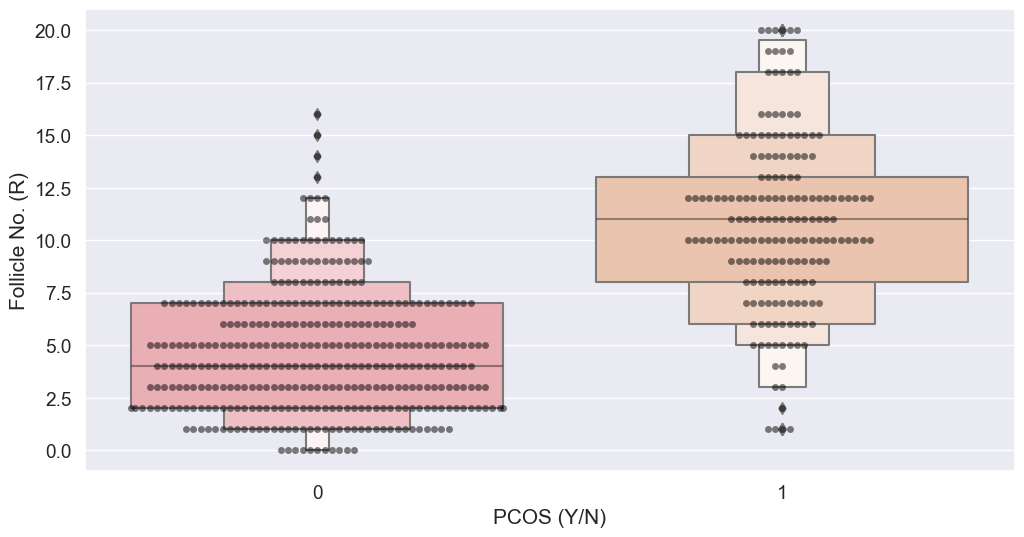

In [89]:
features = ["Follicle No. (L)","Follicle No. (R)"]
# Loop through each feature and create swarmplot and boxenplot for each feature based on "PCOS (Y/N)" status
for i in features:
    sns.swarmplot(x=eda["PCOS (Y/N)"], y=eda[i], color="black", alpha=0.5 )
    sns.boxenplot(x=eda["PCOS (Y/N)"], y=eda[i], palette=color)
    plt.show()


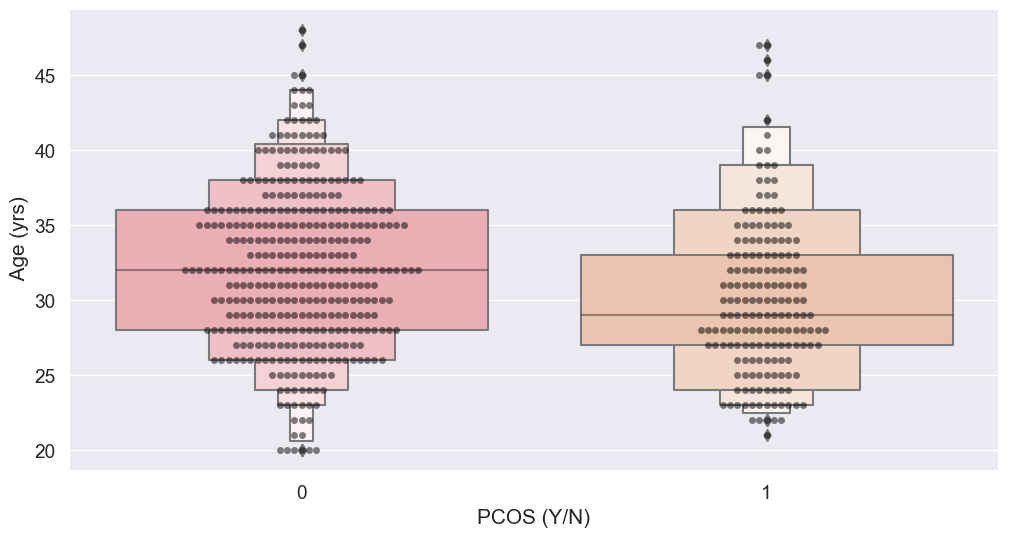

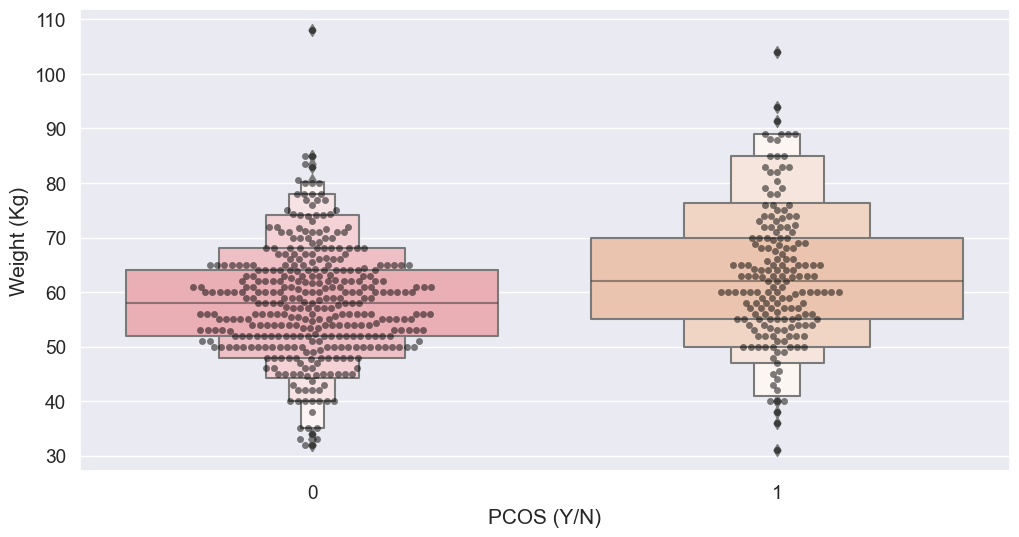

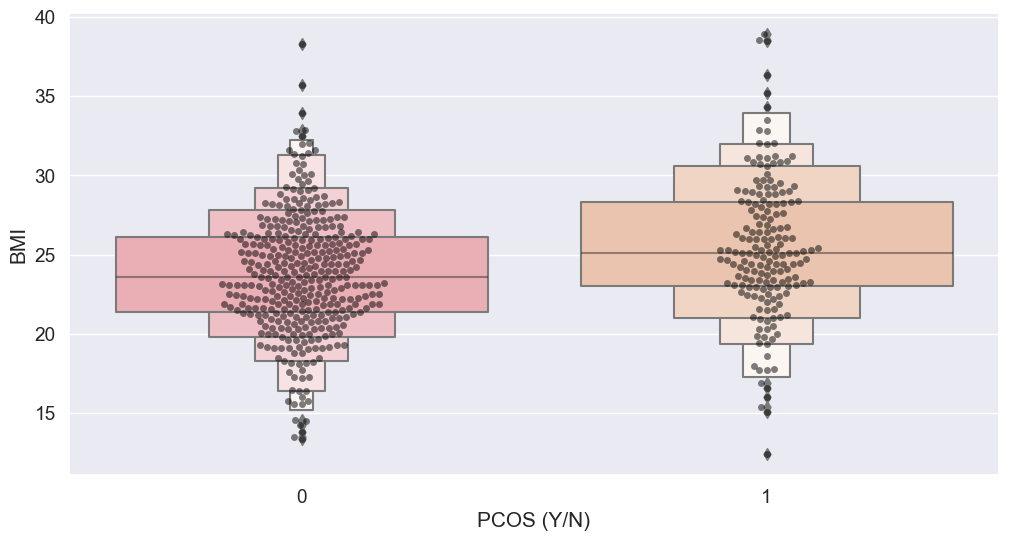

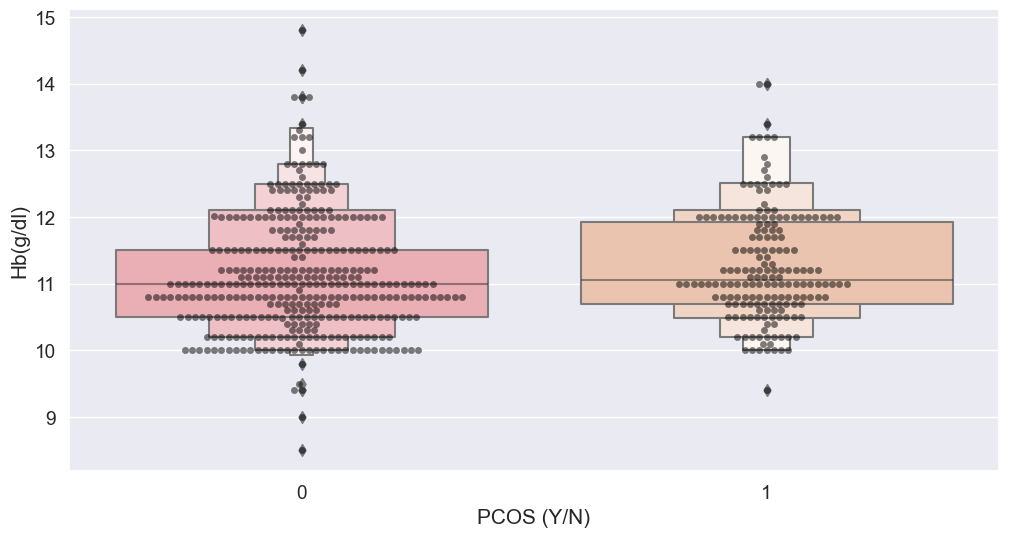

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


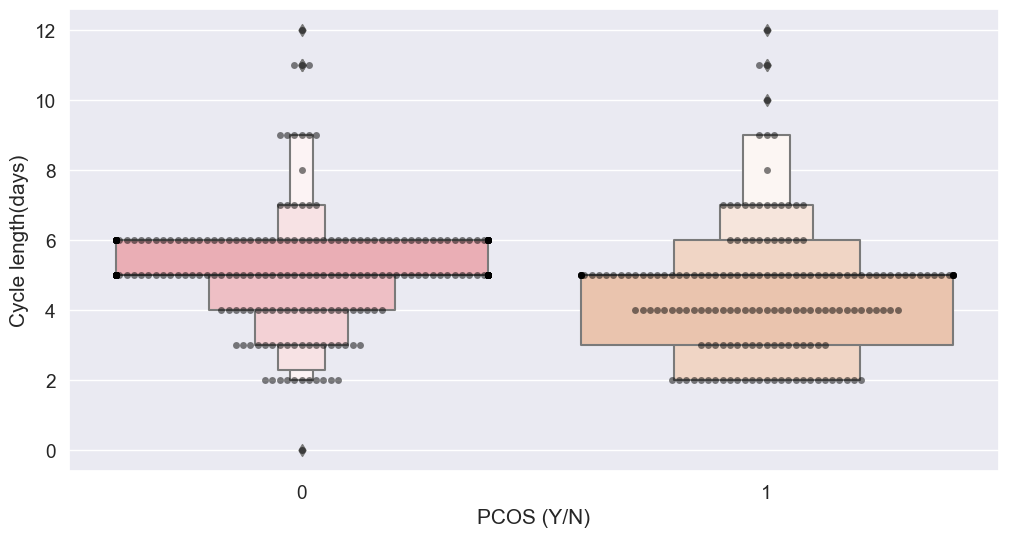

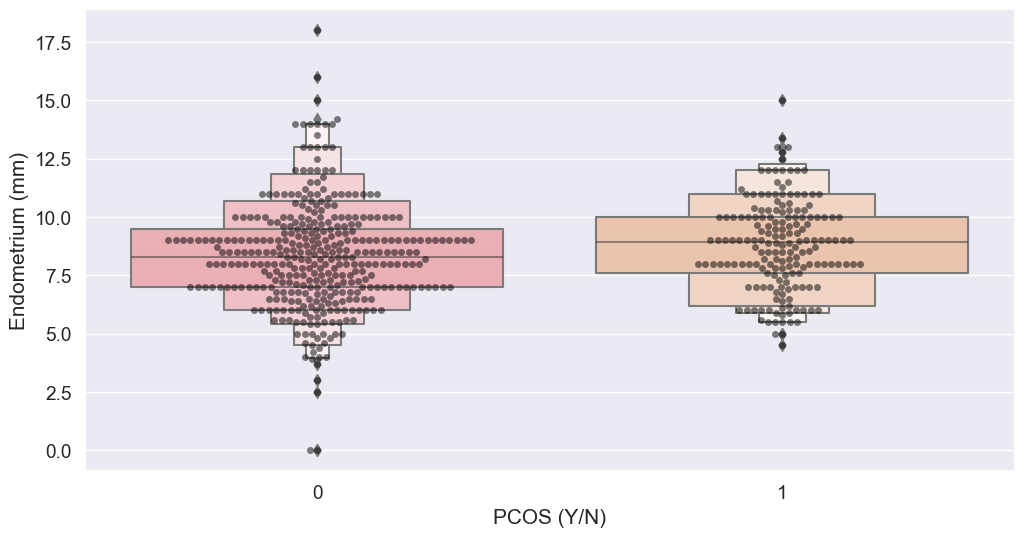

In [90]:
features = [" Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
# Loop through each feature and create swarmplot and boxenplot for each feature based on "PCOS (Y/N)" status
for i in features:
for i in features:
    sns.swarmplot(x=eda["PCOS (Y/N)"], y=eda[i], color="black", alpha=0.5 )
    sns.boxenplot(x=eda["PCOS (Y/N)"], y=eda[i], palette=color)
    plt.show()

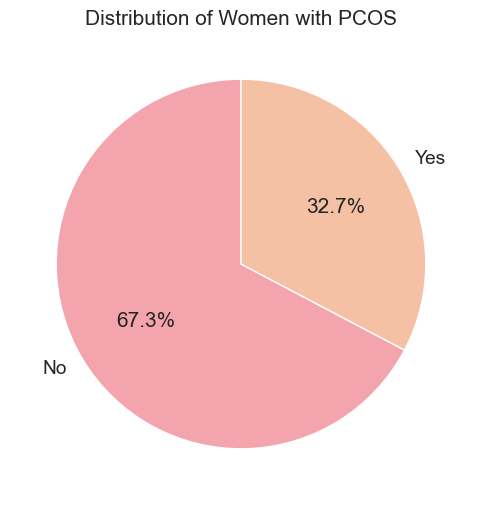

In [91]:
repar = eda['PCOS (Y/N)'].value_counts()
# Create a pie chart to show the distribution of PCOS (Yes/No) values
fig, ax = plt.subplots()
ax.pie(repar, labels=['No', 'Yes'], colors=color, autopct='%1.1f%%', startangle=90)
ax.set_title("Distribution of Women with PCOS")  

plt.show()

# Modelling 

## Train and evaluate various machine learning models

In [97]:
#Assiging the features (X)and target(y)


X = eda.drop(['PCOS (Y/N)'], axis=1)

y = eda['PCOS (Y/N)']

In [98]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [118]:
#  function train_models to train multiple machine learning models on the training data and returns the trained models
def train_models(classifiers, X_train, y_train, X_test, y_test):
    trained_models = {}
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        trained_models[name] = clf
    return trained_models

In [119]:
# function evaluate_models to evaluate the trained models on the testing data and returns the evaluation results (accuracy scores).
def evaluate_models(trained_models, X_test, y_test):
    results = {}
    for name, clf in trained_models.items():
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred) * 100
        results[name] = accuracy
    return results

In [120]:
# function print_metrics to print various evaluation metrics such as confusion matrix, specificity, sensitivity, and classification report
def print_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (fn + tp)
    print(f"True Negatives: {tn}, False Positives: {fp}")
    print(f"False Negatives: {fn}, True Positives: {tp}")
    print(f"Specificity: {specificity:.2f}, Sensitivity: {sensitivity:.2f}")
    print(classification_report(y_true, y_pred))

In [158]:
# Initialize classifiers
classifiers = {
     "Random Forest": RandomForestClassifier(n_estimators=1000),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
 "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM (Linear)": SVC(kernel='linear'),
    "SVM (RBF)": SVC(kernel='rbf'),
    "SVM (Polynomial)": SVC(kernel='poly'),
    "Neural Network": MLPClassifier(),
    "Gaussian Process": GaussianProcessClassifier(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Extra Trees": ExtraTreesClassifier(n_estimators=1000),
    "Bagging": BaggingClassifier()
}

In [159]:
# Train models
trained_models = train_models(classifiers, X_train, y_train, X_test, y_test)

In [160]:
# Evaluate models
results = evaluate_models(trained_models, X_test, y_test)

In [161]:
# Print model accuracies
for name, accuracy in results.items():
    print(f"{name} model accuracy (in %): {accuracy:.2f}")

Random Forest model accuracy (in %): 90.45
SVC model accuracy (in %): 60.67
KNN model accuracy (in %): 61.80
Naive Bayes model accuracy (in %): 82.02
Decision Tree model accuracy (in %): 76.40
AdaBoost model accuracy (in %): 85.39
Gradient Boosting model accuracy (in %): 88.20
SVM (Linear) model accuracy (in %): 89.33
SVM (RBF) model accuracy (in %): 60.67
SVM (Polynomial) model accuracy (in %): 60.67
Neural Network model accuracy (in %): 82.58
Gaussian Process model accuracy (in %): 55.62
QDA model accuracy (in %): 81.46
Extra Trees model accuracy (in %): 88.76
Bagging model accuracy (in %): 85.39


In [162]:
# Dictionary containing accuracy results for different models
results = {
    "Random Forest": 90.45,
    "SVC": 60.67,
    "KNN": 61.80,
    "Naive Bayes": 82.02,
    "Decision Tree": 76.40,
    "AdaBoost": 85.39,
    "Gradient Boosting": 88.20,
    "SVM (Linear)": 89.33,
    "SVM (RBF)": 60.67,
    "SVM (Polynomial)": 60.67,
    "Neural Network": 82.58,
    "Gaussian Process": 55.62,
    "QDA": 81.46,
    "Extra Trees": 88.76,
    "Bagging": 85.39
}
# Find the highest accuracy value from the results
max_accuracy = max(results.values())
# Find the best model(s) based on the highest accuracy
best_models = [name for name, accuracy in results.items() if accuracy == max_accuracy]
# Print the highest accuracy achieved and the best model(s)
print(f"Highest accuracy: {max_accuracy}%")
print(f"Best model(s): {', '.join(best_models)}")

Highest accuracy: 90.45%
Best model(s): Random Forest


In [169]:
y_true = y_test  # Assuming y_test contains the true labels
y_pred = trained_models["Random Forest"].predict(X_test)  # "Random Forest" to evaluate

# Call the print_metrics function
print("Metrics for Random Forest model:")
print_metrics(y_true, y_pred)

Metrics for Random Forest model:
True Negatives: 105, False Positives: 2
False Negatives: 15, True Positives: 56
Specificity: 0.98, Sensitivity: 0.79
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       107
           1       0.97      0.79      0.87        71

    accuracy                           0.90       178
   macro avg       0.92      0.89      0.90       178
weighted avg       0.91      0.90      0.90       178



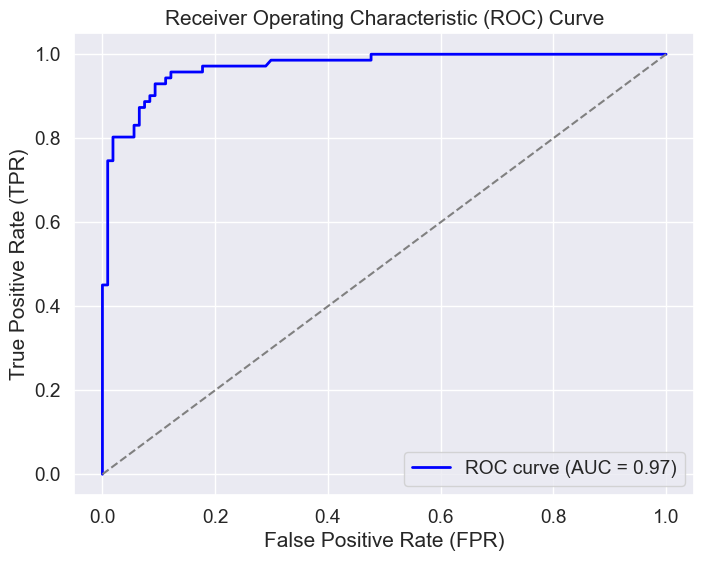

AUC: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       107
           1       0.97      0.79      0.87        71

    accuracy                           0.90       178
   macro avg       0.92      0.89      0.90       178
weighted avg       0.91      0.90      0.90       178



In [173]:
# Make predictions using the trained RFC model
y_pred_proba = classifiers["Random Forest"].predict_proba(X_test)[:, 1]  # Predict probabilities for positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC value
print(f"AUC: {roc_auc:.2f}")

# Generate and print Classification Report
y_pred = classifiers["Random Forest"].predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)